# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [60]:
# Importing initial libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
# Importing the dataset and then converting it into a dataframe
recipe_site_traffic = pd.read_csv("recipe_site_traffic_2212.csv")

# Checking the first 10 rows
recipe_site_traffic.head()

recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN

# **Step 1: Data Validation**

For the data validation step, we need to specifically check for each column to see if they are consistent (e.g., missing values, null values, miscategorization, wrong labels).

In [62]:
# We will check first for the duplicates

recipe_site_traffic.duplicated(subset='recipe').sum()

0

In [63]:
# Since we don't have duplicates, no row removal is necessary

# Let us now examine specific columns for consistency

recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [64]:
# Let us examine the servings column

recipe_site_traffic['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [65]:
# Since "as a snack" is a string, we need to replace it with the correct data type
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].str.replace(" as a snack", "")

# Converting data type to integer
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].astype('int')

# Checking the servings column to confirm
recipe_site_traffic['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [66]:
# Next, let us examine the high_traffic column

recipe_site_traffic['high_traffic']

0      High
1      High
2       NaN
3      High
4       NaN
       ... 
942     NaN
943    High
944    High
945    High
946     NaN
Name: high_traffic, Length: 947, dtype: object

In [67]:
# For a more appropriate label, we can replace "High" with True and the null values as "False"

recipe_site_traffic['high_traffic'] = np.where(recipe_site_traffic['high_traffic'] == "High", True, False)

# Checking the high_traffic column to confirm
recipe_site_traffic['high_traffic']

0       True
1       True
2      False
3       True
4      False
       ...  
942    False
943     True
944     True
945     True
946    False
Name: high_traffic, Length: 947, dtype: bool

In [68]:
# Next, let us examine the category column

recipe_site_traffic['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [69]:
# "Chicken Breast" should be categorized as "Chicken"
recipe_site_traffic['category'] = recipe_site_traffic['category'].str.replace(" Breast", "")

# Checking the values of the category column to confirm
recipe_site_traffic['category'].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

In [70]:
# Since the data type of the "category" column is an object, we should convert it to "category"

recipe_site_traffic['category'] = recipe_site_traffic['category'].astype('category')

In [71]:
# Next, let us examine the "carbohydrate" column

recipe_site_traffic['carbohydrate'].value_counts()

3.46     3
6.40     3
9.58     3
5.14     3
7.73     3
        ..
96.03    1
0.86     1
11.83    1
39.55    1
45.21    1
Name: carbohydrate, Length: 835, dtype: int64

In [72]:
# Next, let us examine the "calories" column

recipe_site_traffic['calories'].value_counts()

47.89     2
34.97     2
529.26    2
128.30    2
35.48     1
         ..
92.21     1
472.91    1
409.03    1
31.75     1
184.56    1
Name: calories, Length: 891, dtype: int64

In [73]:
# Next, let us examine the "sugar" column

recipe_site_traffic['sugar'].value_counts()

1.62    5
1.51    5
2.97    4
1.27    4
0.77    4
       ..
5.44    1
1.80    1
2.00    1
9.00    1
6.20    1
Name: sugar, Length: 666, dtype: int64

In [74]:
# Next, let us examine the "protein" column

recipe_site_traffic['protein'].value_counts()

0.36      6
0.93      4
0.02      4
0.04      4
0.38      4
         ..
22.89     1
169.78    1
14.14     1
15.08     1
8.07      1
Name: protein, Length: 772, dtype: int64

In [75]:
# All of our columns are now consistent, with appropriate data types, but we should still check:

recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 46.7 KB


In [76]:
# As seen from the dataframe summary, we do not have the same number of non-null counts, therefore we should check for missing values

recipe_site_traffic.isna().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [77]:
# Show all rows with missing values

recipe_site_traffic[recipe_site_traffic.isnull().any(axis=1)]

recipe  calories  carbohydrate  sugar  protein       category  servings  \
0         1       NaN           NaN    NaN      NaN           Pork         6   
23       24       NaN           NaN    NaN      NaN           Meat         2   
48       49       NaN           NaN    NaN      NaN        Chicken         4   
82       83       NaN           NaN    NaN      NaN           Meat         4   
89       90       NaN           NaN    NaN      NaN           Pork         6   
116     117       NaN           NaN    NaN      NaN        Chicken         6   
121     122       NaN           NaN    NaN      NaN        Dessert         2   
136     137       NaN           NaN    NaN      NaN  One Dish Meal         2   
149     150       NaN           NaN    NaN      NaN         Potato         2   
187     188       NaN           NaN    NaN      NaN           Pork         4   
209     210       NaN           NaN    NaN      NaN        Dessert         2   
212     213       NaN           NaN    NaN      NaN        Dessert         4   
221     222       NaN           NaN    NaN      NaN        Dessert         1   
249     250       NaN           NaN    NaN      NaN        Chicken         6   
262     263       NaN           NaN    NaN      NaN        Chicken         4   
278     279       NaN           NaN    NaN      NaN   Lunch/Snacks         4   
280     281       NaN           NaN    NaN      NaN           Meat         1   
297     298       NaN           NaN    NaN      NaN   Lunch/Snacks         6   
326     327       NaN           NaN    NaN      NaN         Potato         4   
351     352       NaN           NaN    NaN      NaN         Potato         4   
354     355       NaN           NaN    NaN      NaN           Pork         4   
372     373       NaN           NaN    NaN      NaN      Vegetable         2   
376     377       NaN           NaN    NaN      NaN           Pork         6   
388     389       NaN           NaN    NaN      NaN   Lunch/Snacks         4   
405     406       NaN           NaN    NaN      NaN      Vegetable         4   
427     428       NaN           NaN    NaN      NaN      Vegetable         4   
455     456       NaN           NaN    NaN      NaN           Pork         6   
530     531       NaN           NaN    NaN      NaN      Vegetable         1   
534     535       NaN           NaN    NaN      NaN        Chicken         2   
538     539       NaN           NaN    NaN      NaN      Vegetable         4   
545     546       NaN           NaN    NaN      NaN        Chicken         6   
555     556       NaN           NaN    NaN      NaN           Meat         2   
573     574       NaN           NaN    NaN      NaN   Lunch/Snacks         4   
581     582       NaN           NaN    NaN      NaN        Chicken         1   
608     609       NaN           NaN    NaN      NaN        Chicken         4   
674     675       NaN           NaN    NaN      NaN           Pork         4   
683     684       NaN           NaN    NaN      NaN         Potato         1   
711     712       NaN           NaN    NaN      NaN   Lunch/Snacks         4   
712     713       NaN           NaN    NaN      NaN           Pork         6   
749     750       NaN           NaN    NaN      NaN        Dessert         4   
765     766       NaN           NaN    NaN      NaN           Pork         1   
772     773       NaN           NaN    NaN      NaN  One Dish Meal         4   
851     852       NaN           NaN    NaN      NaN   Lunch/Snacks         4   
859     860       NaN           NaN    NaN      NaN  One Dish Meal         4   
865     866       NaN           NaN    NaN      NaN   Lunch/Snacks         6   
890     891       NaN           NaN    NaN      NaN           Meat         4   
893     894       NaN           NaN    NaN      NaN  One Dish Meal         4   
896     897       NaN           NaN    NaN      NaN        Chicken         6   
911     912       NaN           NaN    NaN      NaN        Dessert         6   
918  

In [78]:
# Let us drop the missing values
recipe_site_traffic = recipe_site_traffic.dropna().reset_index(drop=True)

# ... and check to confirm
recipe_site_traffic.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

**END OF Step 1: Data Validation**
The data is now ready for exploratory data analysis.

# **Step 2: Exploratory Data Analysis**

In [79]:
# We can now check for the descriptive statistic for each columns

recipe_site_traffic.describe()

recipe     calories  carbohydrate       sugar     protein  \
count  895.000000   895.000000    895.000000  895.000000  895.000000   
mean   473.652514   435.939196     35.069676    9.046547   24.149296   
std    272.763283   453.020997     43.949032   14.679176   36.369739   
min      2.000000     0.140000      0.030000    0.010000    0.000000   
25%    237.500000   110.430000      8.375000    1.690000    3.195000   
50%    475.000000   288.550000     21.480000    4.550000   10.800000   
75%    708.500000   597.650000     44.965000    9.800000   30.200000   
max    947.000000  3633.160000    530.420000  148.750000  363.360000   

         servings  
count  895.000000  
mean     3.458101  
std      1.735979  
min      1.000000  
25%      2.000000  
50%      4.000000  
75%      4.000000  
max      6.000000

The descriptive stats show that there is notable standard deviation, especially for the nutritional component columns. Additionally, looking at the quantile values and the max values, outliers might be present which can contribute to the skewness in the distribution.

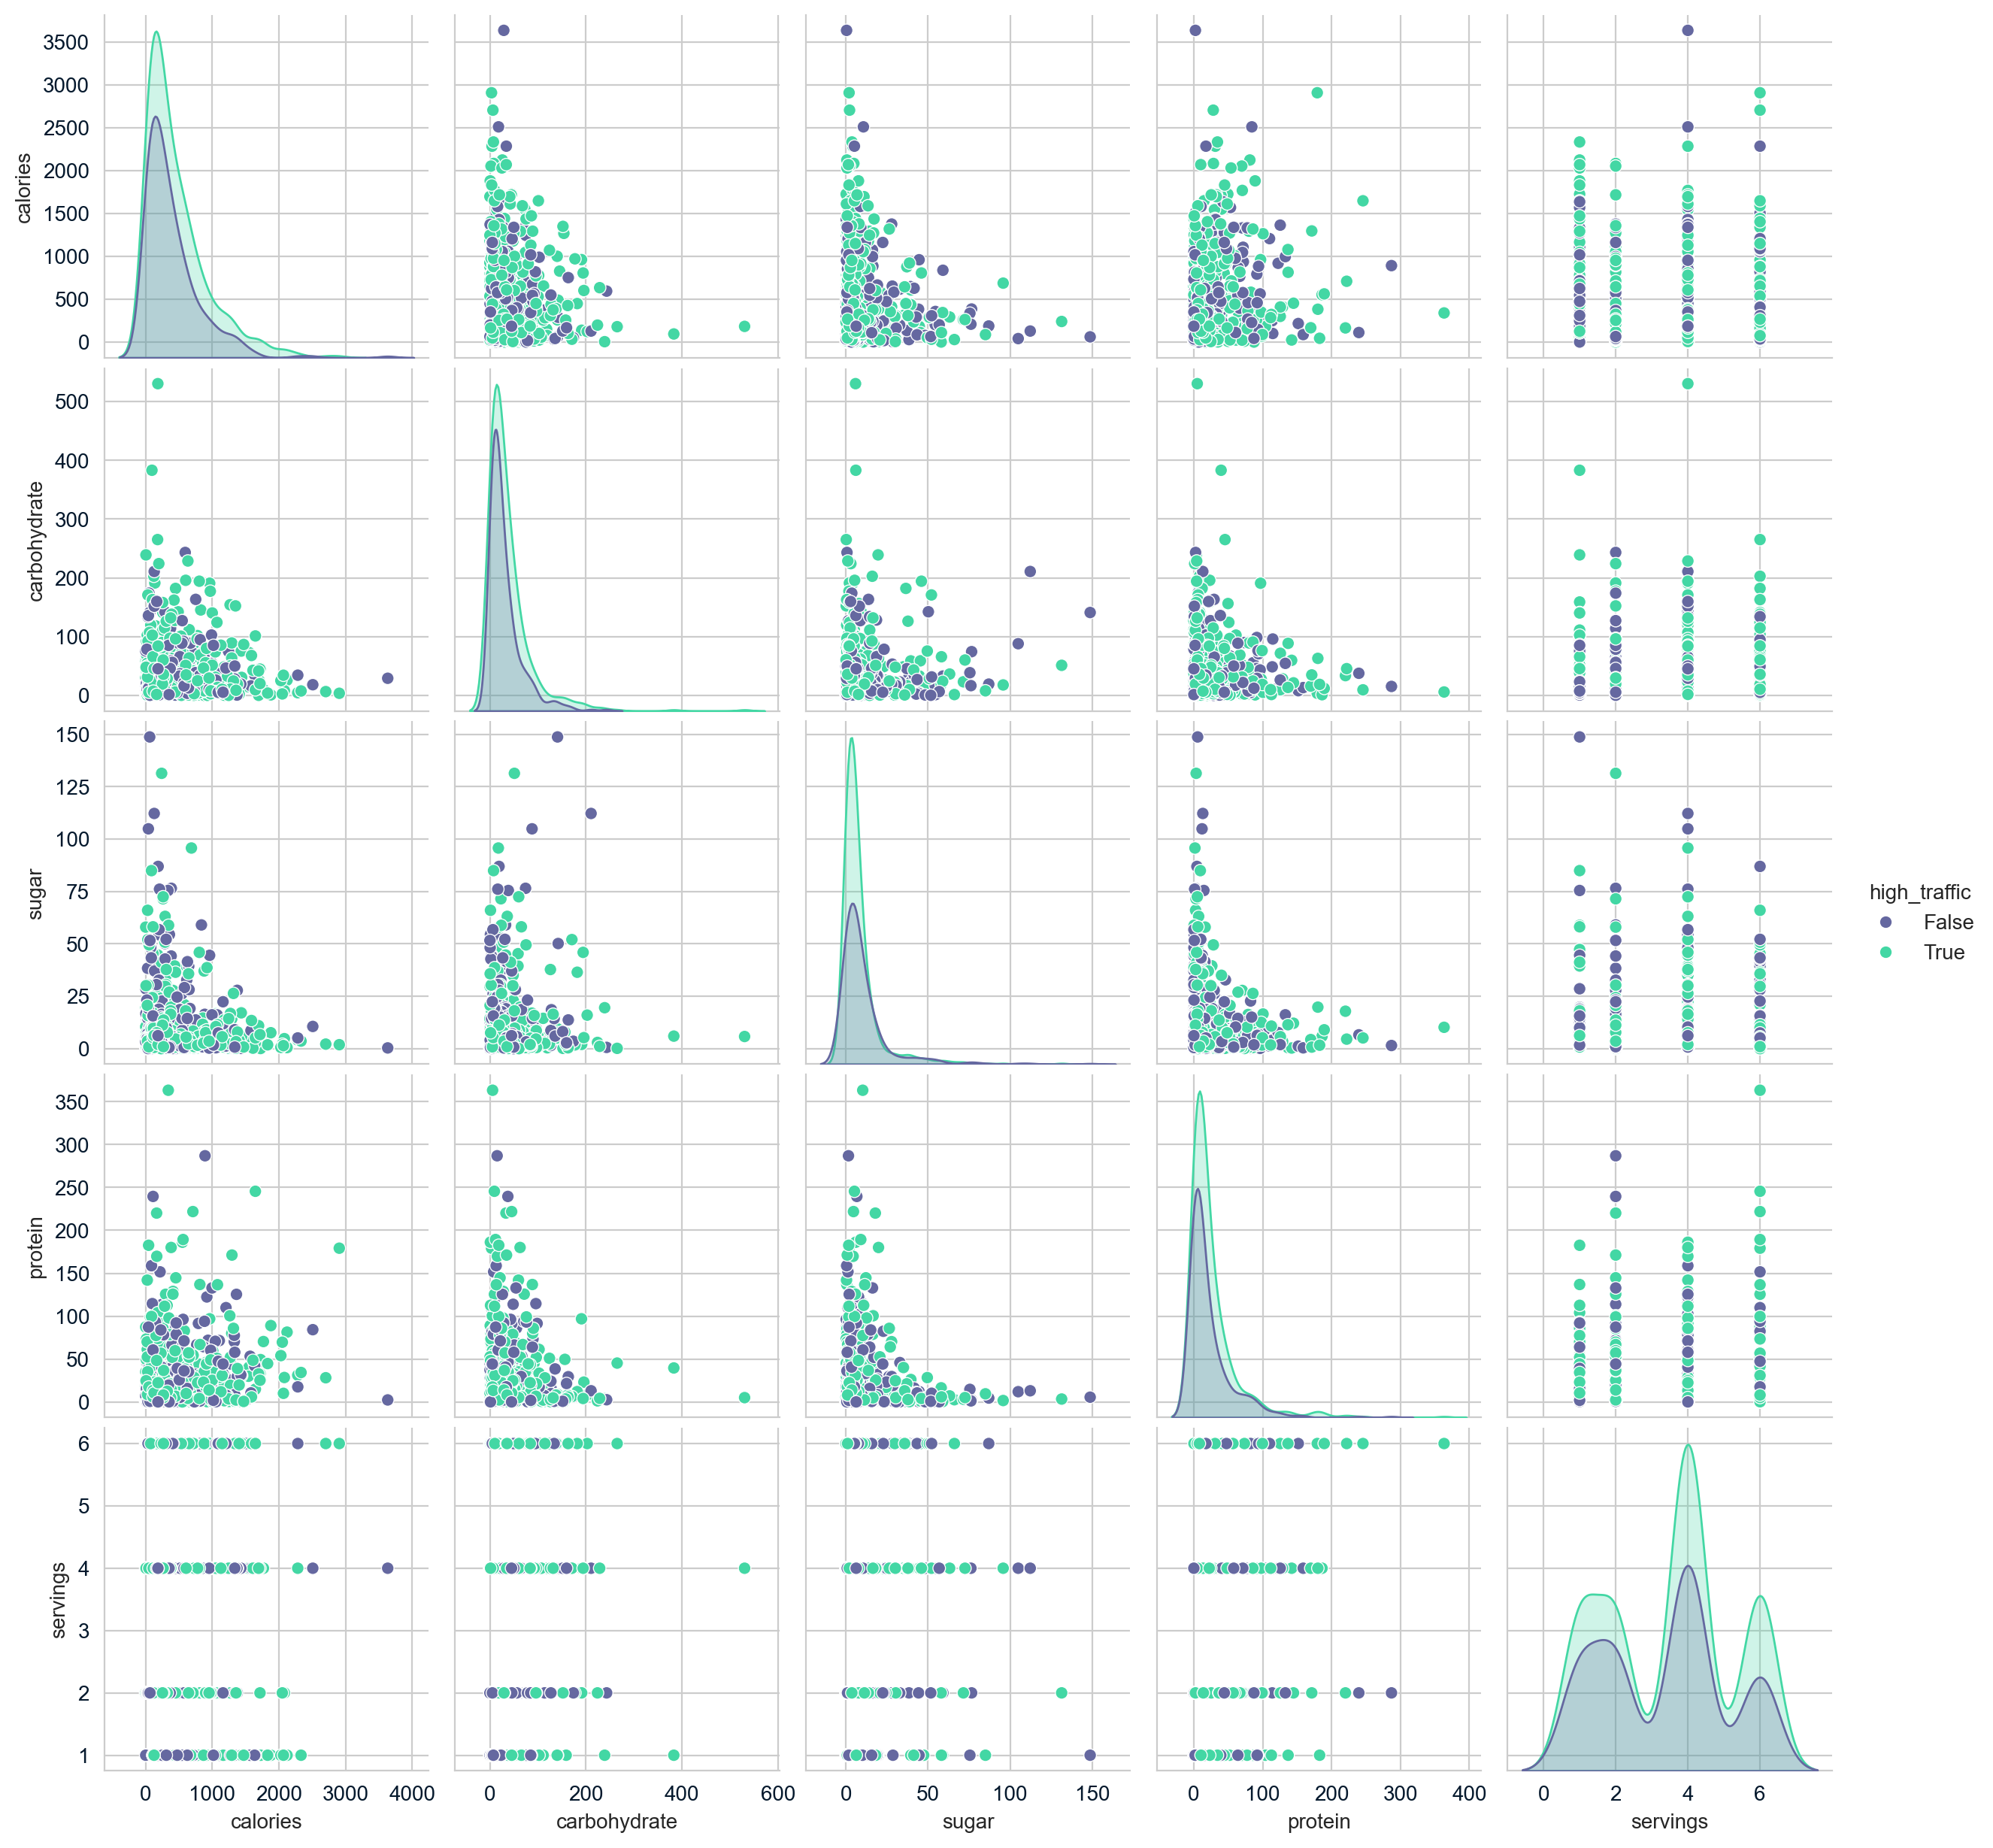

In [80]:
# We will now visualize the data to confirm that the distribution is non-normal.

analysis_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

sns.pairplot(recipe_site_traffic[analysis_columns], hue='high_traffic')
plt.show()

The pairplot reveals that there is no significant correlation between the nutrient columns. 

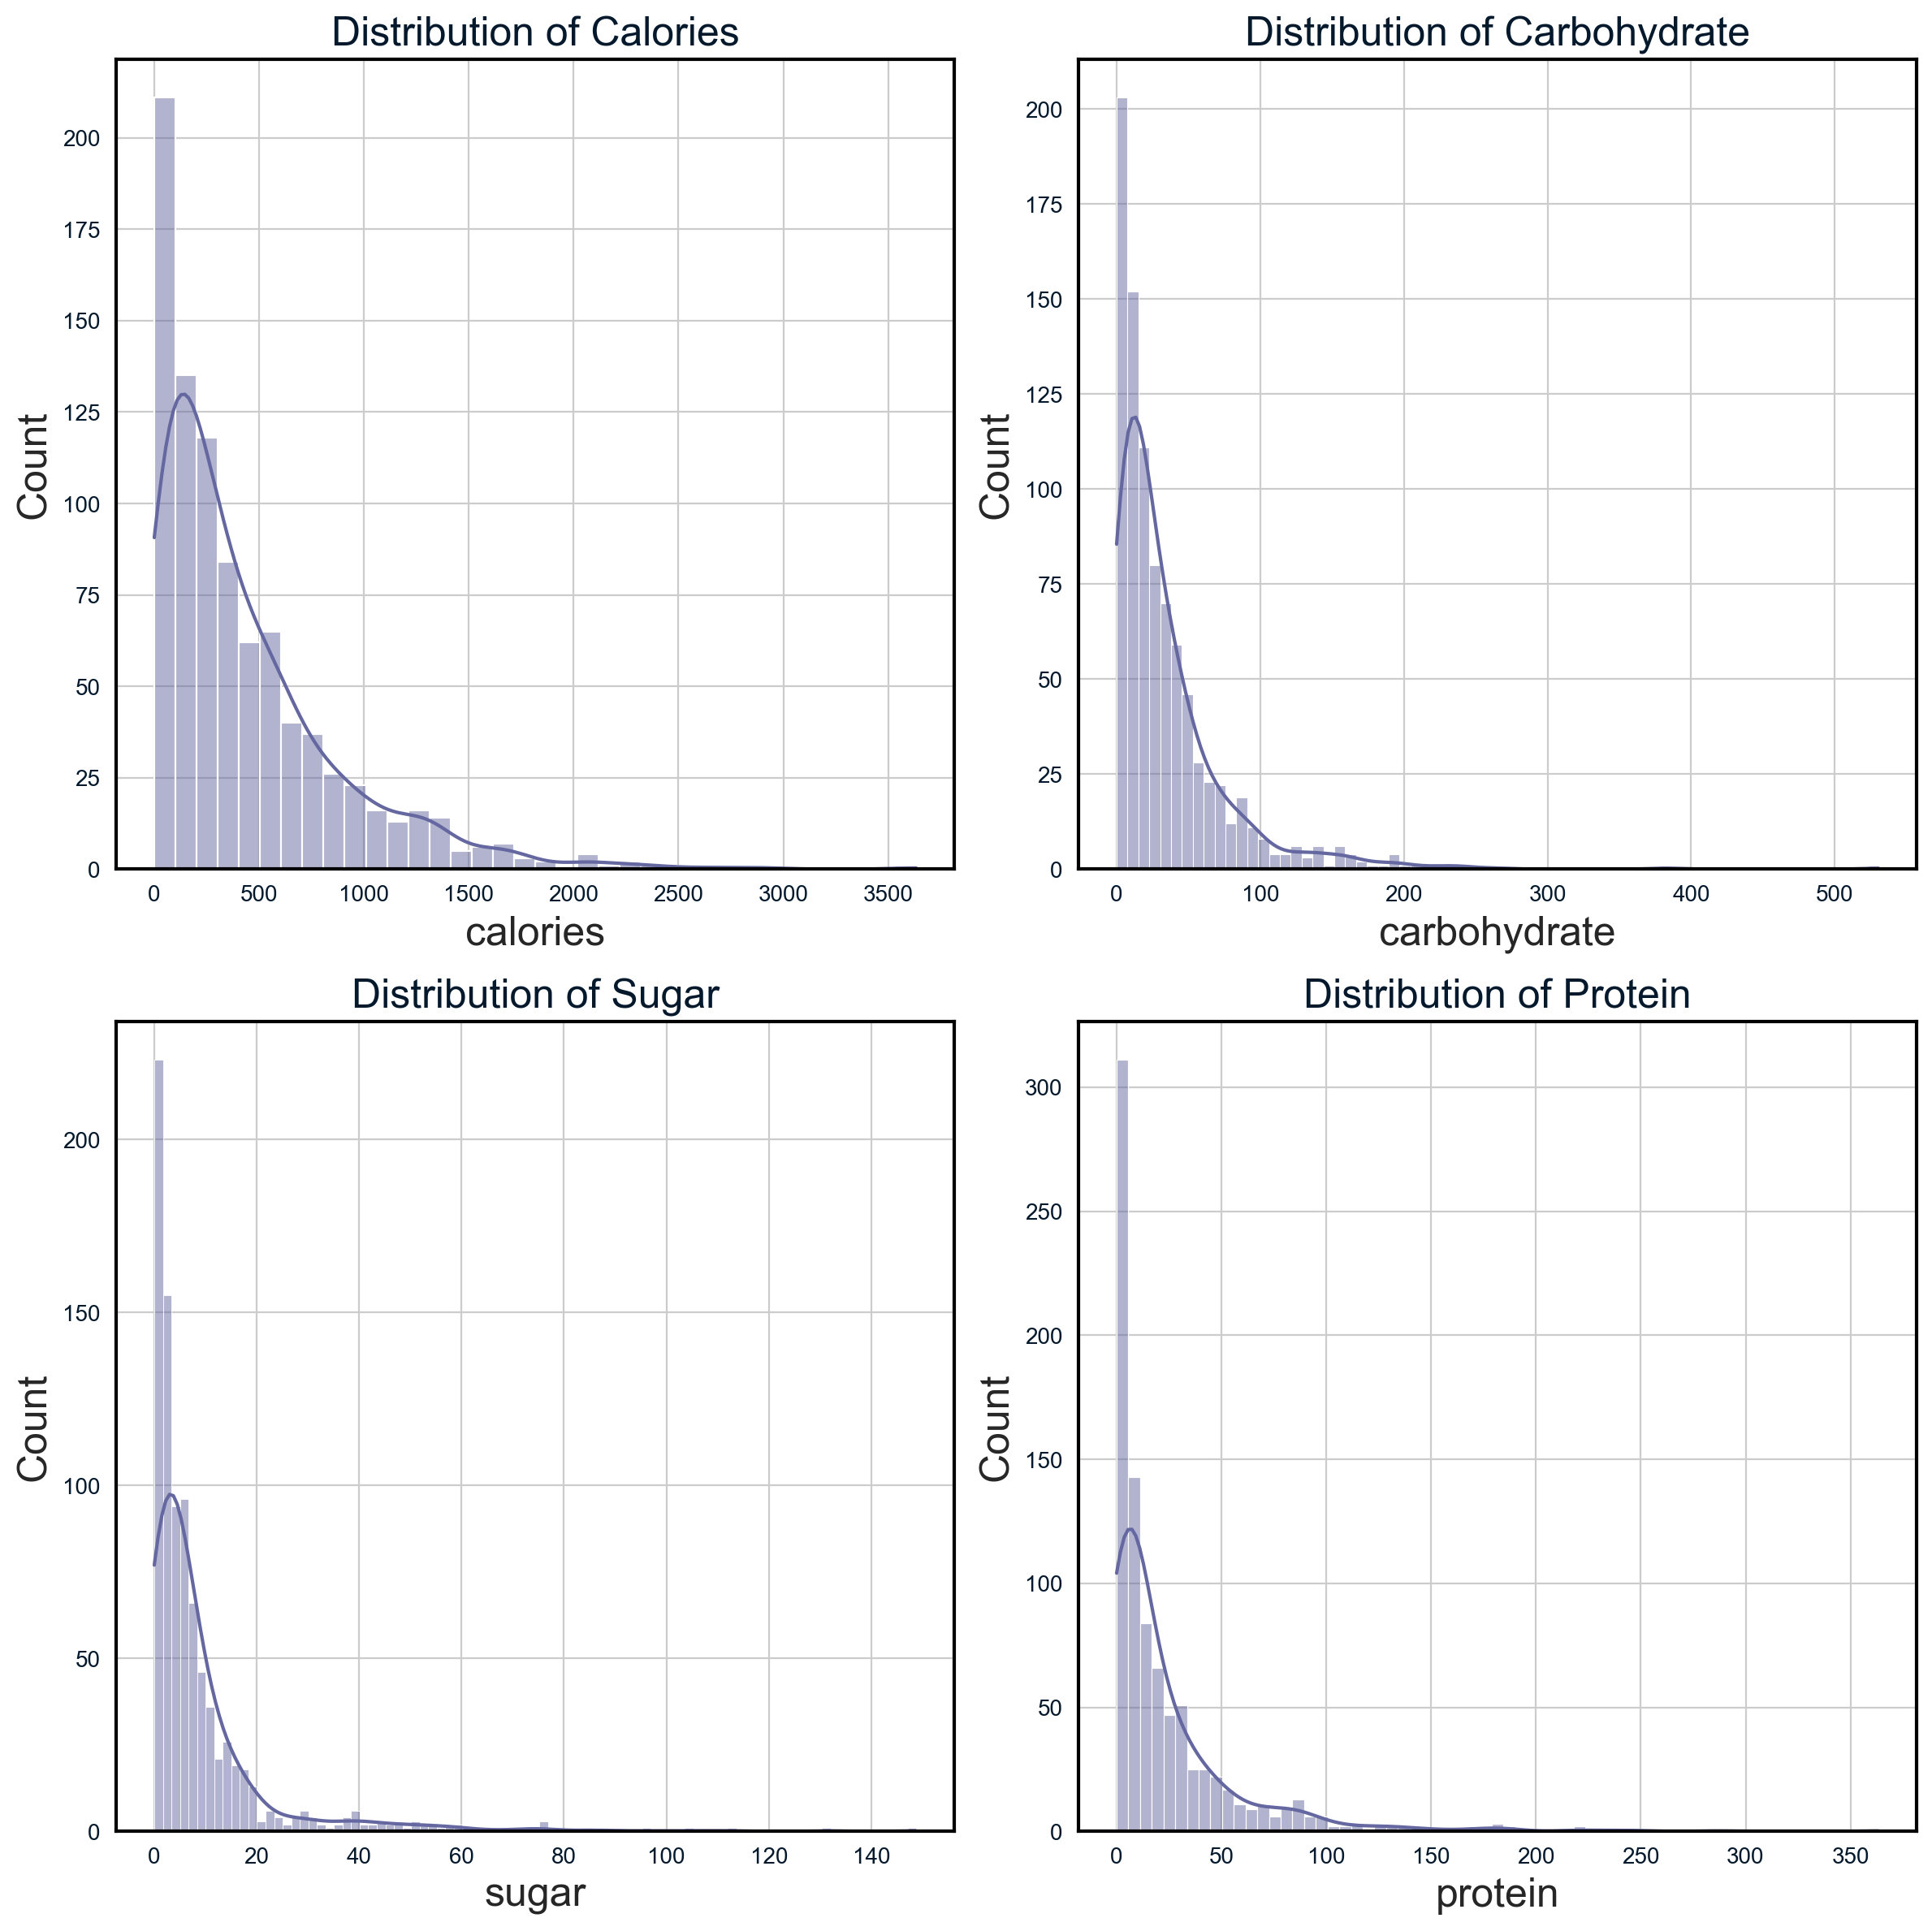

In [81]:
# We can also explore the distribution of these columns

# Applying the desired style
#plt.style.use(['science', notebook', 'grid', 'no-latex'])

# Set the Seaborn style to include a grid
sns.set_style("whitegrid")

# Specifying the numerical columns to plot
numerical_columns = recipe_site_traffic.select_dtypes(include='float').columns

# Define the number of rows and columns for the subplots
num_cols = 2
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate rows needed for 2 columns

# Creating subplots with 2 rows and 2 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flattening axes for easy indexing
axes = axes.flatten()

# Using map and zip to plot distributions without a for loop
list(map(lambda col, ax: sns.histplot(data=recipe_site_traffic, x=col, kde=True, ax=ax), numerical_columns, axes[:len(numerical_columns)]))
list(map(lambda ax, col: ax.set_title(f"Distribution of {col.capitalize()}"), axes[:len(numerical_columns)], numerical_columns))

# Enlarge the x and y labels, and title
for ax in axes[:len(numerical_columns)]:
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)
    ax.set_title(ax.get_title(), fontsize = 18)
    
# Thicken the borders of each plot
for ax in axes[:len(numerical_columns)]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set the border width to 2 points
        spine.set_edgecolor('black')  # Set the border color to black
        
# Hide any unused subplots
for ax in axes[len(numerical_columns):]:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

The Kernel Density Estimation (KDE) of the histogram reveals the underlying continuous probability distribution. It is evident that the nutritional component columns follow a gamma distribution (lower values are more frequent).

Therefore, our previous guess is correct, highlighting the presence of skewness, as the distribution are right-skewed.

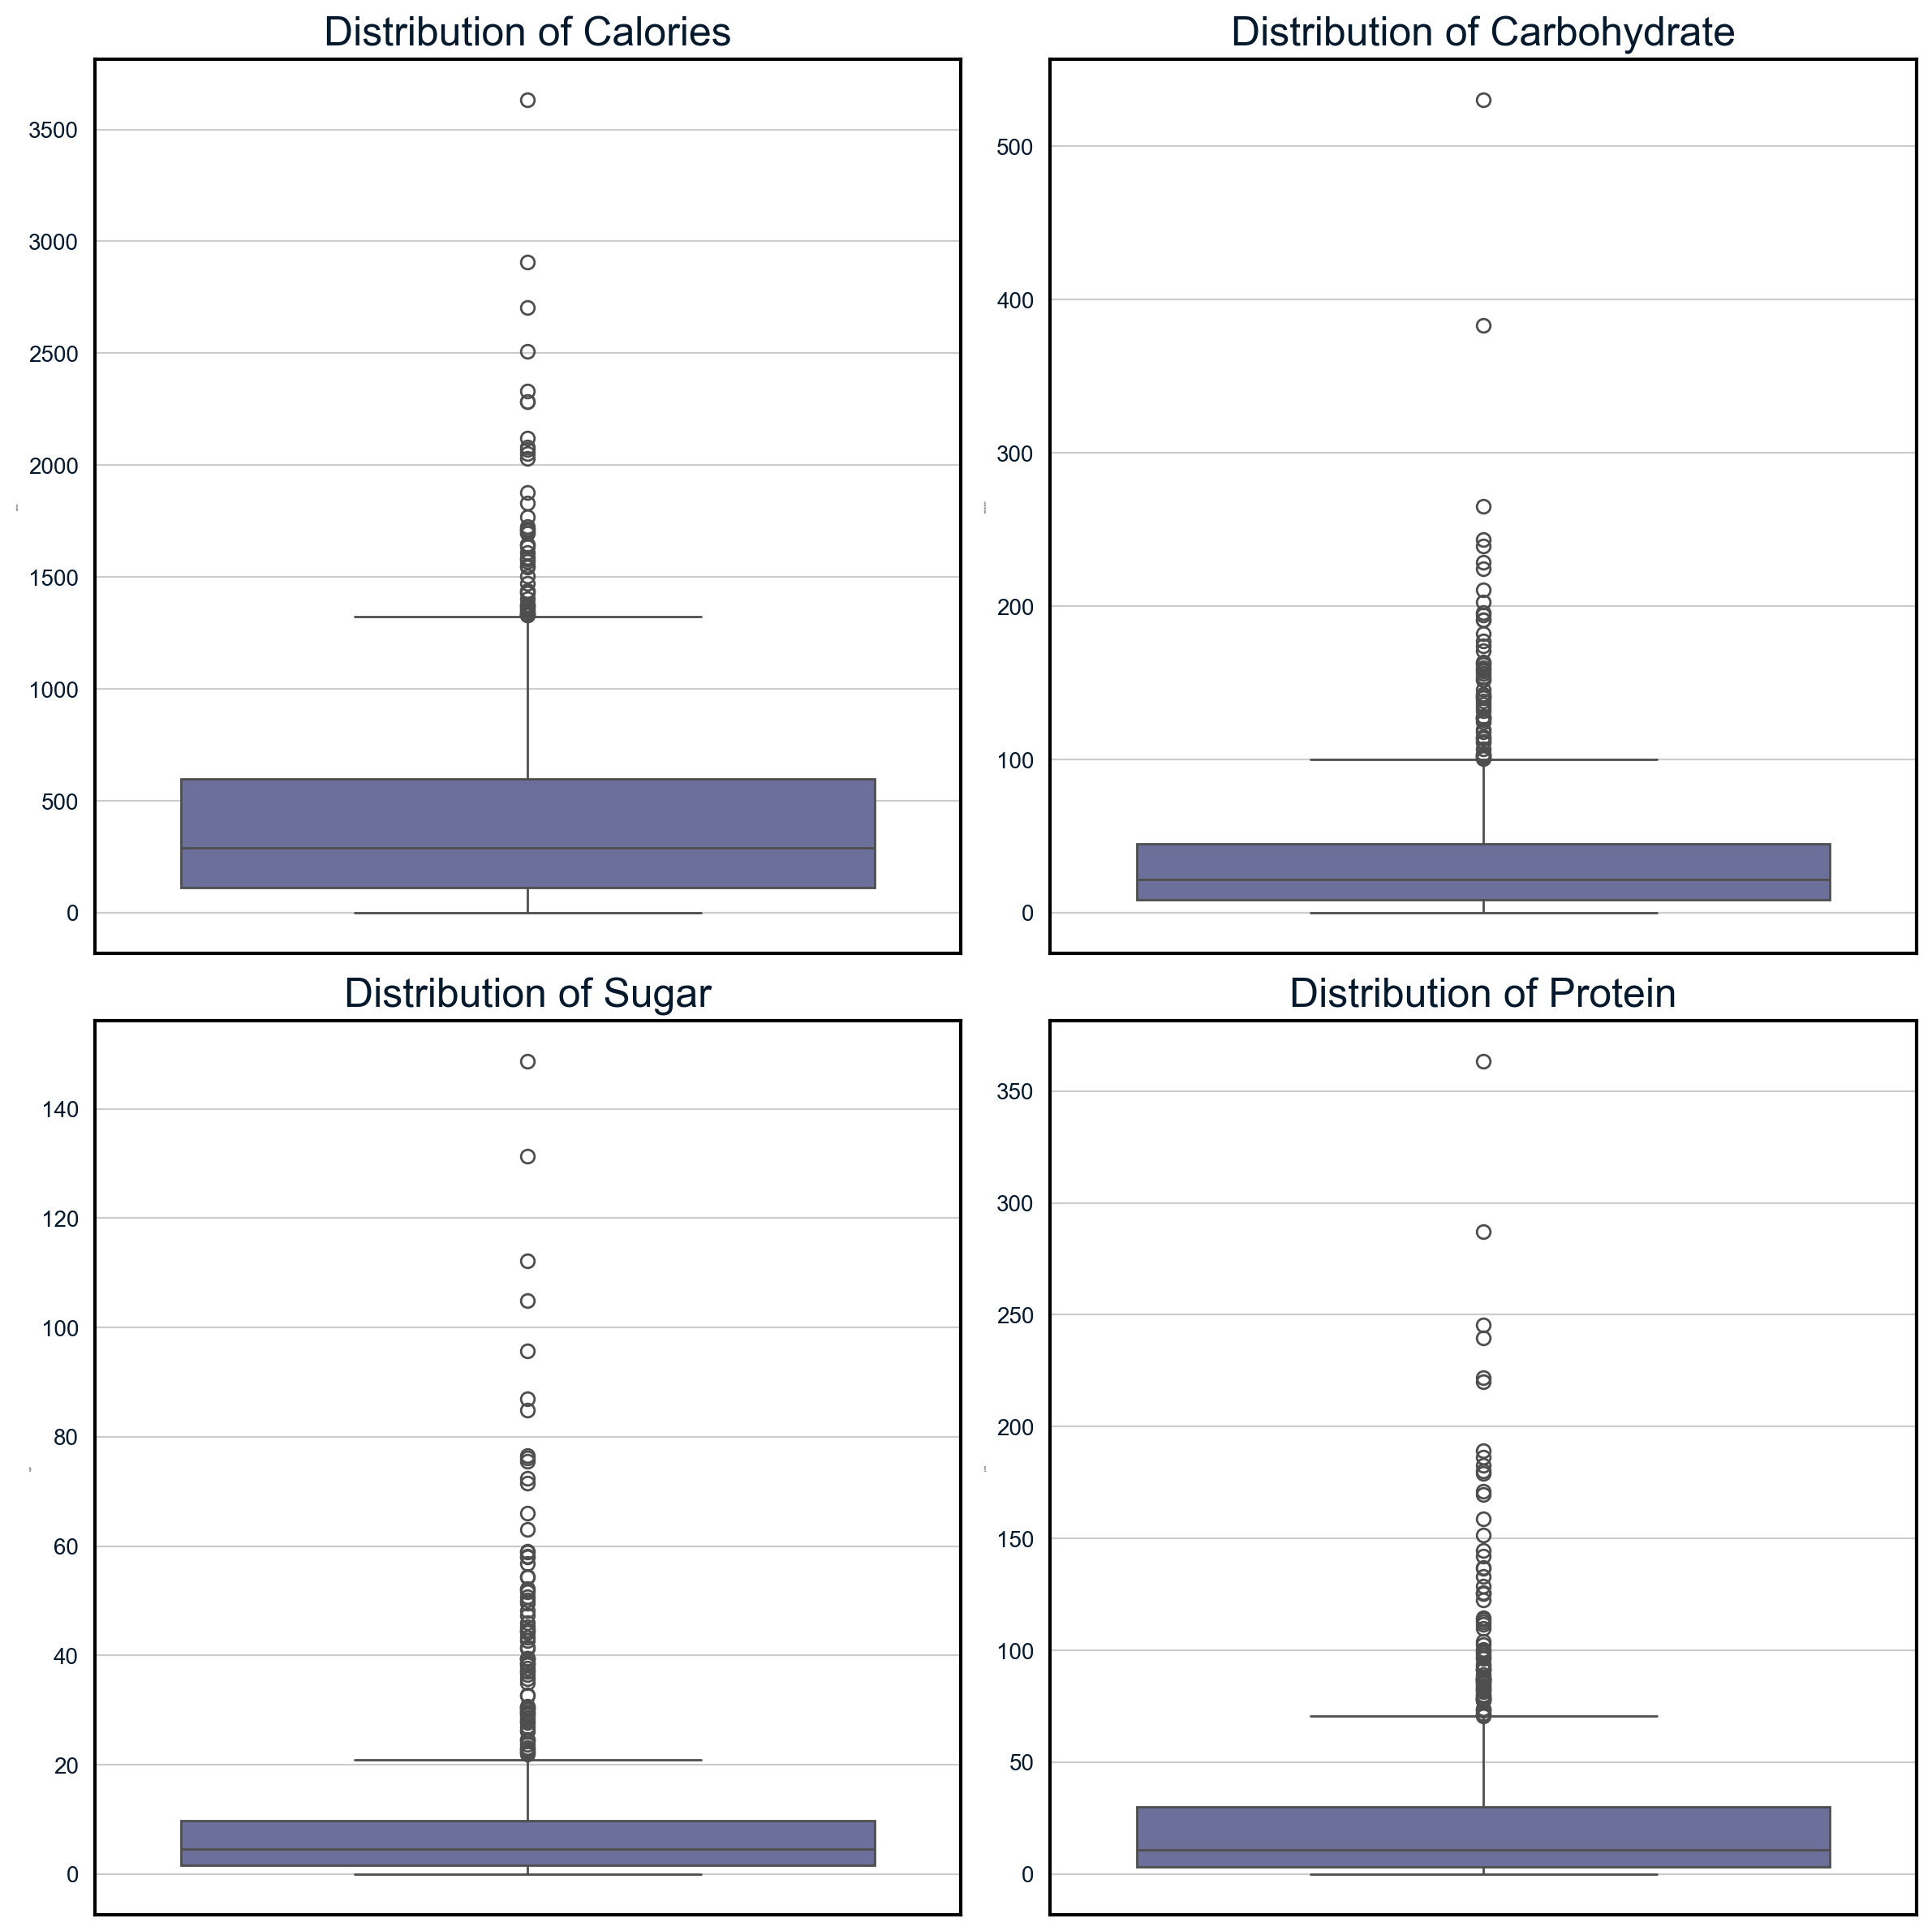

In [82]:
# To see the outliers, we can instead visualize using a boxplot

# Set the Seaborn style to include a grid
sns.set_style("whitegrid")

# Creating subplots with 2 rows and 2 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flattening axes for easy indexing
axes = axes.flatten()

# Using map and zip to plot distributions without a for loop
list(map(lambda col, ax: sns.boxplot(data=recipe_site_traffic, y=col, ax=ax), numerical_columns, axes[:len(numerical_columns)]))
list(map(lambda ax, col: ax.set_title(f"Distribution of {col.capitalize()}"), axes[:len(numerical_columns)], numerical_columns))

# Enlarge the x and y labels, and title
for ax in axes[:len(numerical_columns)]:
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=0)
    ax.set_title(ax.get_title(), fontsize = 18)
    
# Thicken the borders of each plot
for ax in axes[:len(numerical_columns)]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set the border width to 2 points
        spine.set_edgecolor('black')  # Set the border color to black
        
# Hide any unused subplots
for ax in axes[len(numerical_columns):]:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

The box plots confirm the existence of the outliers and the right-skewed nature of the nutrient columns.

Hence, we can instead explore the median values of the nutritional components. To delve into the data deeper, we will now group by category.

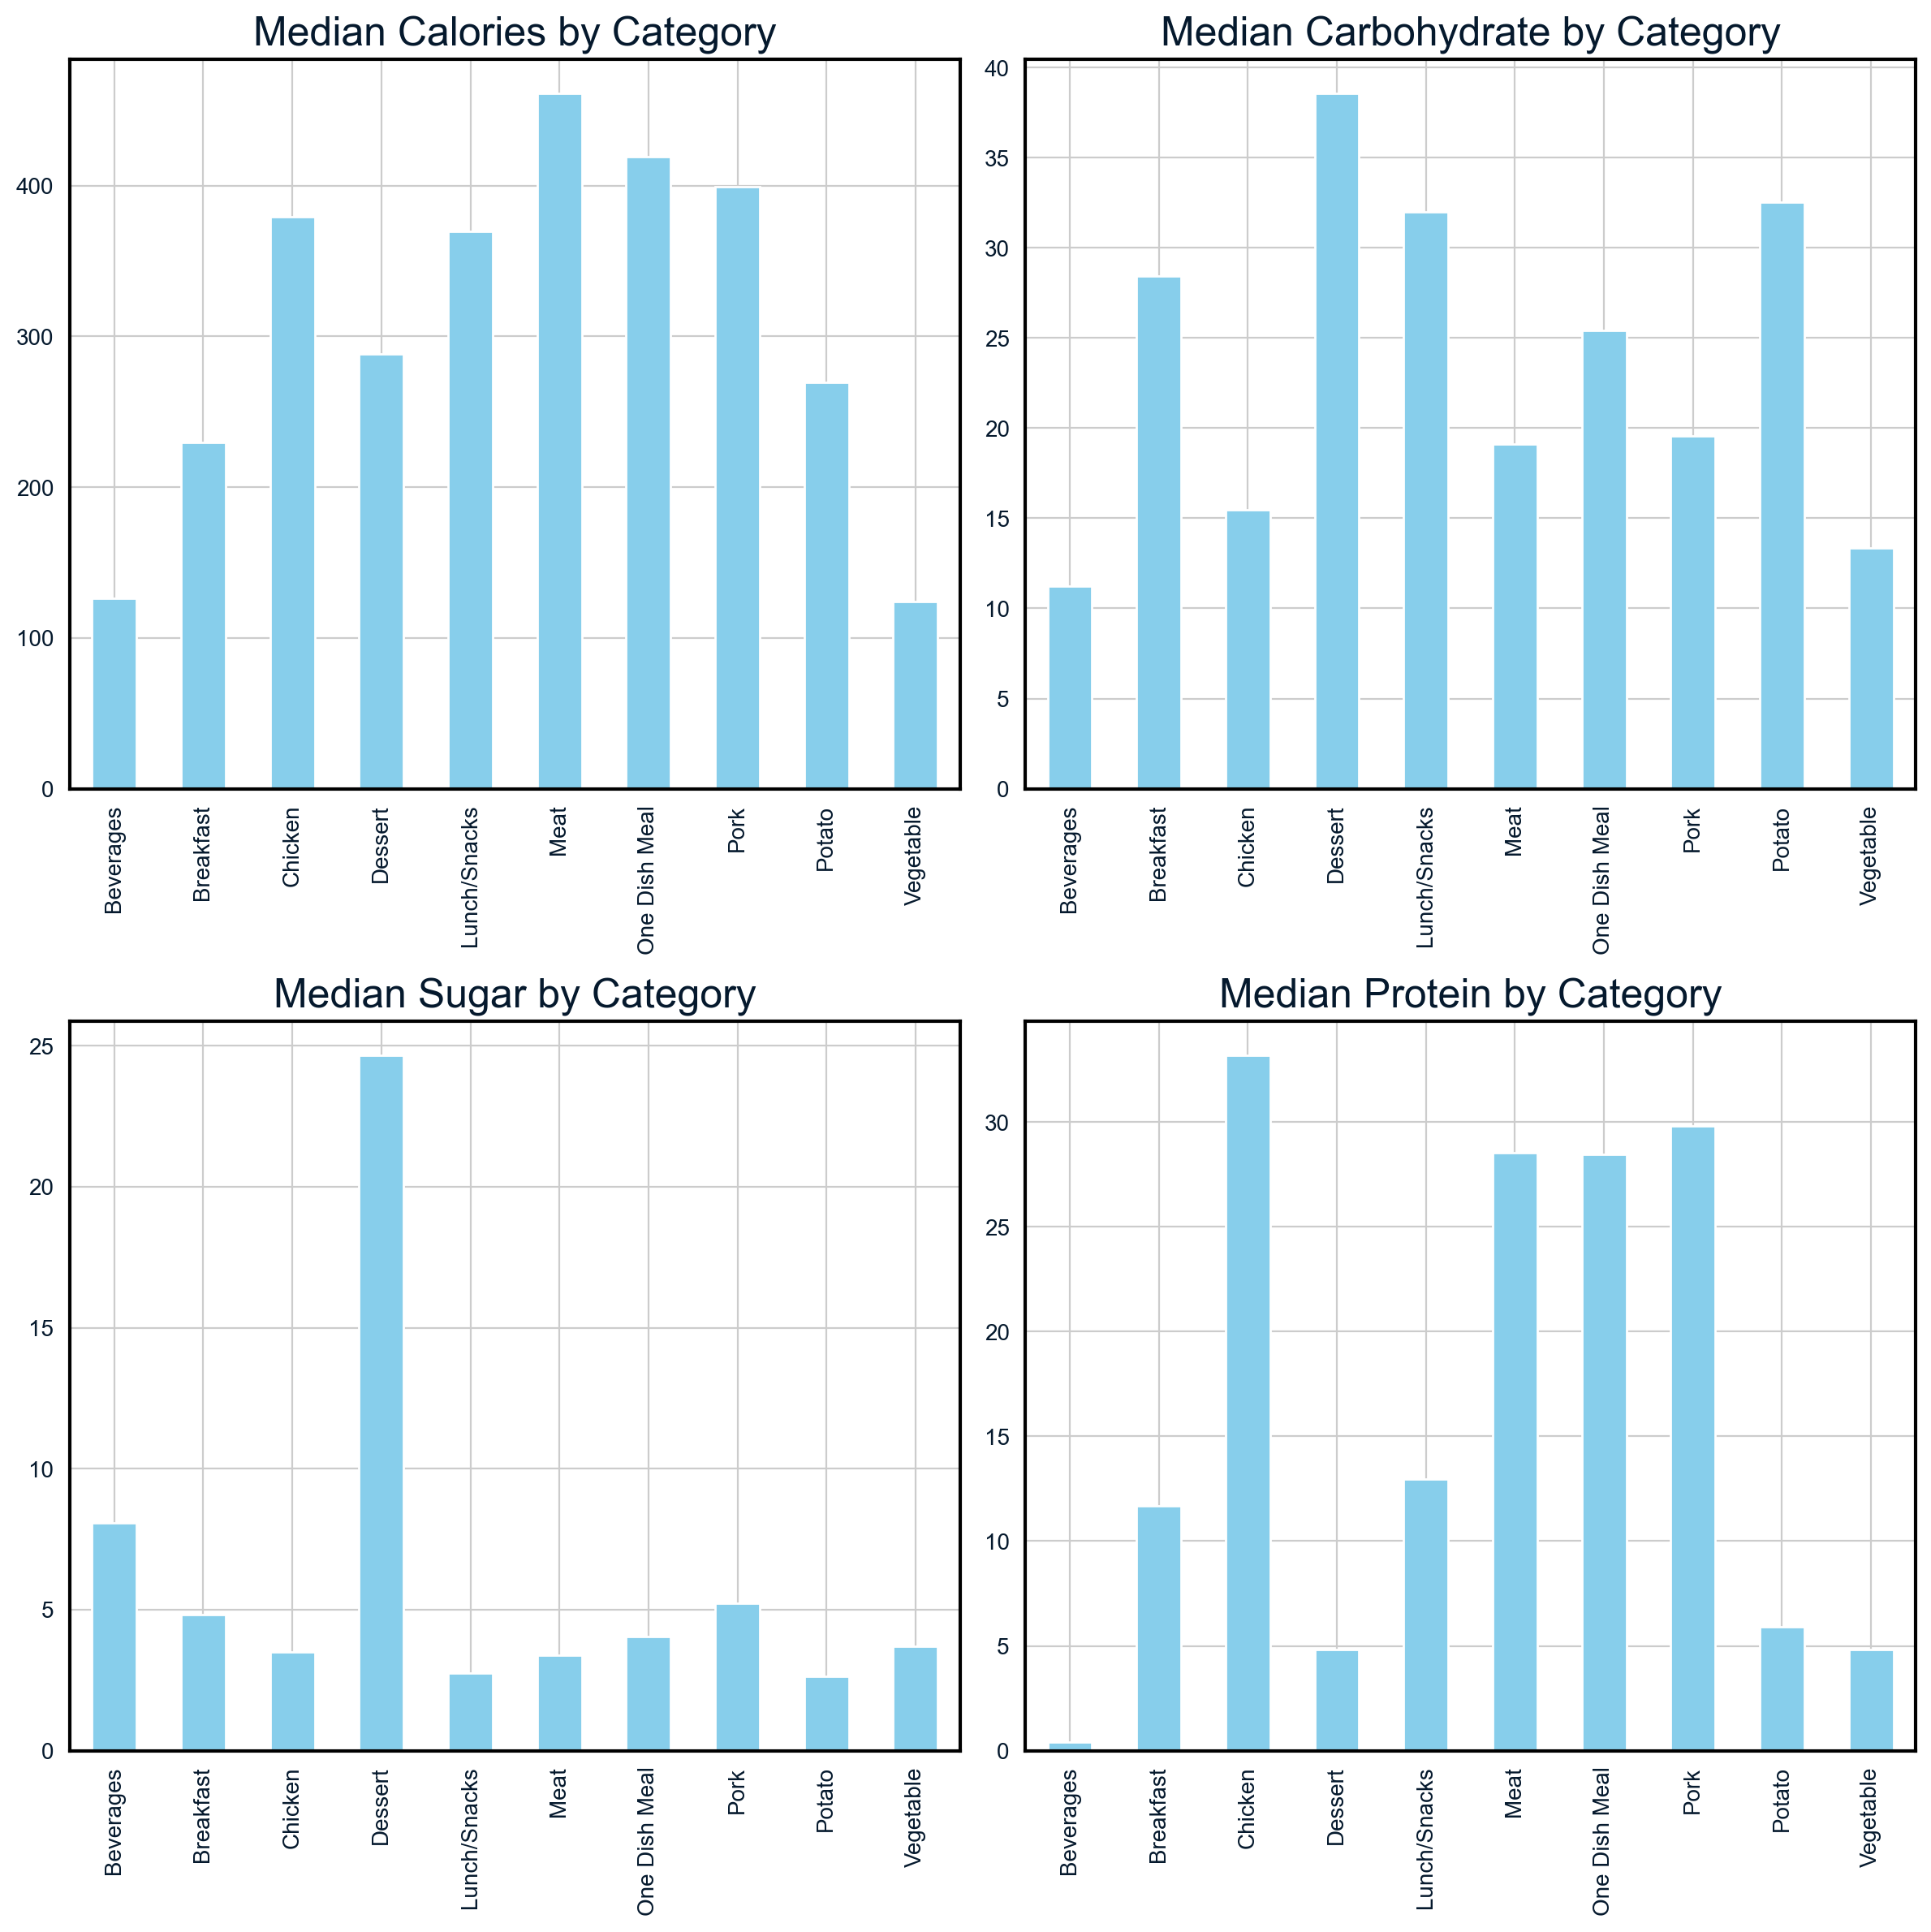

In [83]:
# Set the Seaborn style to include a grid
sns.set_style("whitegrid")

# Calculate the median for each numerical column grouped by category
category_median = recipe_site_traffic.groupby("category")[numerical_columns].median().reset_index()

# Define the number of columns and rows for subplots
num_cols = 2
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate rows needed for 2 columns

# Creating subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flattening axes for easy indexing
axes = axes.flatten()

# Using map to plot each bar plot
list(map(lambda col, ax: category_median.plot(x="category", y=col, kind="bar", ax=ax, color='skyblue', legend = False),
         numerical_columns, axes[:len(numerical_columns)]))

# Set titles and labels
list(map(lambda ax, col: ax.set_title(f"Median {col.capitalize()} by Category", fontsize=18),
         axes[:len(numerical_columns)], numerical_columns))

list(map(lambda ax: ax.set_xlabel("", fontsize=18), axes[:len(numerical_columns)]))
list(map(lambda ax: ax.set_ylabel(ax.get_ylabel(), fontsize=18), axes[:len(numerical_columns)]))

# Thicken the borders of each plot
for ax in axes[:len(numerical_columns)]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set the border width
        spine.set_edgecolor('black')  # Set the border color to black

# Hide any unused subplots
for ax in axes[len(numerical_columns):]:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

While we're at it, we can also visualize the mean and the standard deviation.

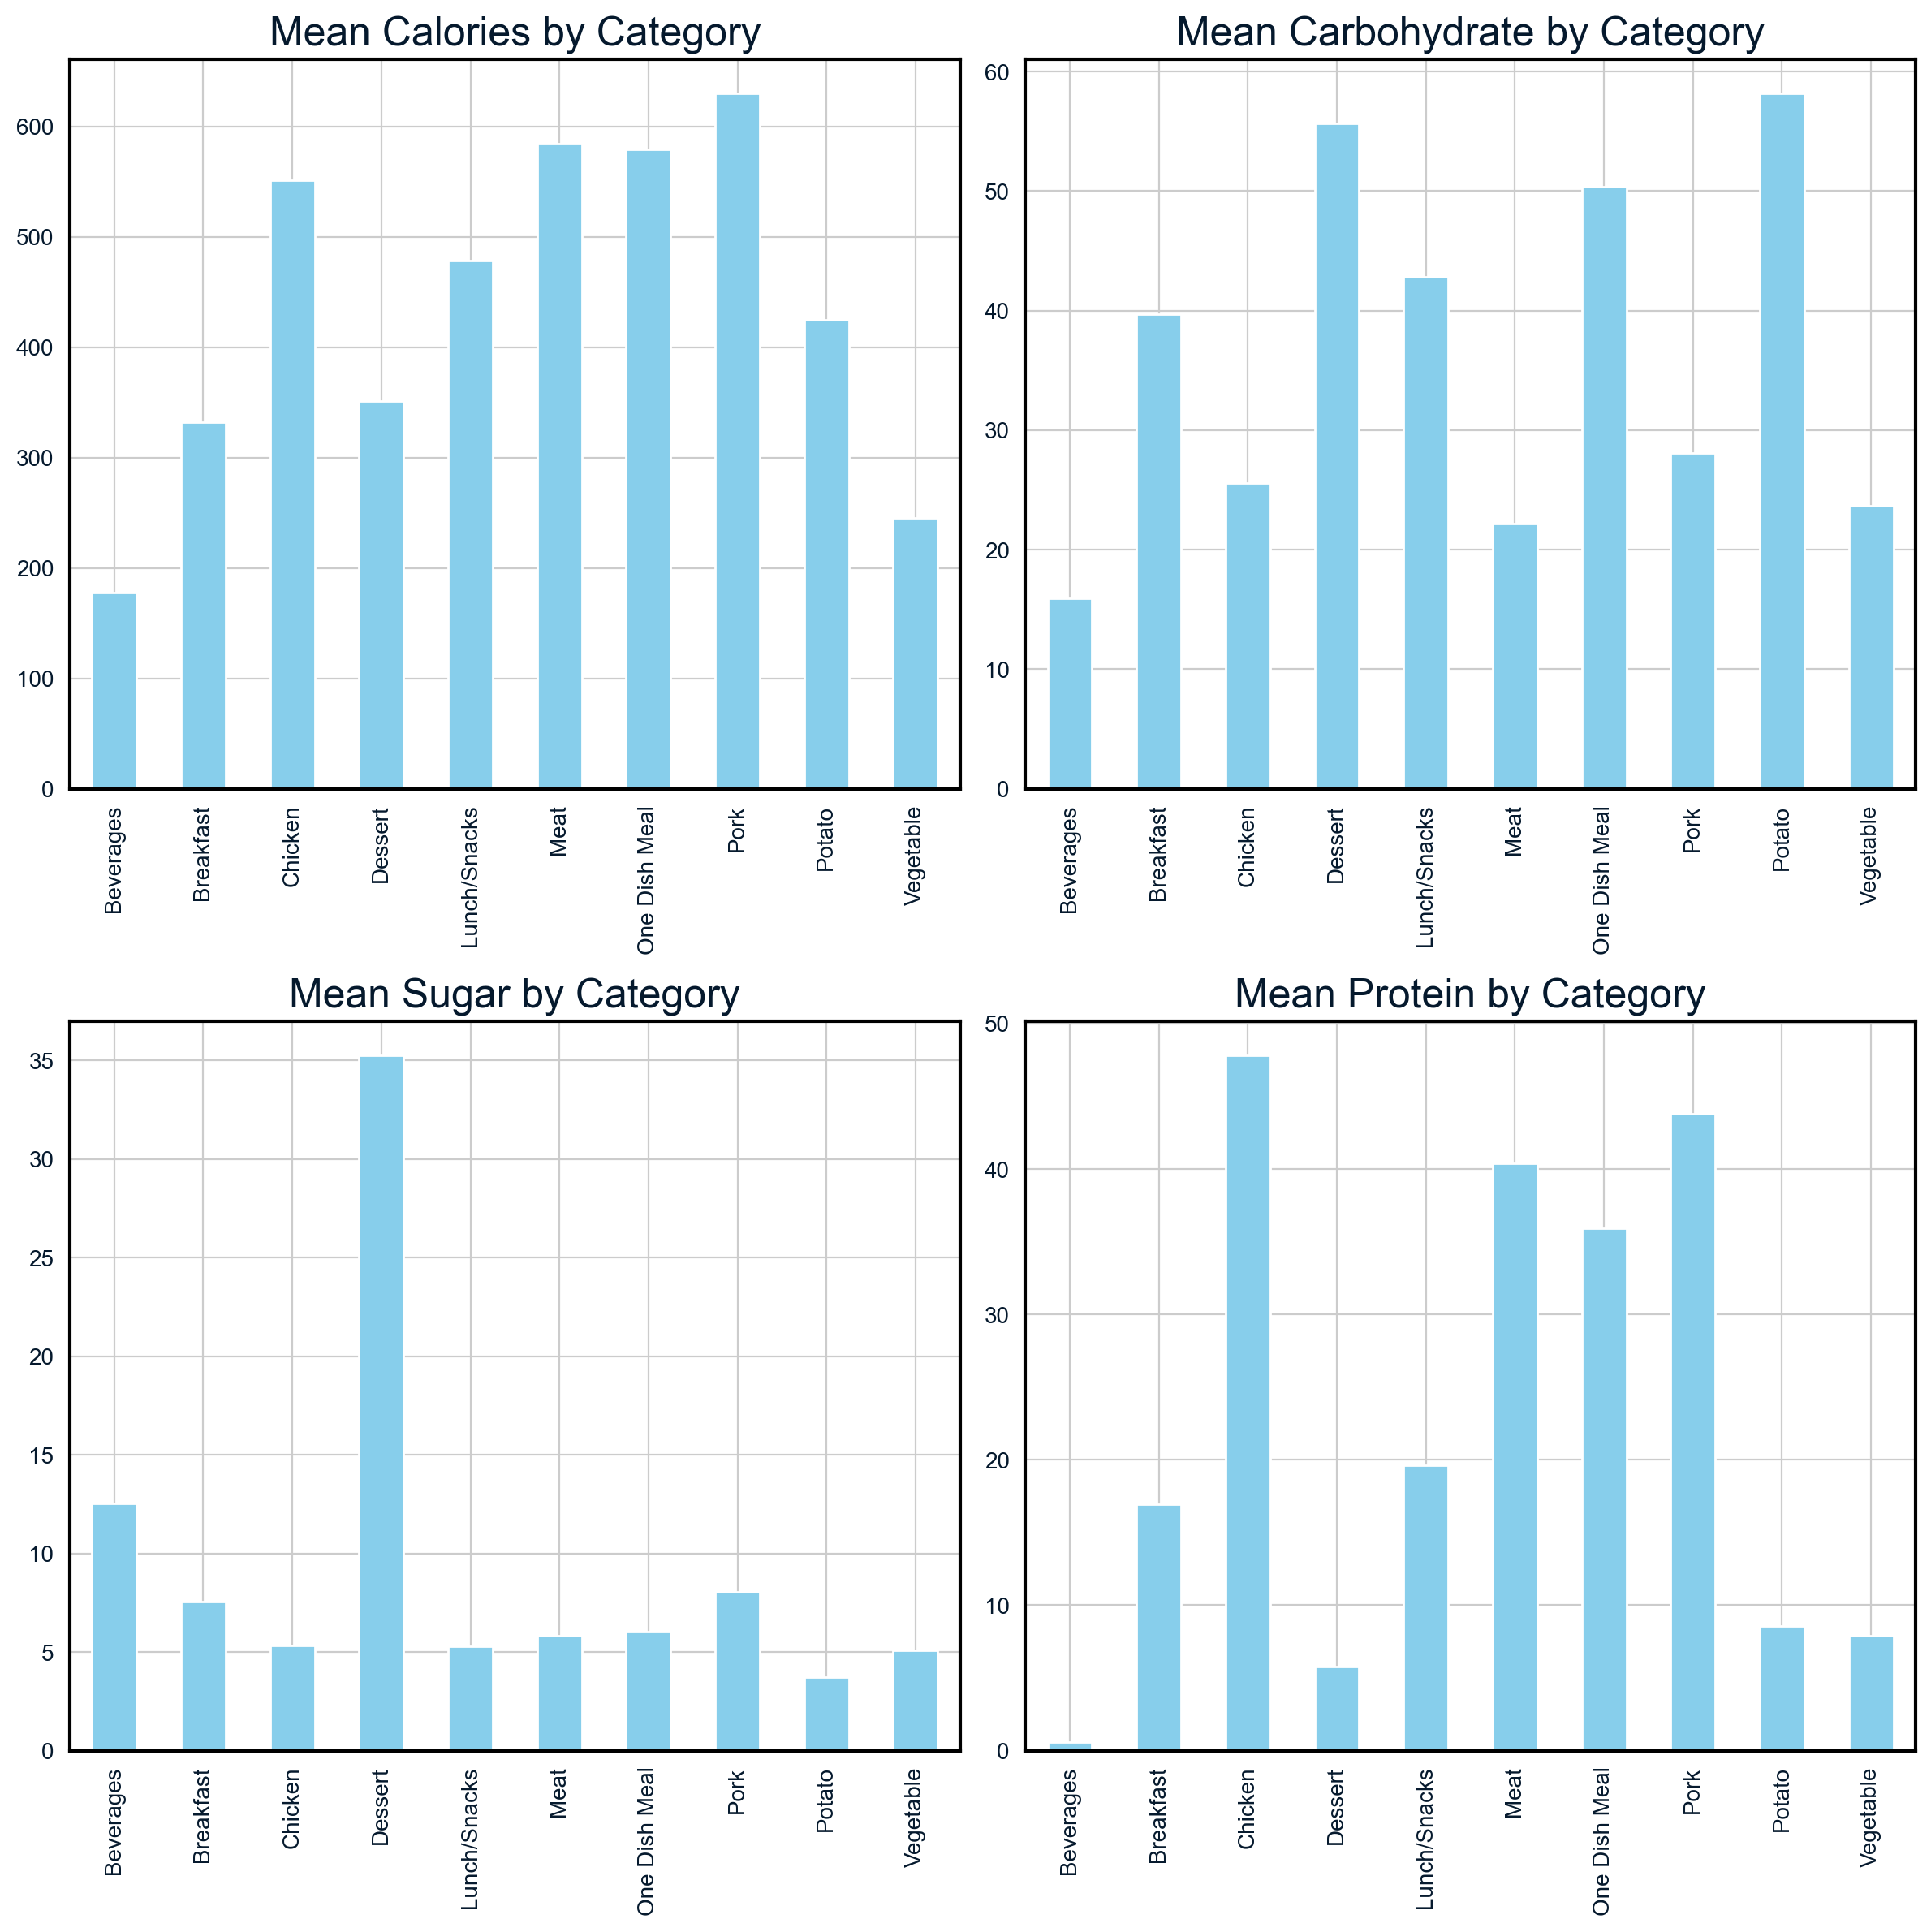

In [84]:
# Set the Seaborn style to include a grid
sns.set_style("whitegrid")

# Calculate the median for each numerical column grouped by category
category_mean = recipe_site_traffic.groupby("category")[numerical_columns].mean().reset_index()

# Define the number of columns and rows for subplots
num_cols = 2
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate rows needed for 2 columns

# Creating subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flattening axes for easy indexing
axes = axes.flatten()

# Using map to plot each bar plot
list(map(lambda col, ax: category_mean.plot(x="category", y=col, kind="bar", ax=ax, color='skyblue', legend = False),
         numerical_columns, axes[:len(numerical_columns)]))

# Set titles and labels
list(map(lambda ax, col: ax.set_title(f"Mean {col.capitalize()} by Category", fontsize=18),
         axes[:len(numerical_columns)], numerical_columns))

list(map(lambda ax: ax.set_xlabel("", fontsize=18), axes[:len(numerical_columns)]))
list(map(lambda ax: ax.set_ylabel(ax.get_ylabel(), fontsize=18), axes[:len(numerical_columns)]))

# Thicken the borders of each plot
for ax in axes[:len(numerical_columns)]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set the border width
        spine.set_edgecolor('black')  # Set the border color to black

# Hide any unused subplots
for ax in axes[len(numerical_columns):]:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

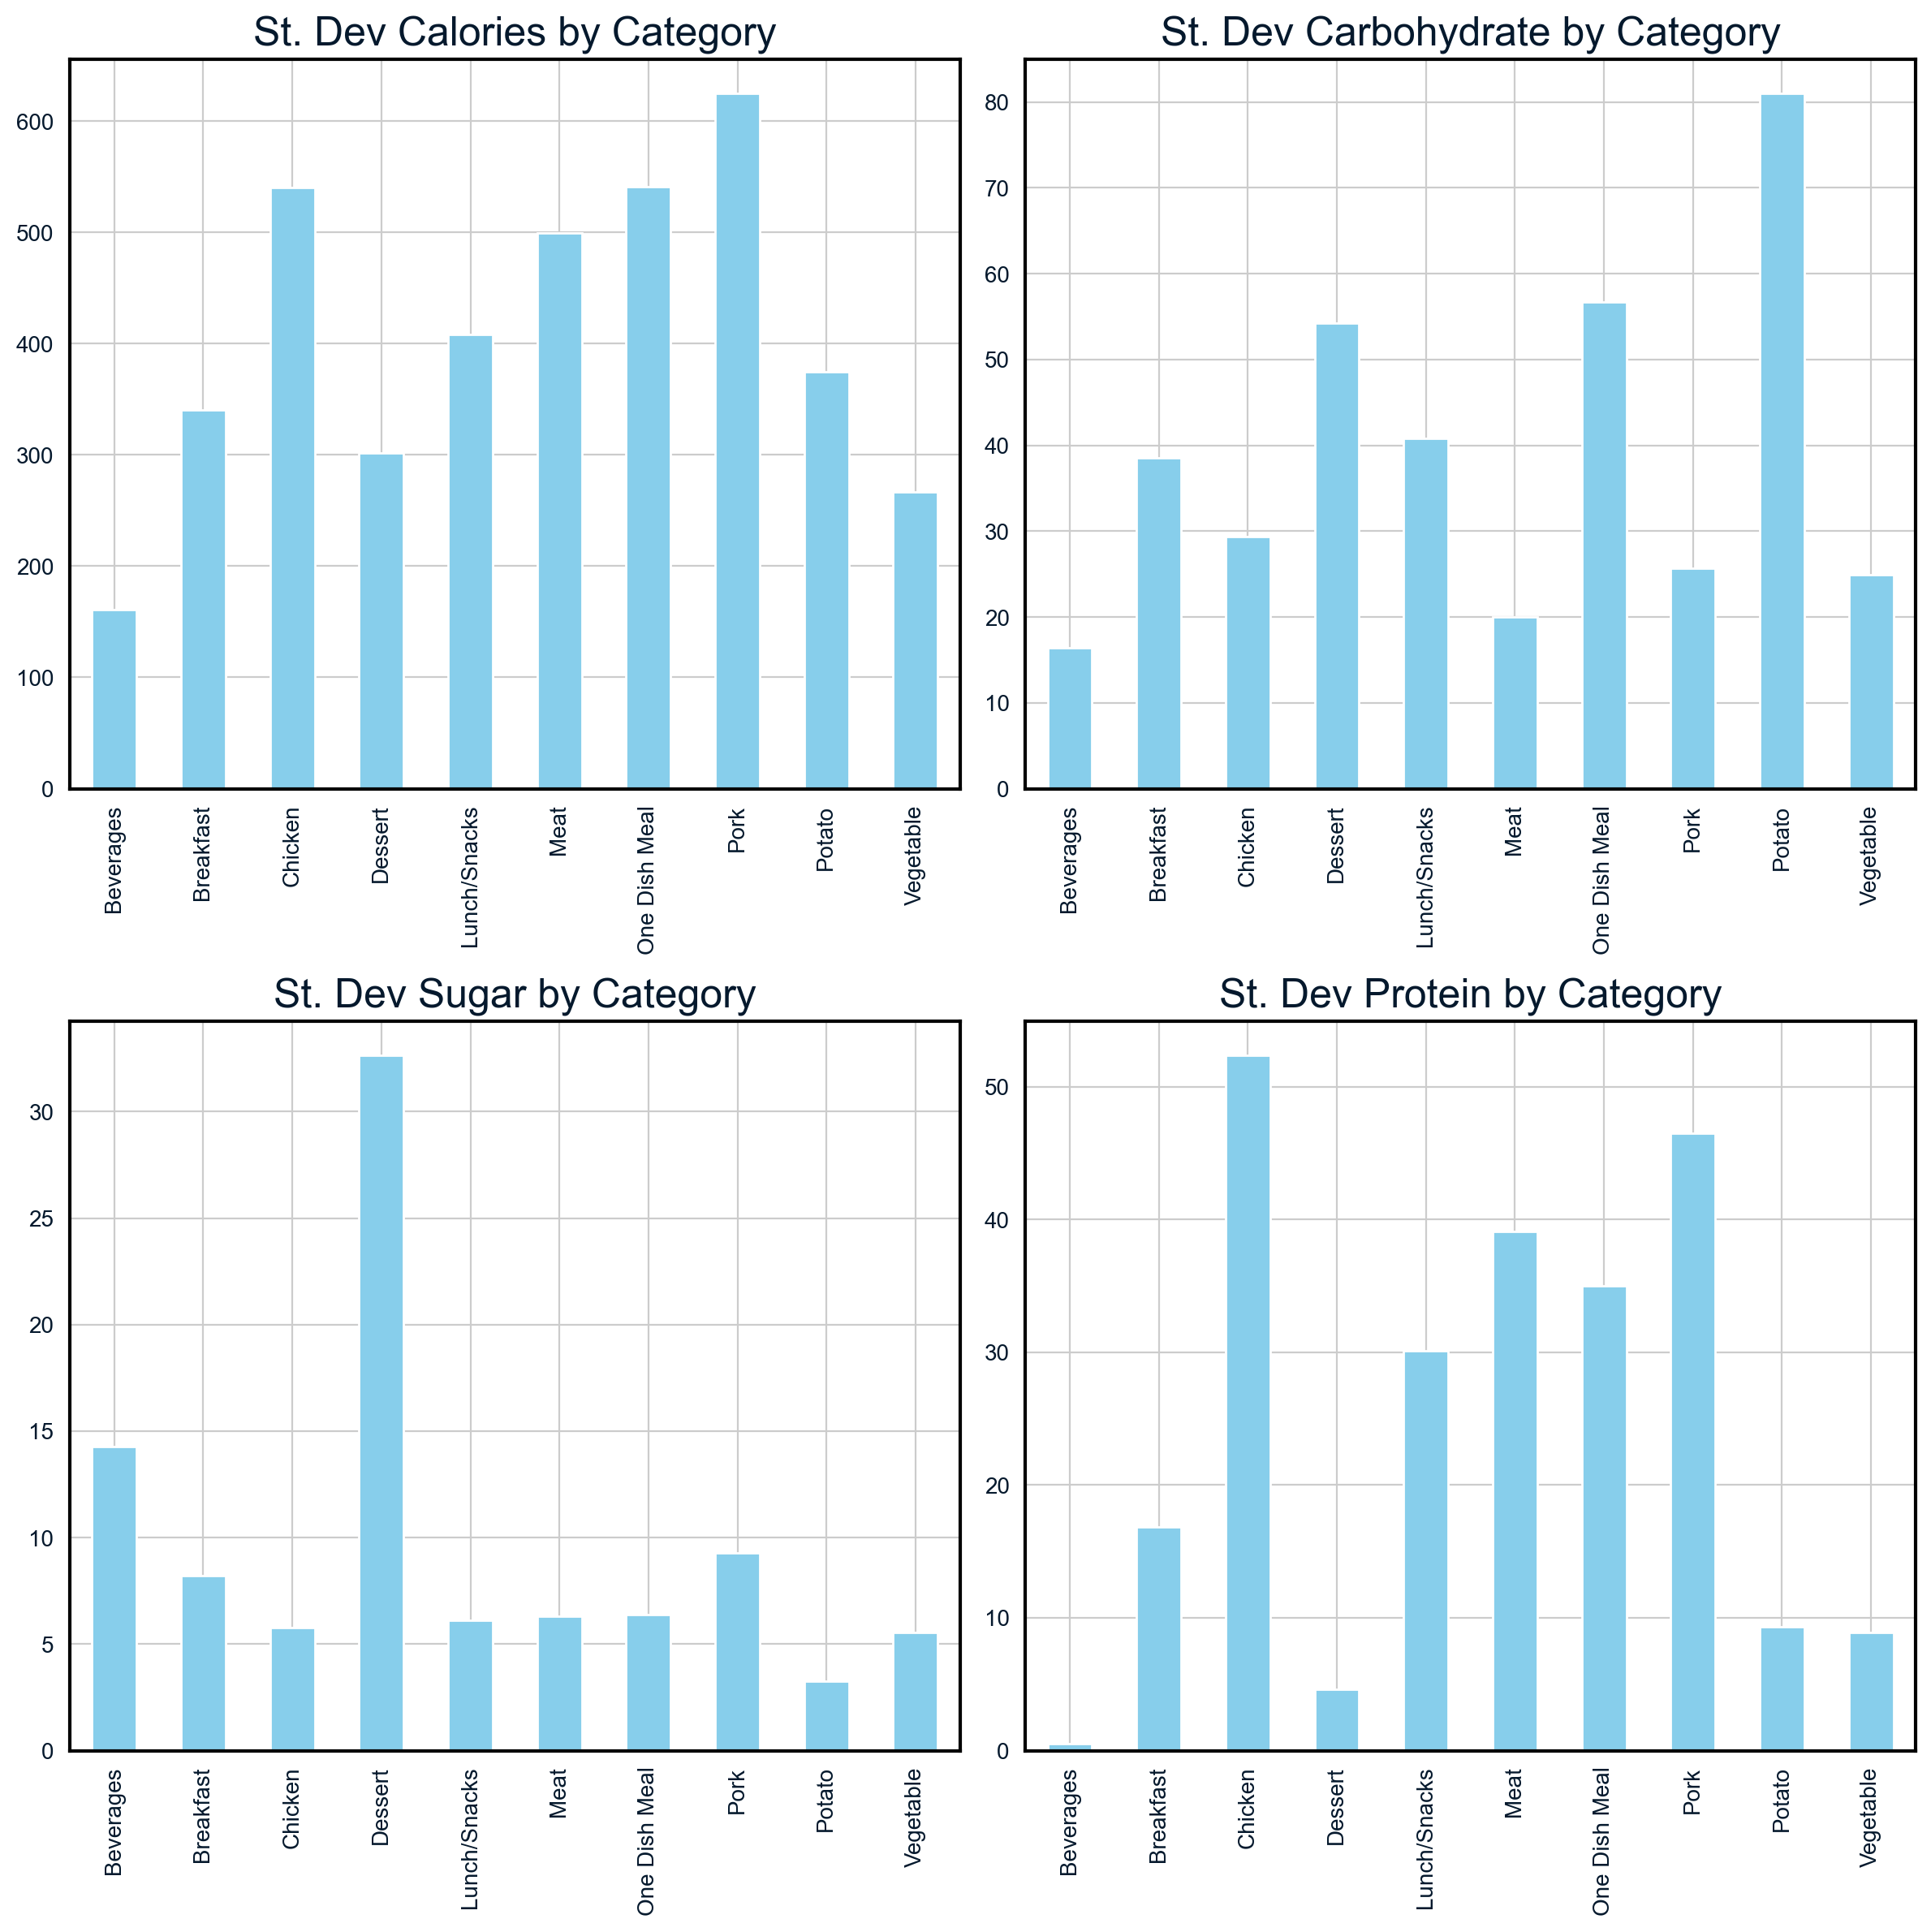

In [85]:
# Set the Seaborn style to include a grid
sns.set_style("whitegrid")

# Calculate the median for each numerical column grouped by category
category_std = recipe_site_traffic.groupby("category")[numerical_columns].std().reset_index()

# Define the number of columns and rows for subplots
num_cols = 2
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate rows needed for 2 columns

# Creating subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flattening axes for easy indexing
axes = axes.flatten()

# Using map to plot each bar plot
list(map(lambda col, ax: category_std.plot(x="category", y=col, kind="bar", ax=ax, color='skyblue', legend = False),
         numerical_columns, axes[:len(numerical_columns)]))

# Set titles and labels
list(map(lambda ax, col: ax.set_title(f"St. Dev {col.capitalize()} by Category", fontsize=18),
         axes[:len(numerical_columns)], numerical_columns))

list(map(lambda ax: ax.set_xlabel("", fontsize=18), axes[:len(numerical_columns)]))
list(map(lambda ax: ax.set_ylabel(ax.get_ylabel(), fontsize=18), axes[:len(numerical_columns)]))

# Thicken the borders of each plot
for ax in axes[:len(numerical_columns)]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set the border width
        spine.set_edgecolor('black')  # Set the border color to black

# Hide any unused subplots
for ax in axes[len(numerical_columns):]:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

For each category, we observe that the median, mean, and sd of the nutritional components are not symmetrical.

Instead, let us just examine the relationship between the number of servings and the high traffic status. It could mean that more servings can lead to high traffic.

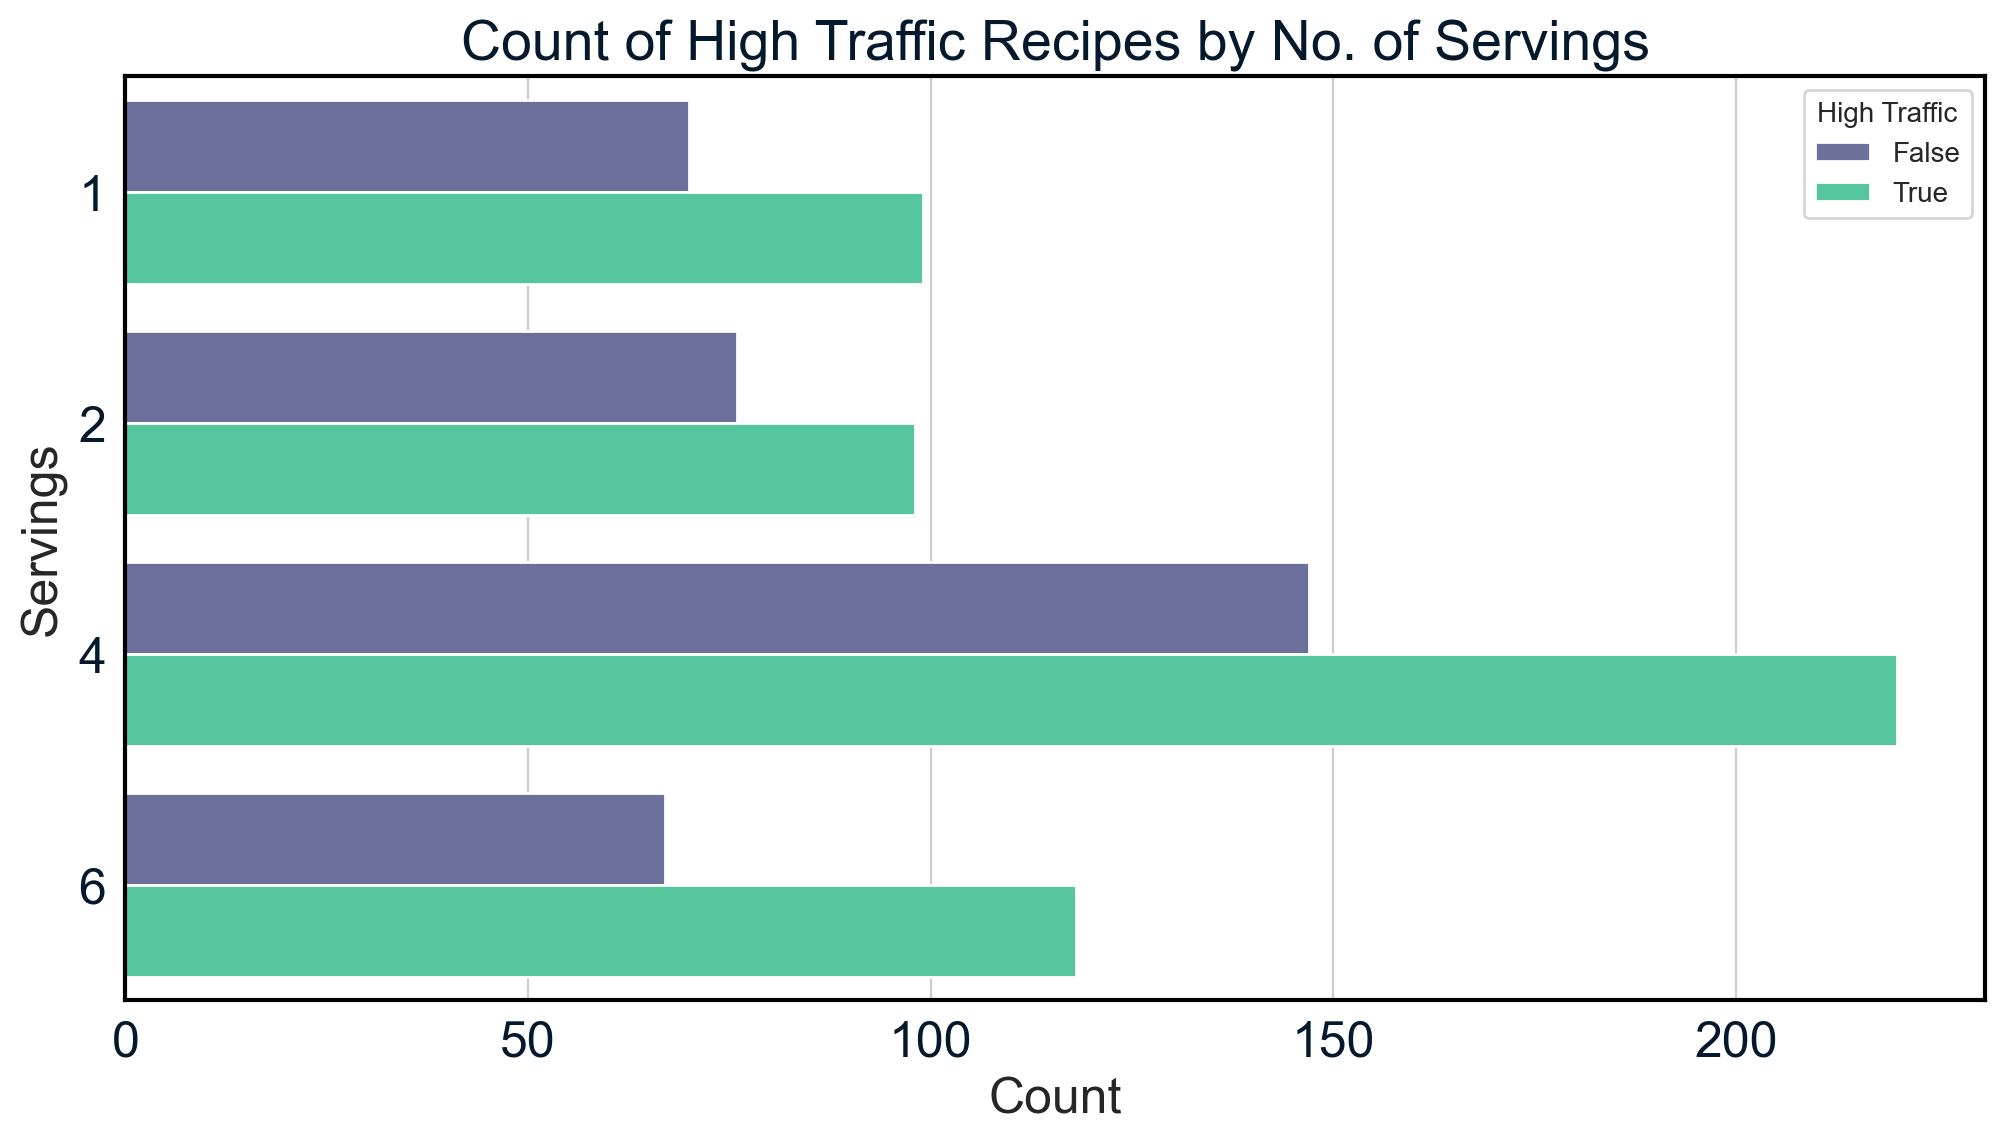

In [86]:
# Set the Seaborn style to include a grid
sns.set_style("whitegrid")

# Create a count plot with labels and title
plt.figure(figsize=(12, 6))
ax = sns.countplot(y="servings", hue="high_traffic", data=recipe_site_traffic)
plt.xlabel("Count", fontsize=18)
plt.ylabel("Servings", fontsize=18)
plt.title("Count of High Traffic Recipes by No. of Servings", fontsize=20)

# Resize the xticks
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Set legend
plt.legend(title="High Traffic")

# Thicken the spine
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Set the border width
    spine.set_edgecolor('black')  # Set the border color to black
    
plt.show()

In [87]:
# We can group by high traffic to show the percent distribution of servings

# Create pivot table
high_traffic_servings = pd.pivot_table(recipe_site_traffic, index=["servings"], columns=["high_traffic"], values="recipe", aggfunc='count')

# Normalize pivot table
high_traffic_servings_normalized = high_traffic_servings.div(high_traffic_servings.sum(axis=1), axis=0)

# Round the normalized values to two decimal places
high_traffic_servings_normalized = high_traffic_servings_normalized.round(2)

print(high_traffic_servings_normalized)

high_traffic  False  True 
servings                  
1              0.41   0.59
2              0.44   0.56
4              0.40   0.60
6              0.36   0.64


As seen from the plot and the normalized value of each serving, we can see that the highest servings (6) also exhibit a higher traffic rate.

It is also of our interest to examine the relationship between categories and high traffic status.

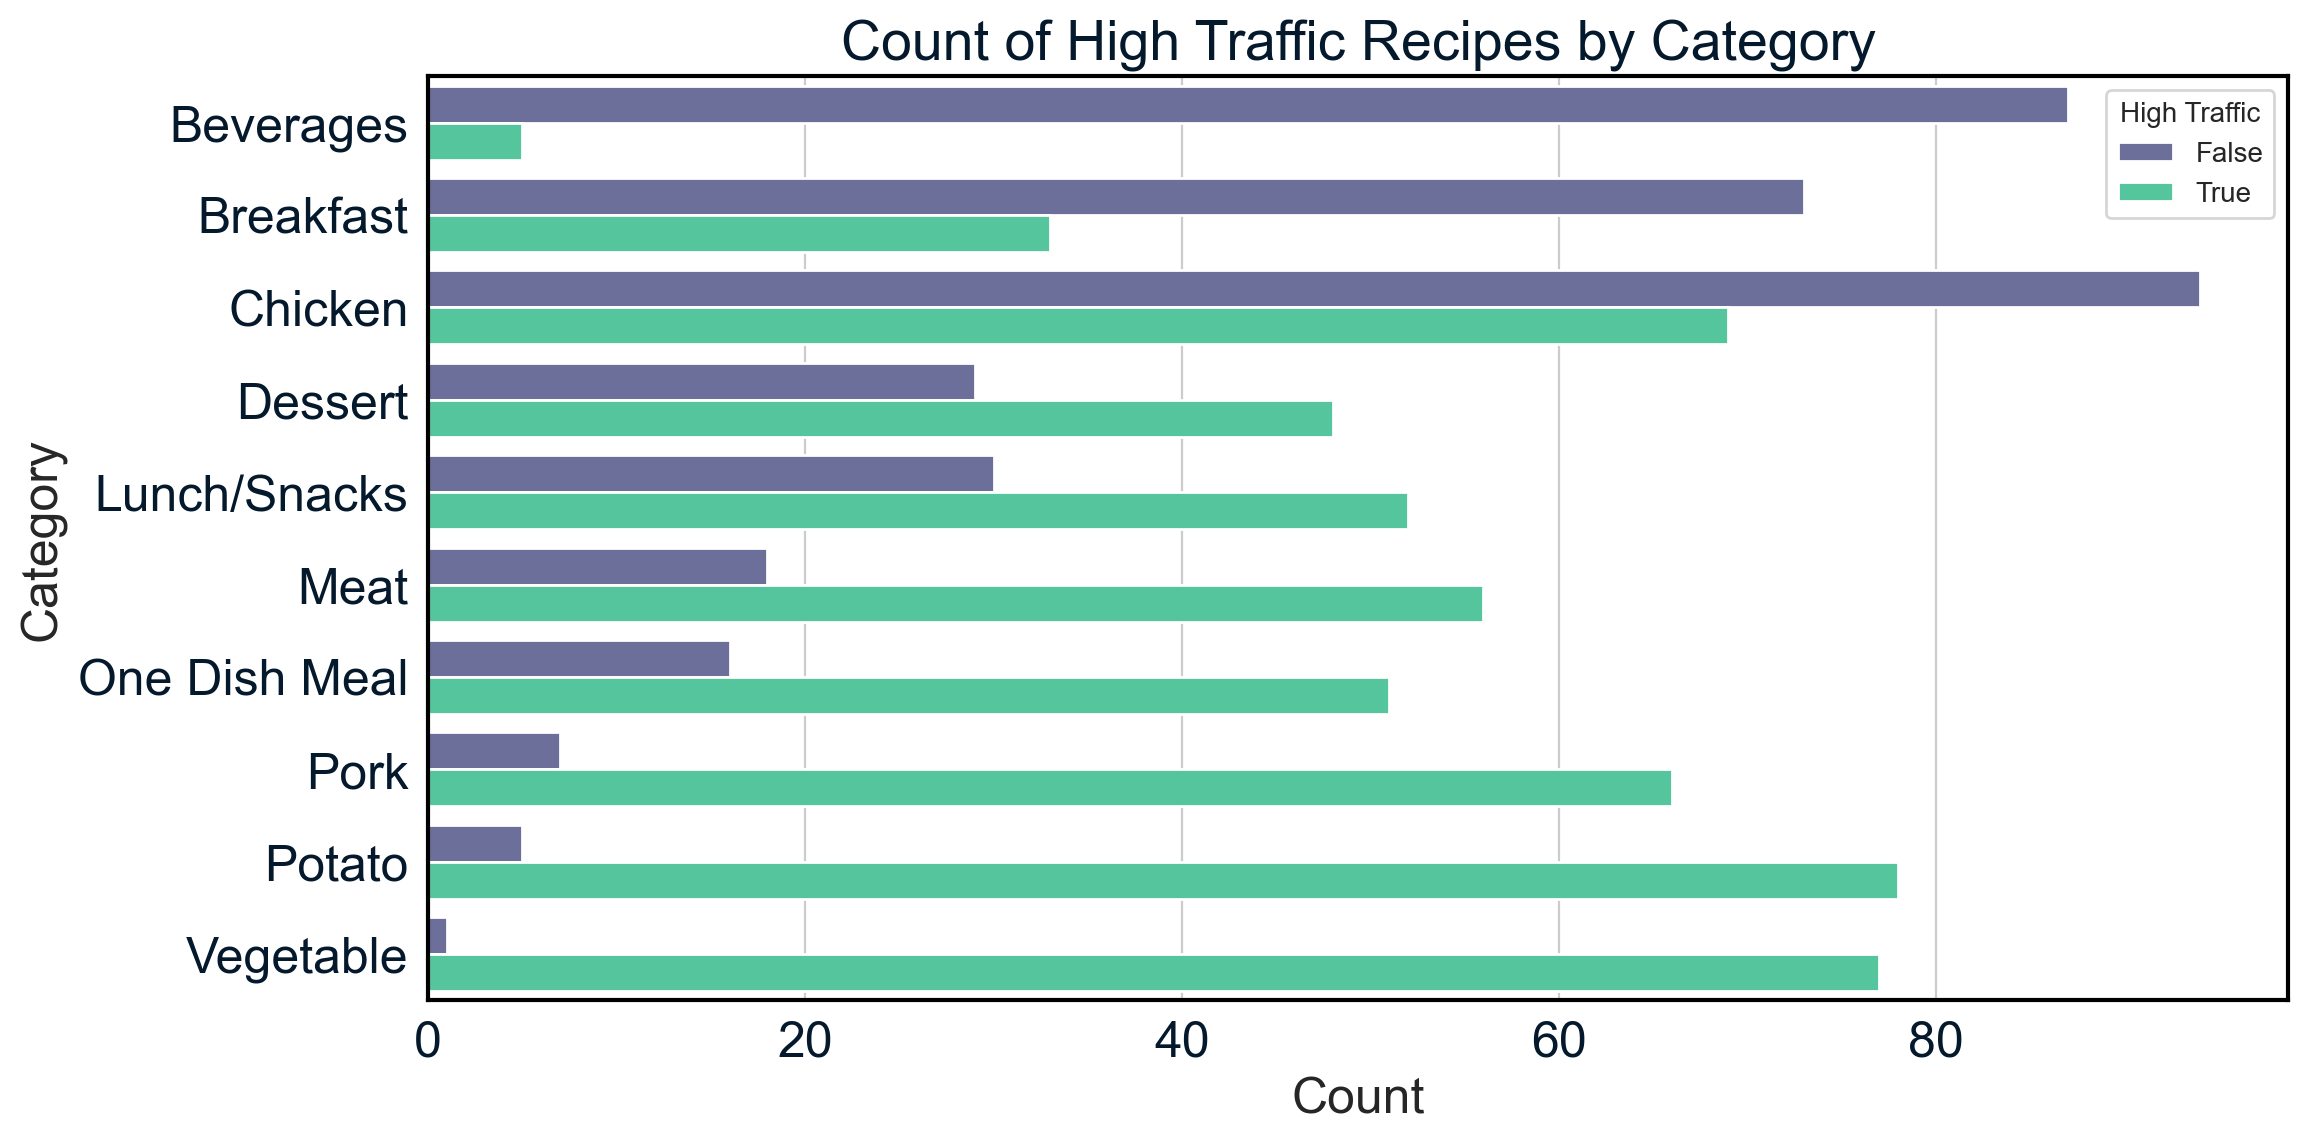

In [88]:
# Set the Seaborn style to include a grid
sns.set_style("whitegrid")

# Create a count plot with labels and title
plt.figure(figsize=(12, 6))
ax = sns.countplot(y="category", hue="high_traffic", data=recipe_site_traffic)
plt.xlabel("Count", fontsize=18)
plt.ylabel("Category", fontsize=18)
plt.title("Count of High Traffic Recipes by Category", fontsize=20)

# Resize the ticks
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Set legend
plt.legend(title="High Traffic")

# Thicken the spine
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Set the border width
    spine.set_edgecolor('black')  # Set the border color to black
    
plt.show()

In [89]:
# We can group by high traffic to show the percent distribution of category

# Create pivot table
high_traffic_category = pd.pivot_table(recipe_site_traffic, index=["category"], columns=["high_traffic"], values="recipe", aggfunc='count')

# Normalize pivot table
high_traffic_category_normalized = high_traffic_category.div(high_traffic_category.sum(axis=1), axis=0)

# Round the normalized values to two decimal places
high_traffic_category_normalized = high_traffic_category_normalized.round(2)

# Print the top categories with the most traffic
sorted_high_traffic_category = high_traffic_category_normalized.sort_values(by = True, ascending=False)

print(sorted_high_traffic_category)

high_traffic   False  True 
category                   
Vegetable       0.01   0.99
Potato          0.06   0.94
Pork            0.10   0.90
Meat            0.24   0.76
One Dish Meal   0.24   0.76
Lunch/Snacks    0.37   0.63
Dessert         0.38   0.62
Chicken         0.58   0.42
Breakfast       0.69   0.31
Beverages       0.95   0.05


The results of our EDA suggest that showcasing recipes in certain categories can lead to increased traffic. In particular, at least 90% of the recipes with vegetable, potato, and pork led to high traffic.

# **Step 3: Model Development**

We are now done with the EDA. Let us proceed with developing our machine learning (ML) model. This particular problem is best suited to be solved using a binary classification algorithm.

Our aim is to predict which recipes are "high traffic" status.

In [90]:
# But first, we should deal with the outlier issue of our dataset, as revealed by our EDA

# Let us create a function to calculate the limits, specifically, the 5th and 95th percentile. We use this range to remove the outliers.

def calculate_outlier_limits(data):
    lower_limit = np.percentile(data, 5)
    upper_limit = np.percentile(data, 95)
    return lower_limit, upper_limit

In [91]:
# Select the nutrient columns
nutrient_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

# For each nutrient, calculate the outlier limits

outlier_limits = {}
for column in nutrient_columns:
    lower_limit, upper_limit = calculate_outlier_limits(recipe_site_traffic[column])
    outlier_limits[column] = (lower_limit, upper_limit)

# Show the calculated outlier limits

for column, limits in outlier_limits.items():
    print(f"Column: {column}")
    print(f"Lower Limit: {limits[0]}")
    print(f"Upper Limit: {limits[1]}")
    print("--------------------------------")

Column: calories
Lower Limit: 23.021000000000004
Upper Limit: 1331.9979999999998
--------------------------------
Column: carbohydrate
Lower Limit: 1.514
Upper Limit: 115.71499999999985
--------------------------------
Column: sugar
Lower Limit: 0.36700000000000005
Upper Limit: 37.93999999999997
--------------------------------
Column: protein
Lower Limit: 0.24
Upper Limit: 88.44999999999996
--------------------------------


We can then proceed to transform our data using our lower and upper limit to get our desired distribution.

We will do the following data transformations:

1. Removing Outliers
2. Capping Outliers
3. Winsorization
4. Logarithmic Transformation
5. Square Root Transformation
6. Box-Cox Transformation
7. Yeo-Johnson Transformation

In [92]:
# Import data transformations from scipy

from scipy.stats import boxcox, yeojohnson
from scipy.stats.mstats import winsorize

In [93]:
# Make multiple copies of the dataset so we can do each individual data transformation
transformed_data_RO = recipe_site_traffic.copy()
transformed_data_CO = recipe_site_traffic.copy()
transformed_data_WSR = recipe_site_traffic.copy()
transformed_data_log = recipe_site_traffic.copy()
transformed_data_sqrt = recipe_site_traffic.copy()
transformed_data_BC = recipe_site_traffic.copy()
transformed_data_YJ = recipe_site_traffic.copy()

for column in nutrient_columns:
    lower_limit, upper_limit = outlier_limits[column]
    
    # 1. Removing Outliers (RO)
    transformed_data_RO = transformed_data_RO[
        (transformed_data_RO[column] >= lower_limit) & (transformed_data_RO[column] <= upper_limit)
    ]           
    
    # 2. Capping Outliers (CO)
    transformed_data_CO[column] = transformed_data_CO[column].clip(lower=lower_limit, upper=upper_limit)           
    
    # 3. Winsorization (WSR)
    transformed_data_WSR[column] = winsorize(transformed_data_WSR[column], limits=[0.05, 0.05])
    
    # 4. Logarithmic (log)
    # Use np.log1p for logarithmic transformation (log(1 + x)) to handle zero values
    transformed_data_log[column] = np.log1p(transformed_data_log[column])                          
    
    # 5. Square Root (sqrt)
    transformed_data_sqrt[column] = np.sqrt(transformed_data_sqrt[column])                           
    
    # 6. Box-Cox (BC)
    # Box-Cox transformation only works with positive data, so replace zeros with a small value
    transformed_data_BC[column] = boxcox(transformed_data_BC[column].clip(lower=0.00001))[0]                         
    # 7. Yeo-Johnson (YJ)
    # Yeo-Johnson transformation can handle zero and negative values
    transformed_data_YJ[column] = yeojohnson(transformed_data_YJ[column])[0]    

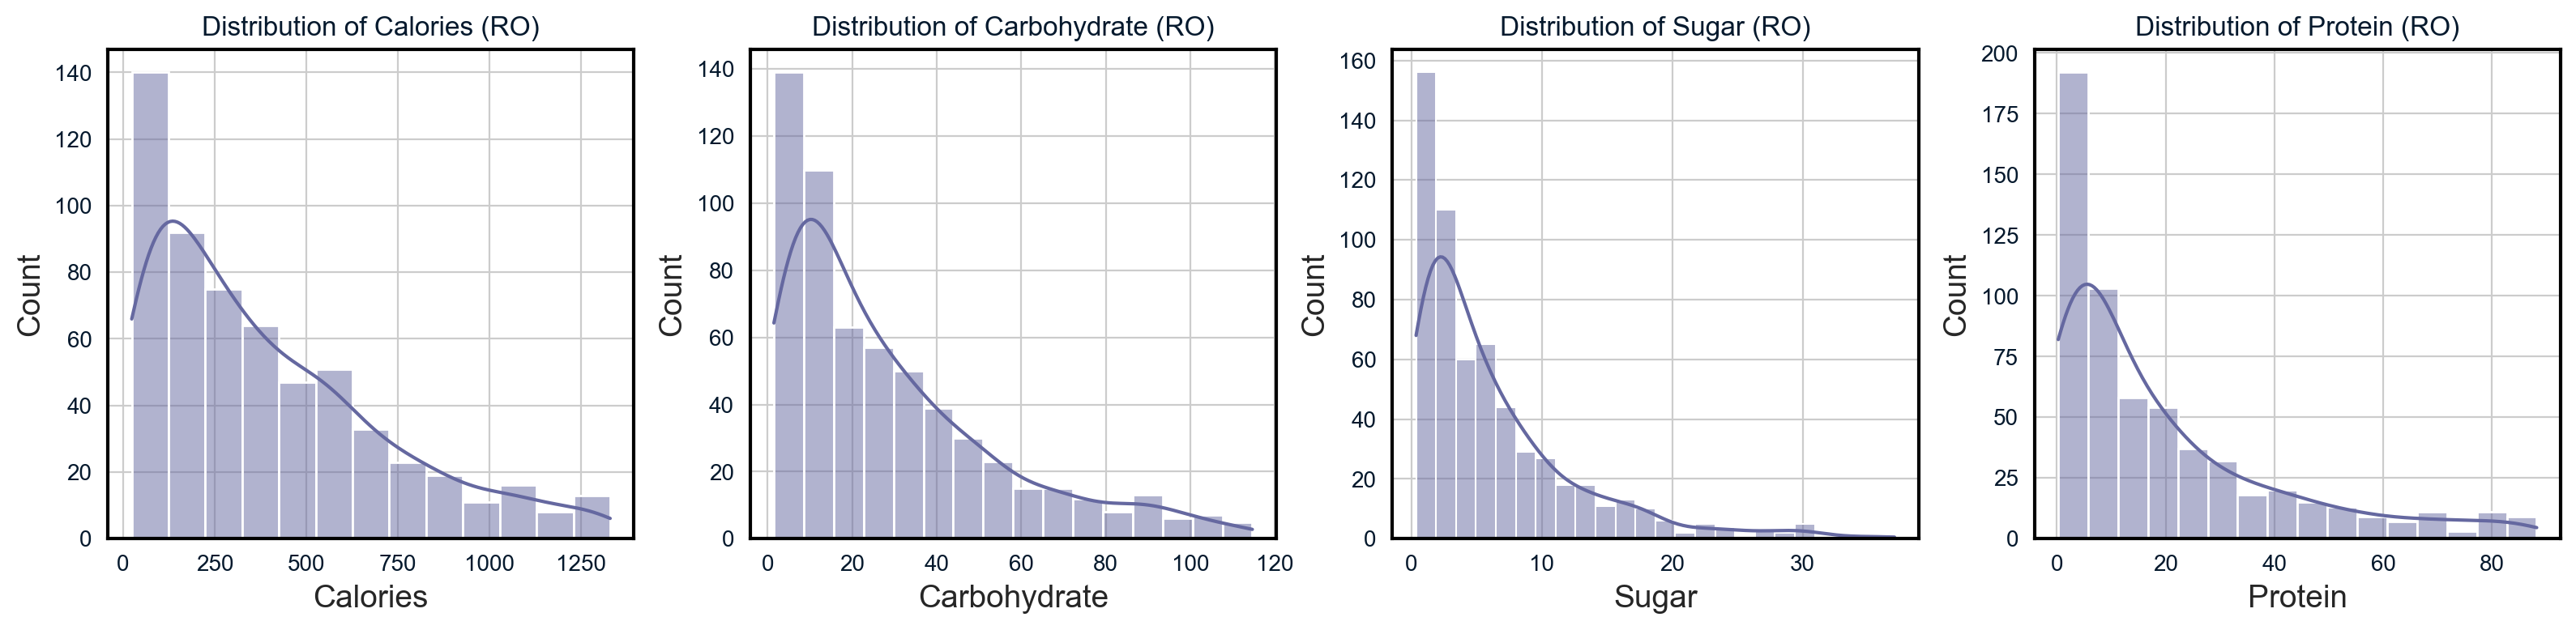

In [94]:
plt.figure(figsize=(16, 4))

# creating a bar plot for RO transformation
for i, column in enumerate(nutrient_columns):
    plt.subplot(1, len(nutrient_columns), i+1)
    sns.histplot(data=transformed_data_RO, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()} (RO)")

    # Enlarge x and y labels
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Thicken spines and set it to black
    ax = plt.gca()  # get the current Axes
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

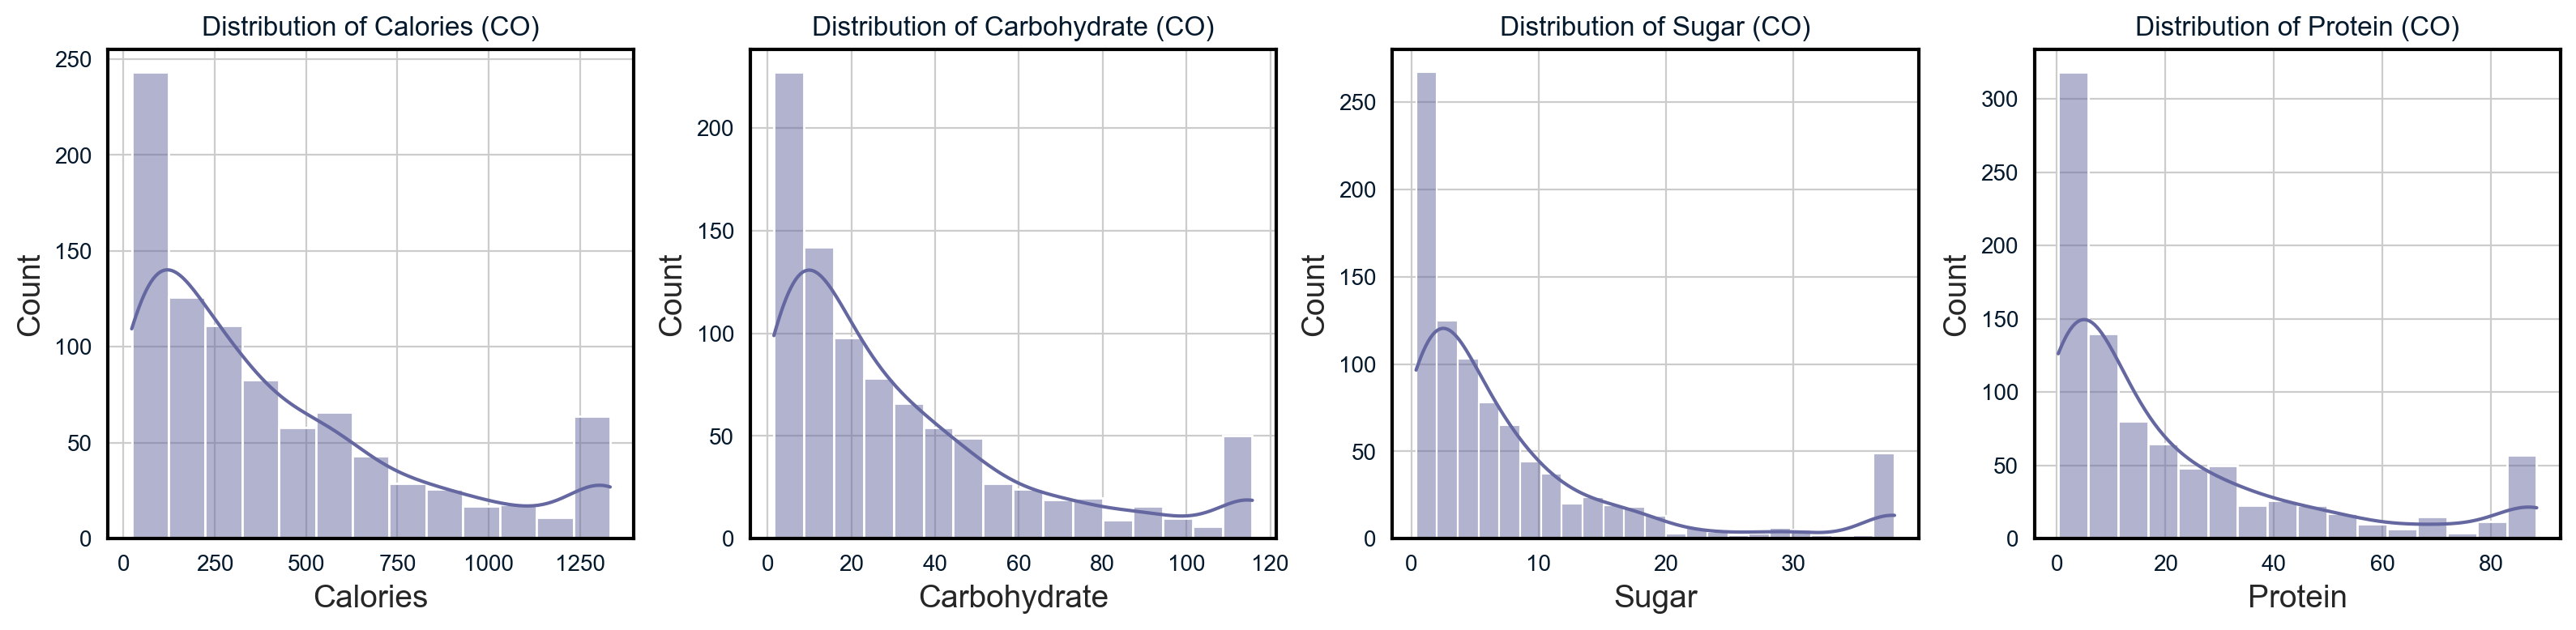

In [95]:
plt.figure(figsize=(16, 4))

# creating a bar plot for CO transformation
for i, column in enumerate(nutrient_columns):
    plt.subplot(1, len(nutrient_columns), i+1)
    sns.histplot(data=transformed_data_CO, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()} (CO)")

    # Enlarge x and y labels
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Thicken spines and set it to black
    ax = plt.gca()  # get the current Axes
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

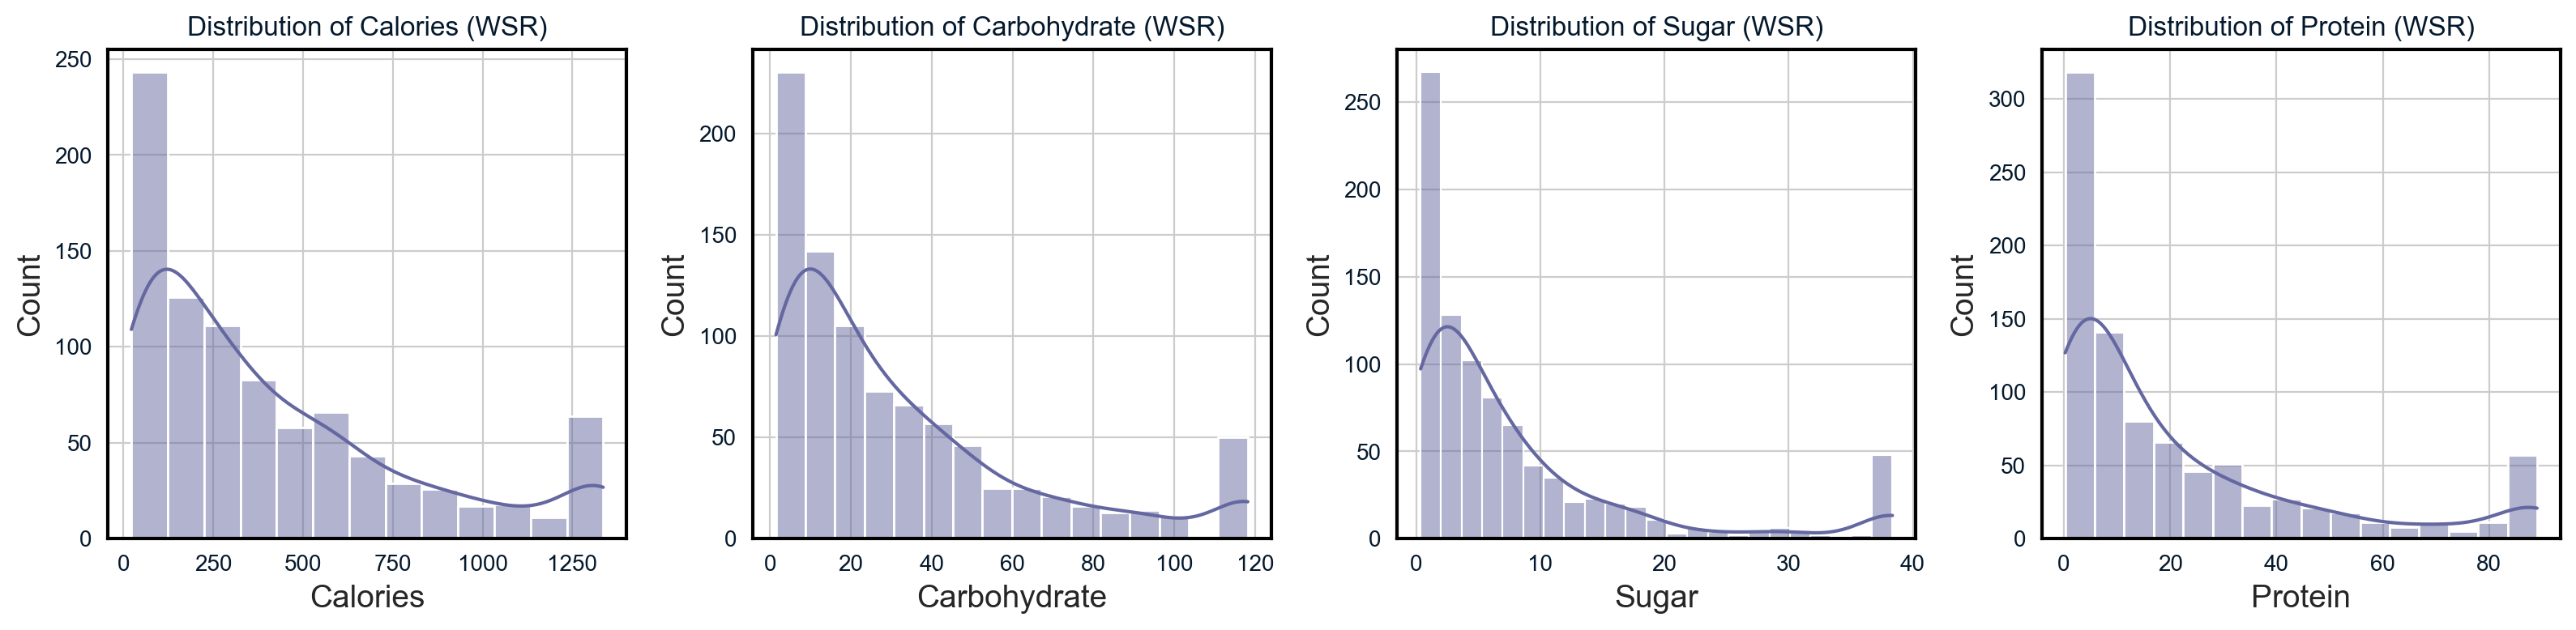

In [96]:
plt.figure(figsize=(16, 4))

# creating a bar plot for WSR transformation
for i, column in enumerate(nutrient_columns):
    plt.subplot(1, len(nutrient_columns), i+1)
    sns.histplot(data=transformed_data_WSR, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()} (WSR)")

    # Enlarge x and y labels
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Thicken spines and set it to black
    ax = plt.gca()  # get the current Axes
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

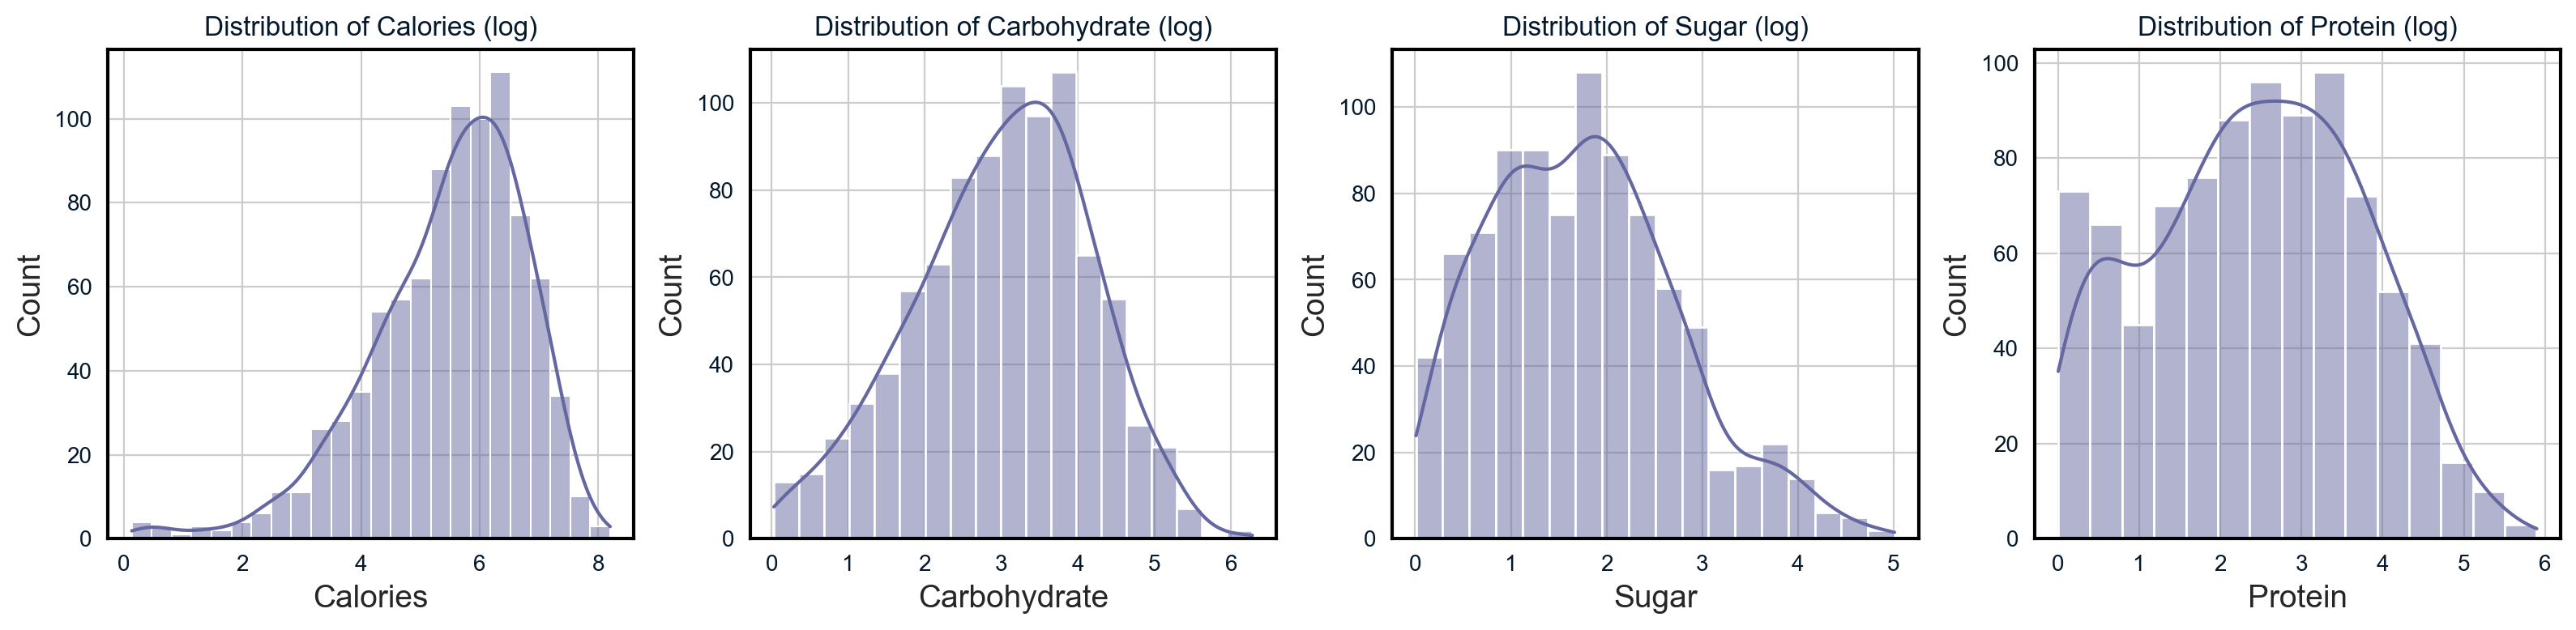

In [97]:
plt.figure(figsize=(16, 4))

# creating a bar plot for log transformation
for i, column in enumerate(nutrient_columns):
    plt.subplot(1, len(nutrient_columns), i+1)
    sns.histplot(data=transformed_data_log, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()} (log)")

    # Enlarge x and y labels
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Thicken spines and set it to black
    ax = plt.gca()  # get the current Axes
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

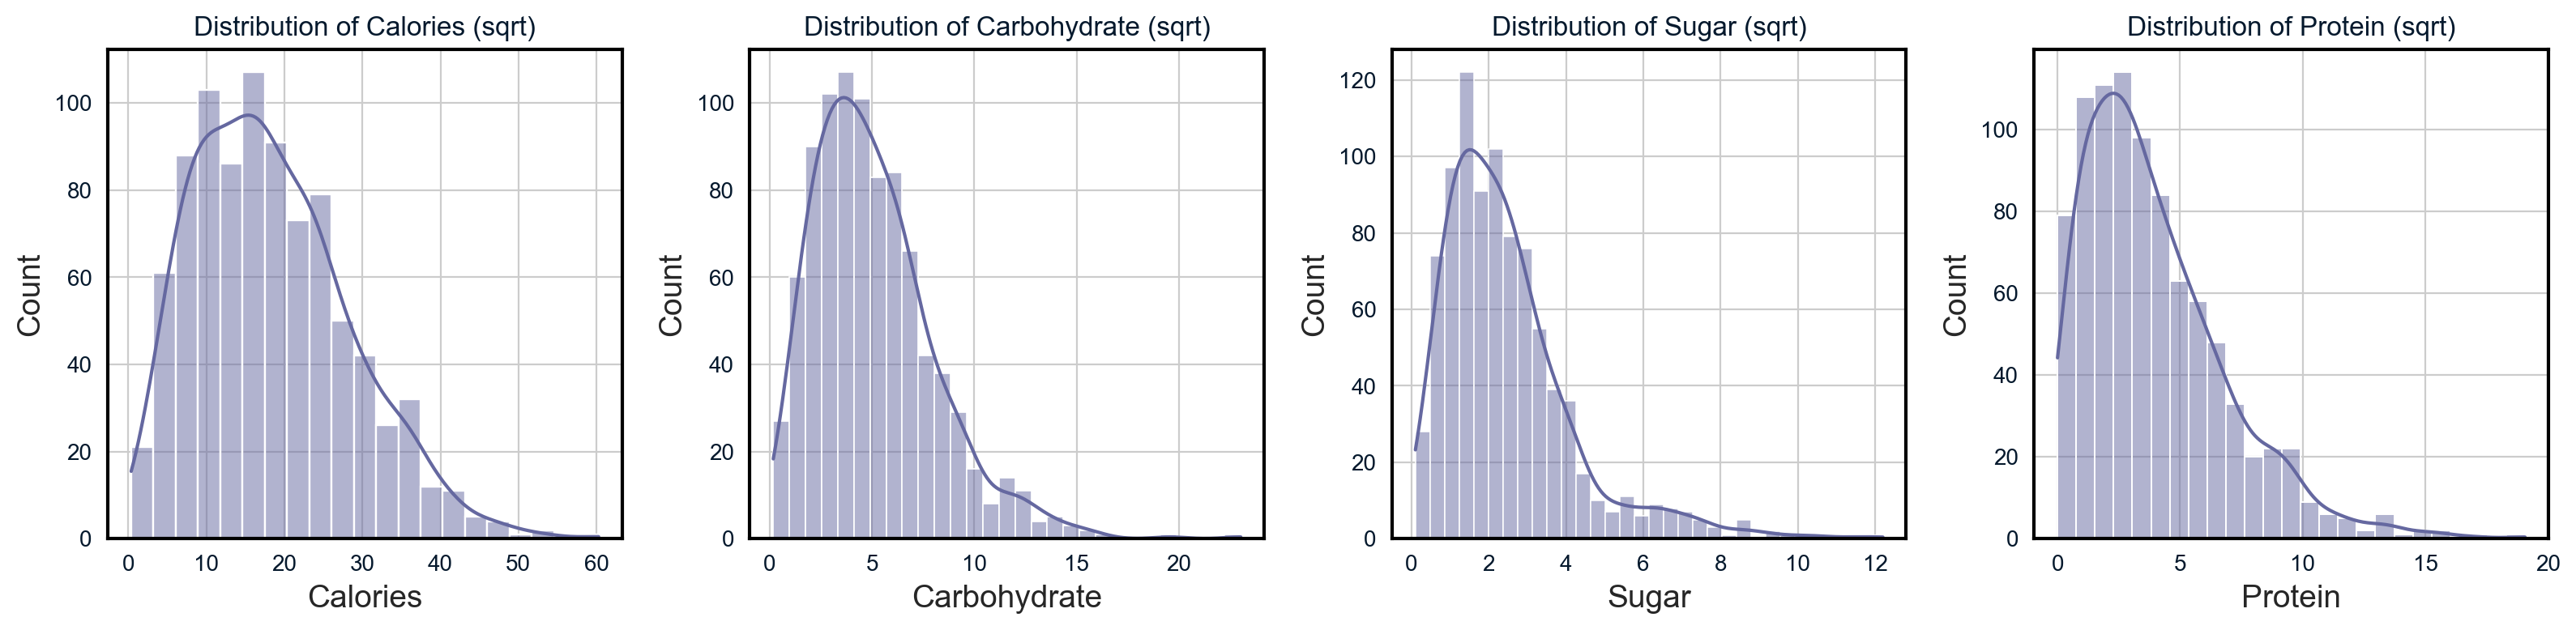

In [98]:
plt.figure(figsize=(16, 4))

# creating a bar plot for sqrt transformation
for i, column in enumerate(nutrient_columns):
    plt.subplot(1, len(nutrient_columns), i+1)
    sns.histplot(data=transformed_data_sqrt, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()} (sqrt)")

    # Enlarge x and y labels
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Thicken spines and set it to black
    ax = plt.gca()  # get the current Axes
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

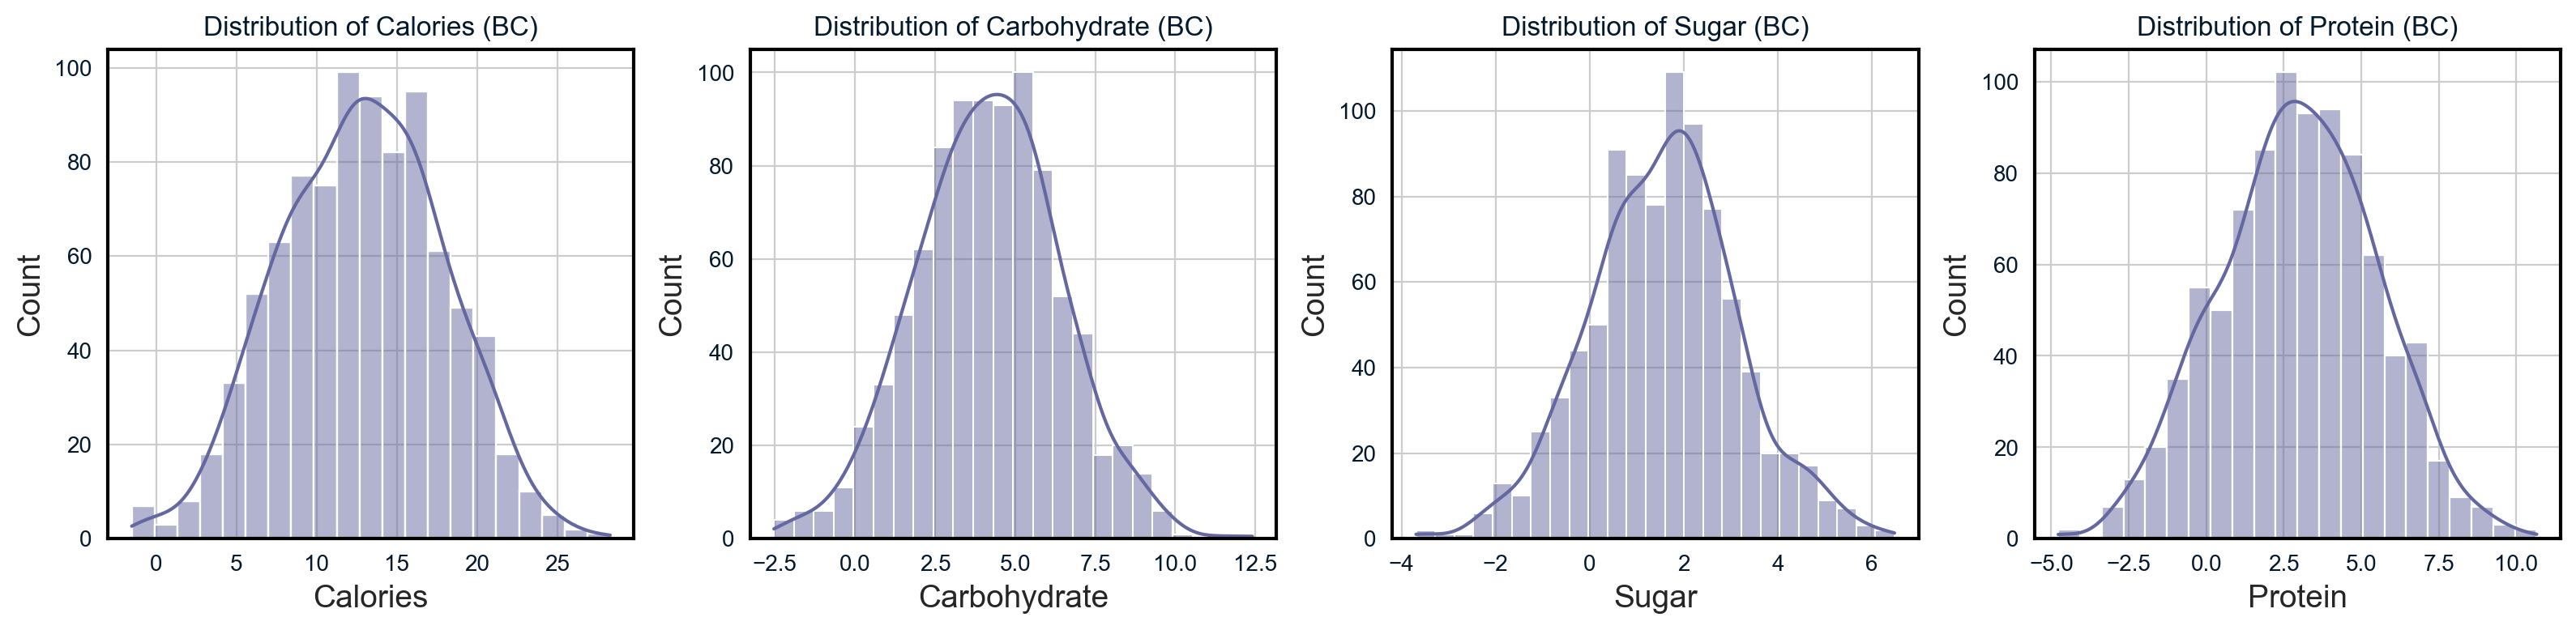

In [99]:
plt.figure(figsize=(16, 4))

# creating a bar plot for BC transformation
for i, column in enumerate(nutrient_columns):
    plt.subplot(1, len(nutrient_columns), i+1)
    sns.histplot(data=transformed_data_BC, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()} (BC)")

    # Enlarge x and y labels
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Thicken spines and set it to black
    ax = plt.gca()  # get the current Axes
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

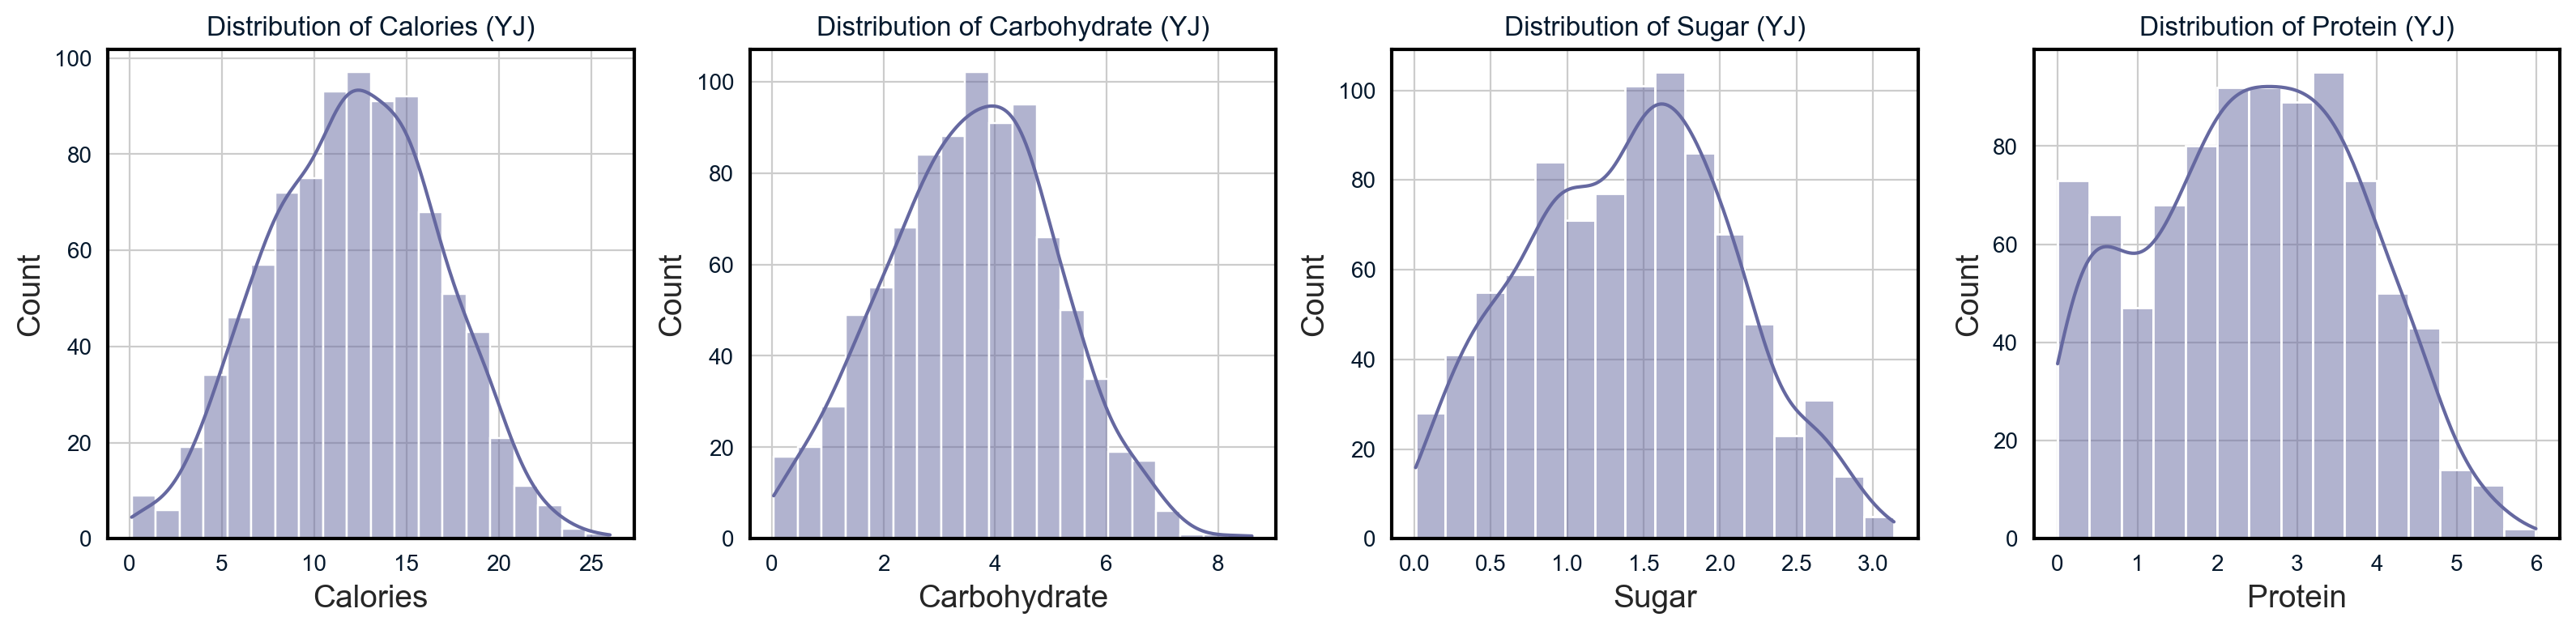

In [100]:
plt.figure(figsize=(16, 4))

# creating a bar plot for YJ transformation
for i, column in enumerate(nutrient_columns):
    plt.subplot(1, len(nutrient_columns), i+1)
    sns.histplot(data=transformed_data_YJ, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()} (YJ)")

    # Enlarge x and y labels
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Thicken spines and set it to black
    ax = plt.gca()  # get the current Axes
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

After visualizing the transformed nutrient columns, it is immediately obvious that the Box-Cox (BX) transformation performed the best, as the data distribution is close to uniform.

Therefore, we will use the BX-transformed data for our machine learning model.

In [101]:
# Before we proceed with splitting the dataset into training and testing sets, it is important to perform one-hot encoding on our category column

encoded_categories = pd.get_dummies(recipe_site_traffic["category"])

# Then concatenate the encoded categories with the original dataframe
recipe_site_traffic_encoded = pd.concat([transformed_data_BC, encoded_categories], axis=1)

# Drop the original category column (redundant)
recipe_site_traffic_encoded = recipe_site_traffic_encoded.drop("category", axis=1)

# Check the dataframe
recipe_site_traffic_encoded.head()

recipe   calories  carbohydrate     sugar   protein  servings  \
0       2   5.861317      5.349463 -0.407034 -0.082744         4   
1       3  18.656633      5.560178  1.194001  1.168001         1   
2       4   8.749556      4.882417  4.407580 -2.786981         4   
3       5   5.202664      0.654060 -0.220682 -0.599124         4   
4       6  17.086019      1.406394  0.513475  5.890263         2   

   high_traffic  Beverages  Breakfast  Chicken  Dessert  Lunch/Snacks  Meat  \
0          True          0          0        0        0             0     0   
1         False          0          1        0        0             0     0   
2          True          1          0        0        0             0     0   
3         False          1          0        0        0             0     0   
4          True          0          0        0        0             0     0   

   One Dish Meal  Pork  Potato  Vegetable  
0              0     0       1          0  
1              0     0       0          0  
2              0     0       0          0  
3              0     0       0          0  
4              1     0       0          0

In [102]:
# Import libraries for ML modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Import libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [103]:
# Split the data into features (X) and the target variable (y)
X = recipe_site_traffic_encoded.drop(["recipe", "high_traffic"], axis=1) # Drop the target variable and recipe index
y = recipe_site_traffic_encoded["high_traffic"] # Select the target variable

# We will use a testing size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# For seamless modeling, we will create a function to fit the model, make predictions, and then return the evaluation metrics

def run_model(model, X_train, y_train, X_test, y_test):
    
    evaulation_metrics = {} 

    # Fit the model to the training set
    model.fit(X_train, y_train)

    # Predict for both train and test data
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)

    # Evaluation metrics for train data
    model_accuracy_train = accuracy_score(y_train, model_pred_train)
    model_precision_train = precision_score(y_train, model_pred_train)
    model_recall_train = recall_score(y_train, model_pred_train)
    model_f1_train = f1_score(y_train, model_pred_train)
    model_cm_train = confusion_matrix(y_train, model_pred_train)
    
    evaulation_metrics['train'] = [model_accuracy_train, model_precision_train, model_recall_train, model_f1_train, model_cm_train]

    # Evaluation metrics for test data
    model_accuracy_test = accuracy_score(y_test, model_pred_test)
    model_precision_test = precision_score(y_test, model_pred_test)
    model_recall_test = recall_score(y_test, model_pred_test)
    model_f1_test = f1_score(y_test, model_pred_test)
    model_cm_test = confusion_matrix(y_test, model_pred_test)
    
    evaulation_metrics['test'] = [model_accuracy_test, model_precision_test, model_recall_test, model_f1_test, model_cm_test]

    return evaulation_metrics

In [104]:
# Let us now train the model using default hyperparameters

# Logistic Regression
logreg = LogisticRegression()
logreg_evaluation_metrics = run_model(logreg, X_train, y_train, X_test, y_test)

# Gaussian Naive Bayes 
gnb = GaussianNB()
gnb_evaluation_metrics = run_model(gnb, X_train, y_train, X_test, y_test)

# Support Vector Machines
svm = SVC()
svm_evaluation_metrics = run_model(svm, X_train, y_train, X_test, y_test)

# Random Forest
rf = RandomForestClassifier(random_state = 34)
rf_evaluation_metrics = run_model(rf, X_train, y_train, X_test, y_test)

# **Step 4: Model Evaluation**

In [105]:
# Create a function to print the evaluation metrics

def print_metrics(evaluation_metrics):
    print("  Accuracy:", evaluation_metrics[0])
    print("  Precision:", evaluation_metrics[1])
    print("  Recall:", evaluation_metrics[2])
    print("  F1-Score:", evaluation_metrics[3])
    print("  Confusion Matrix:")
    print(evaluation_metrics[4])

In [106]:
# Print the evaluation metrics for every ML model for both training and testing sets

# Logistic Regression
print("Logistic Regression Train:")
print_metrics(logreg_evaluation_metrics['train'])
print("Logistic Regression Test:")
print_metrics(logreg_evaluation_metrics['test'])

# Gaussian Naive-Bayes
print("Gaussian Naive-Bayes Train:")
print_metrics(gnb_evaluation_metrics['train'])
print("Gaussian Naive-Bayes Test:")
print_metrics(gnb_evaluation_metrics['test'])

# Support Vector Machines
print("Support Vector Machines Train:")
print_metrics(svm_evaluation_metrics['train'])
print("Support Vector Machines Test:")
print_metrics(svm_evaluation_metrics['test'])

# Random Forest
print("Random Forest Train:")
print_metrics(rf_evaluation_metrics['train'])
print("Random Forest Test:")
print_metrics(rf_evaluation_metrics['test'])

Logistic Regression Train:
  Accuracy: 0.7569832402234636
  Precision: 0.8037825059101655
  Recall: 0.7888631090487239
  F1-Score: 0.7962529274004684
  Confusion Matrix:
[[202  83]
 [ 91 340]]
Logistic Regression Test:
  Accuracy: 0.7821229050279329
  Precision: 0.7927927927927928
  Recall: 0.8461538461538461
  F1-Score: 0.8186046511627907
  Confusion Matrix:
[[52 23]
 [16 88]]
Gaussian Naive-Bayes Train:
  Accuracy: 0.7108938547486033
  Precision: 0.8733333333333333
  Recall: 0.6078886310904872
  F1-Score: 0.7168262653898768
  Confusion Matrix:
[[247  38]
 [169 262]]
Gaussian Naive-Bayes Test:
  Accuracy: 0.7430167597765364
  Precision: 0.8625
  Recall: 0.6634615384615384
  F1-Score: 0.7499999999999999
  Confusion Matrix:
[[64 11]
 [35 69]]
Support Vector Machines Train:
  Accuracy: 0.6899441340782123
  Precision: 0.665086887835703
  Recall: 0.9767981438515081
  F1-Score: 0.7913533834586467
  Confusion Matrix:
[[ 73 212]
 [ 10 421]]
Support Vector Machines Test:
  Accuracy: 0.65921787

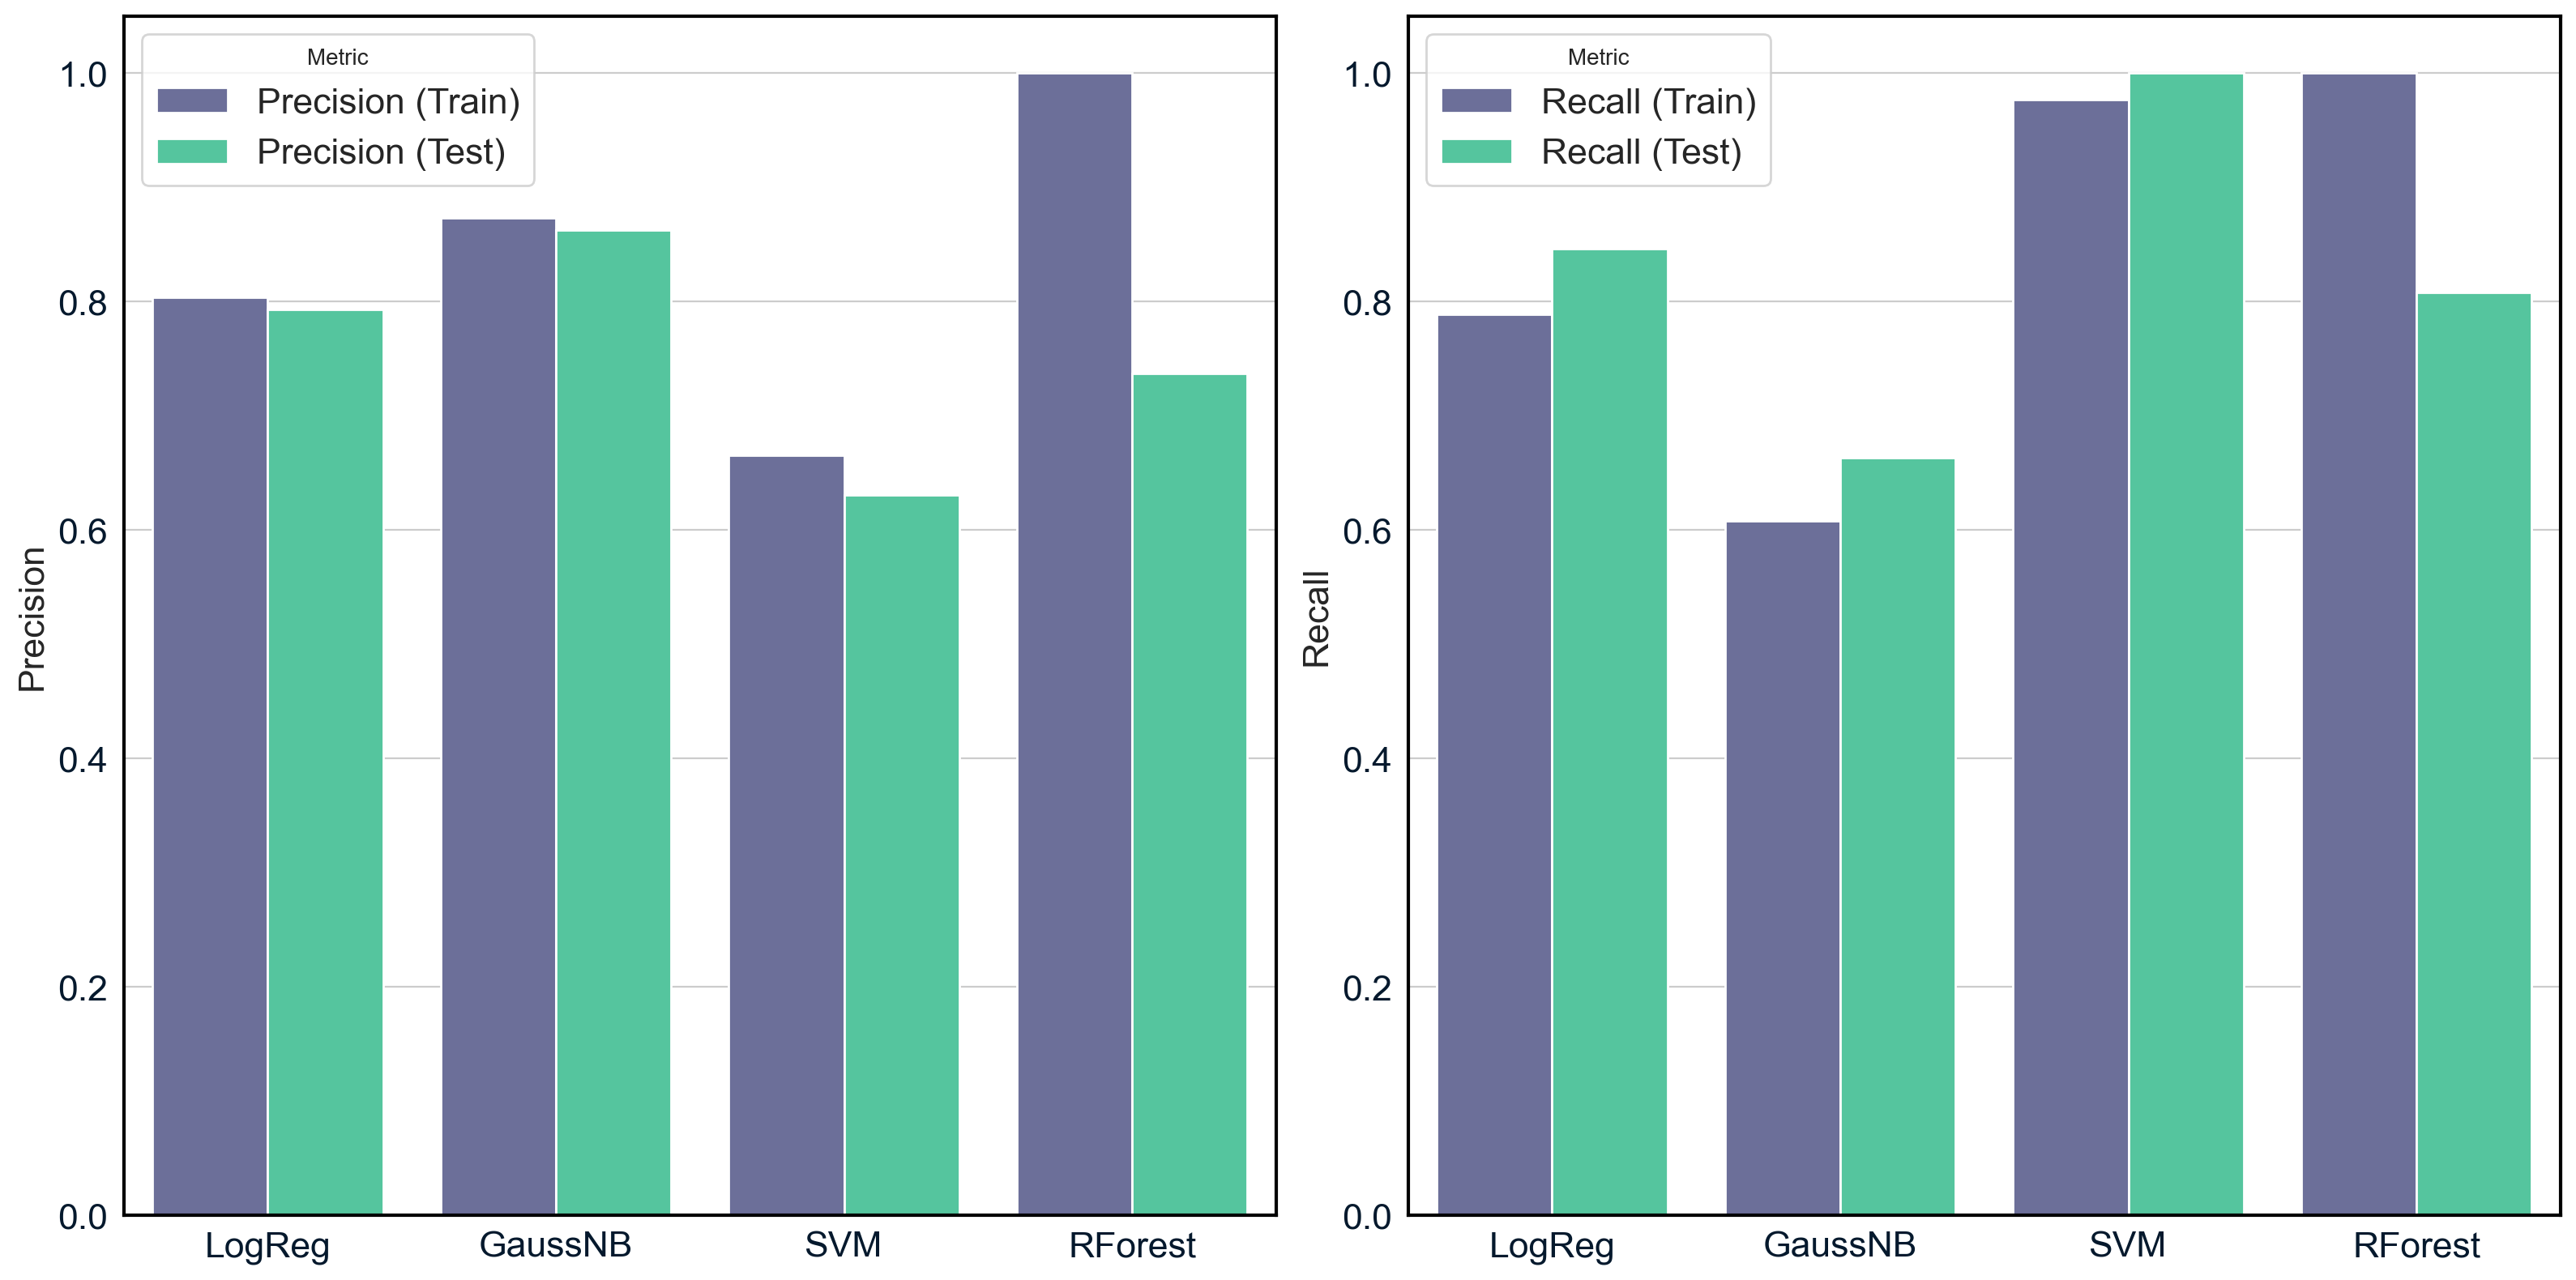

In [107]:
# Prepare DataFrame for plotting
metrics_df = pd.DataFrame({
    'Model': ['LogReg', 'GaussNB', 'SVM', 'RForest'],
    'Precision (Train)': [logreg_evaluation_metrics['train'][1], gnb_evaluation_metrics['train'][1], svm_evaluation_metrics['train'][1], rf_evaluation_metrics['train'][1]],
    'Recall (Train)': [logreg_evaluation_metrics['train'][2], gnb_evaluation_metrics['train'][2], svm_evaluation_metrics['train'][2], rf_evaluation_metrics['train'][2]],
    'Precision (Test)': [logreg_evaluation_metrics['test'][1], gnb_evaluation_metrics['test'][1], svm_evaluation_metrics['test'][1], rf_evaluation_metrics['test'][1]],
    'Recall (Test)': [logreg_evaluation_metrics['test'][2], gnb_evaluation_metrics['test'][2], svm_evaluation_metrics['test'][2], rf_evaluation_metrics['test'][2]]
})

# Melt DataFrame to long format for easier plotting
metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['Precision (Train)', 'Precision (Test)', 'Recall (Train)', 'Recall (Test)'],
                                  var_name='Metric', value_name='Value')

# Create plots
plt.figure(figsize=(16, 8))

# Subplot 1: Precision for Training vs Testing Set
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=metrics_melted[metrics_melted['Metric'].str.contains('Precision')], x='Model', y='Value', hue='Metric')
ax1.set_xlabel('', fontsize=16)
ax1.set_ylabel('Precision', fontsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xticklabels(['LogReg', 'GaussNB', 'SVM', 'RForest'])
ax1.legend(title='Metric', fontsize='16')  # Enlargen legend size
for spine in ax1.spines.values():
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

# Subplot 2: Recall for Training vs Testing Set
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=metrics_melted[metrics_melted['Metric'].str.contains('Recall')], x='Model', y='Value', hue='Metric')
ax2.set_xlabel('', fontsize=16)
ax2.set_ylabel('Recall', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_xticklabels(['LogReg', 'GaussNB', 'SVM', 'RForest'])
ax2.legend(title='Metric', fontsize='16')  # Enlargen legend size
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

**CLASS IMBALANCE**.

Since the the loss function of the ML models optimize for the majority class, we can still potentially improve the model performance if we generate synthetic samples by oversampling the minority class.


In [108]:
# Checking the count of the high_traffic column
recipe_site_traffic['high_traffic'].value_counts()

True     535
False    360
Name: high_traffic, dtype: int64

In [109]:
# Import oversampler module for imbalanced learning
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the training data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [110]:
# Let us now train the model with resampled X and y

# Logistic Regression
logreg = LogisticRegression()
logreg_evaluation_metrics_2 = run_model(logreg, X_resampled, y_resampled, X_test, y_test)

# Gaussian Naive Bayes 
gnb = GaussianNB()
gnb_evaluation_metrics_2 = run_model(gnb, X_resampled, y_resampled, X_test, y_test)

# Support Vector Machines
svm = SVC()
svm_evaluation_metrics_2 = run_model(svm, X_resampled, y_resampled, X_test, y_test)

# Random Forest
rf = RandomForestClassifier(random_state = 34)
rf_evaluation_metrics_2 = run_model(rf, X_resampled, y_resampled, X_test, y_test)

In [111]:
# Again, print the evaluation metrics for every ML model for both training and testing sets

# Logistic Regression
print("Logistic Regression Train:")
print_metrics(logreg_evaluation_metrics_2['train'])
print("Logistic Regression Test:")
print_metrics(logreg_evaluation_metrics_2['test'])

# Gaussian Naive-Bayes
print("Gaussian Naive-Bayes Train:")
print_metrics(gnb_evaluation_metrics_2['train'])
print("Gaussian Naive-Bayes Test:")
print_metrics(gnb_evaluation_metrics_2['test'])

# Support Vector Machines
print("Support Vector Machines Train:")
print_metrics(svm_evaluation_metrics_2['train'])
print("Support Vector Machines Test:")
print_metrics(svm_evaluation_metrics_2['test'])

# Random Forest
print("Random Forest Train:")
print_metrics(rf_evaluation_metrics_2['train'])
print("Random Forest Test:")
print_metrics(rf_evaluation_metrics_2['test'])

Logistic Regression Train:
  Accuracy: 0.7517401392111369
  Precision: 0.739514348785872
  Recall: 0.777262180974478
  F1-Score: 0.7579185520361991
  Confusion Matrix:
[[313 118]
 [ 96 335]]
Logistic Regression Test:
  Accuracy: 0.770949720670391
  Precision: 0.794392523364486
  Recall: 0.8173076923076923
  F1-Score: 0.8056872037914692
  Confusion Matrix:
[[53 22]
 [19 85]]
Gaussian Naive-Bayes Train:
  Accuracy: 0.7354988399071926
  Precision: 0.8201892744479495
  Recall: 0.6032482598607889
  F1-Score: 0.6951871657754011
  Confusion Matrix:
[[374  57]
 [171 260]]
Gaussian Naive-Bayes Test:
  Accuracy: 0.7541899441340782
  Precision: 0.875
  Recall: 0.6730769230769231
  F1-Score: 0.7608695652173914
  Confusion Matrix:
[[65 10]
 [34 70]]
Support Vector Machines Train:
  Accuracy: 0.6589327146171694
  Precision: 0.6030075187969924
  Recall: 0.9303944315545244
  F1-Score: 0.7317518248175183
  Confusion Matrix:
[[167 264]
 [ 30 401]]
Support Vector Machines Test:
  Accuracy: 0.681564245810

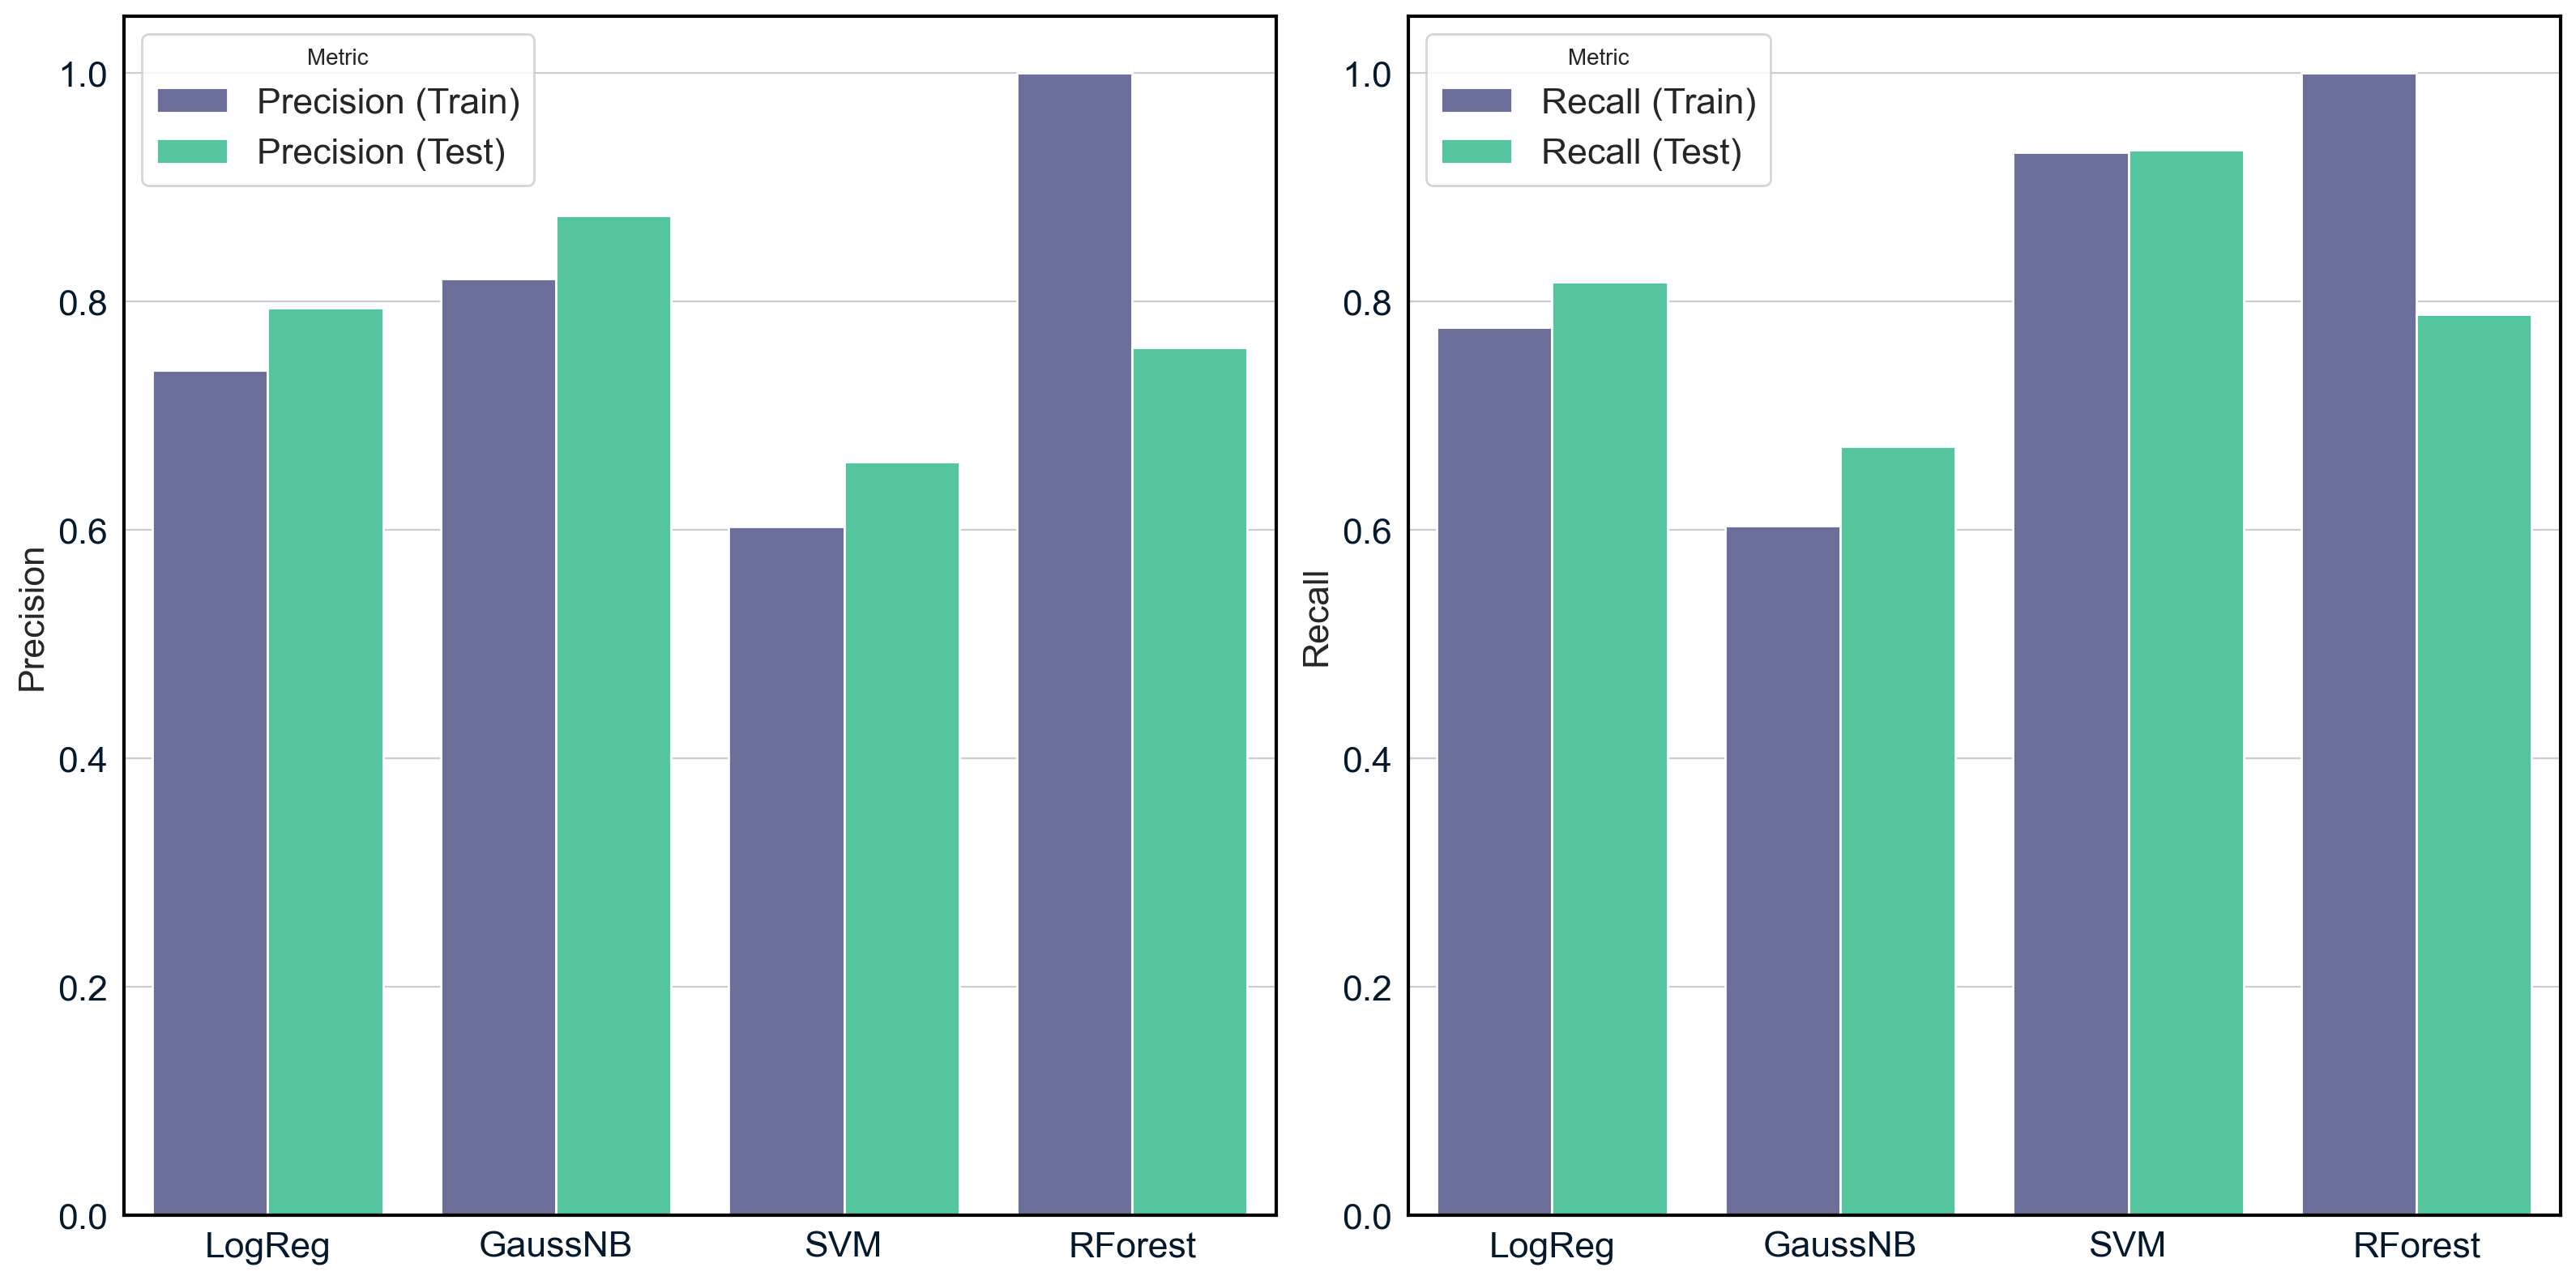

In [112]:
# Prepare DataFrame for plotting
metrics_df_2 = pd.DataFrame({
    'Model': ['LogReg', 'GaussNB', 'SVM', 'RForest'],
    'Precision (Train)': [logreg_evaluation_metrics_2['train'][1], gnb_evaluation_metrics_2['train'][1], svm_evaluation_metrics_2['train'][1], rf_evaluation_metrics_2['train'][1]],
    'Recall (Train)': [logreg_evaluation_metrics_2['train'][2], gnb_evaluation_metrics_2['train'][2], svm_evaluation_metrics_2['train'][2], rf_evaluation_metrics_2['train'][2]],
    'Precision (Test)': [logreg_evaluation_metrics_2['test'][1], gnb_evaluation_metrics_2['test'][1], svm_evaluation_metrics_2['test'][1], rf_evaluation_metrics_2['test'][1]],
    'Recall (Test)': [logreg_evaluation_metrics_2['test'][2], gnb_evaluation_metrics_2['test'][2], svm_evaluation_metrics_2['test'][2], rf_evaluation_metrics_2['test'][2]]
})

# Melt DataFrame to long format for easier plotting
metrics_melted_2 = metrics_df_2.melt(id_vars='Model', value_vars=['Precision (Train)', 'Precision (Test)', 'Recall (Train)', 'Recall (Test)'],
                                  var_name='Metric', value_name='Value')

# Create plots
plt.figure(figsize=(16, 8))

# Subplot 1: Precision for Training vs Testing Set
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=metrics_melted_2[metrics_melted_2['Metric'].str.contains('Precision')], x='Model', y='Value', hue='Metric')
ax1.set_xlabel('', fontsize=16)
ax1.set_ylabel('Precision', fontsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xticklabels(['LogReg', 'GaussNB', 'SVM', 'RForest'])
ax1.legend(title='Metric', fontsize='16')  # Enlargen legend size
for spine in ax1.spines.values():
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

# Subplot 2: Recall for Training vs Testing Set
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=metrics_melted_2[metrics_melted_2['Metric'].str.contains('Recall')], x='Model', y='Value', hue='Metric')
ax2.set_xlabel('', fontsize=16)
ax2.set_ylabel('Recall', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_xticklabels(['LogReg', 'GaussNB', 'SVM', 'RForest'])
ax2.legend(title='Metric', fontsize='16')  # Enlargen legend size
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

**To further improve the performance, we can add polynomial features**

In [113]:
# Import polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Initialize the PolynomialFeatures transformer for second-order polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the original training features to include second-order polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the polynomial features of the training data
X_resampled, y_resampled = ros.fit_resample(X_train_poly, y_train)

In [114]:
# Let us now train the model with resampled X and y, with polynomial features

# Logistic Regression
logreg = LogisticRegression()
logreg_evaluation_metrics_3 = run_model(logreg, X_resampled, y_resampled, X_test_poly, y_test)

# Gaussian Naive Bayes 
gnb = GaussianNB()
gnb_evaluation_metrics_3 = run_model(gnb, X_resampled, y_resampled, X_test_poly, y_test)

# Support Vector Machines
svm = SVC()
svm_evaluation_metrics_3 = run_model(svm, X_resampled, y_resampled, X_test_poly, y_test)

# Random Forest
rf = RandomForestClassifier(random_state = 34)
rf_evaluation_metrics_3 = run_model(rf, X_resampled, y_resampled, X_test_poly, y_test)

# Again, print the evaluation metrics for every ML model for both training and testing sets

# Logistic Regression
print("Logistic Regression Train:")
print_metrics(logreg_evaluation_metrics_3['train'])
print("Logistic Regression Test:")
print_metrics(logreg_evaluation_metrics_3['test'])

# Gaussian Naive-Bayes
print("Gaussian Naive-Bayes Train:")
print_metrics(gnb_evaluation_metrics_3['train'])
print("Gaussian Naive-Bayes Test:")
print_metrics(gnb_evaluation_metrics_3['test'])

# Support Vector Machines
print("Support Vector Machines Train:")
print_metrics(svm_evaluation_metrics_3['train'])
print("Support Vector Machines Test:")
print_metrics(svm_evaluation_metrics_3['test'])

# Random Forest
print("Random Forest Train:")
print_metrics(rf_evaluation_metrics_3['train'])
print("Random Forest Test:")
print_metrics(rf_evaluation_metrics_3['test'])

Logistic Regression Train:
  Accuracy: 0.7587006960556845
  Precision: 0.7528344671201814
  Recall: 0.7703016241299304
  F1-Score: 0.7614678899082569
  Confusion Matrix:
[[322 109]
 [ 99 332]]
Logistic Regression Test:
  Accuracy: 0.7486033519553073
  Precision: 0.780952380952381
  Recall: 0.7884615384615384
  F1-Score: 0.7846889952153111
  Confusion Matrix:
[[52 23]
 [22 82]]
Gaussian Naive-Bayes Train:
  Accuracy: 0.7331786542923434
  Precision: 0.8338870431893688
  Recall: 0.5823665893271461
  F1-Score: 0.6857923497267759
  Confusion Matrix:
[[381  50]
 [180 251]]
Gaussian Naive-Bayes Test:
  Accuracy: 0.7541899441340782
  Precision: 0.9166666666666666
  Recall: 0.6346153846153846
  F1-Score: 0.75
  Confusion Matrix:
[[69  6]
 [38 66]]
Support Vector Machines Train:
  Accuracy: 0.660092807424594
  Precision: 0.6282527881040892
  Recall: 0.7842227378190255
  F1-Score: 0.6976264189886481
  Confusion Matrix:
[[231 200]
 [ 93 338]]
Support Vector Machines Test:
  Accuracy: 0.68715083798

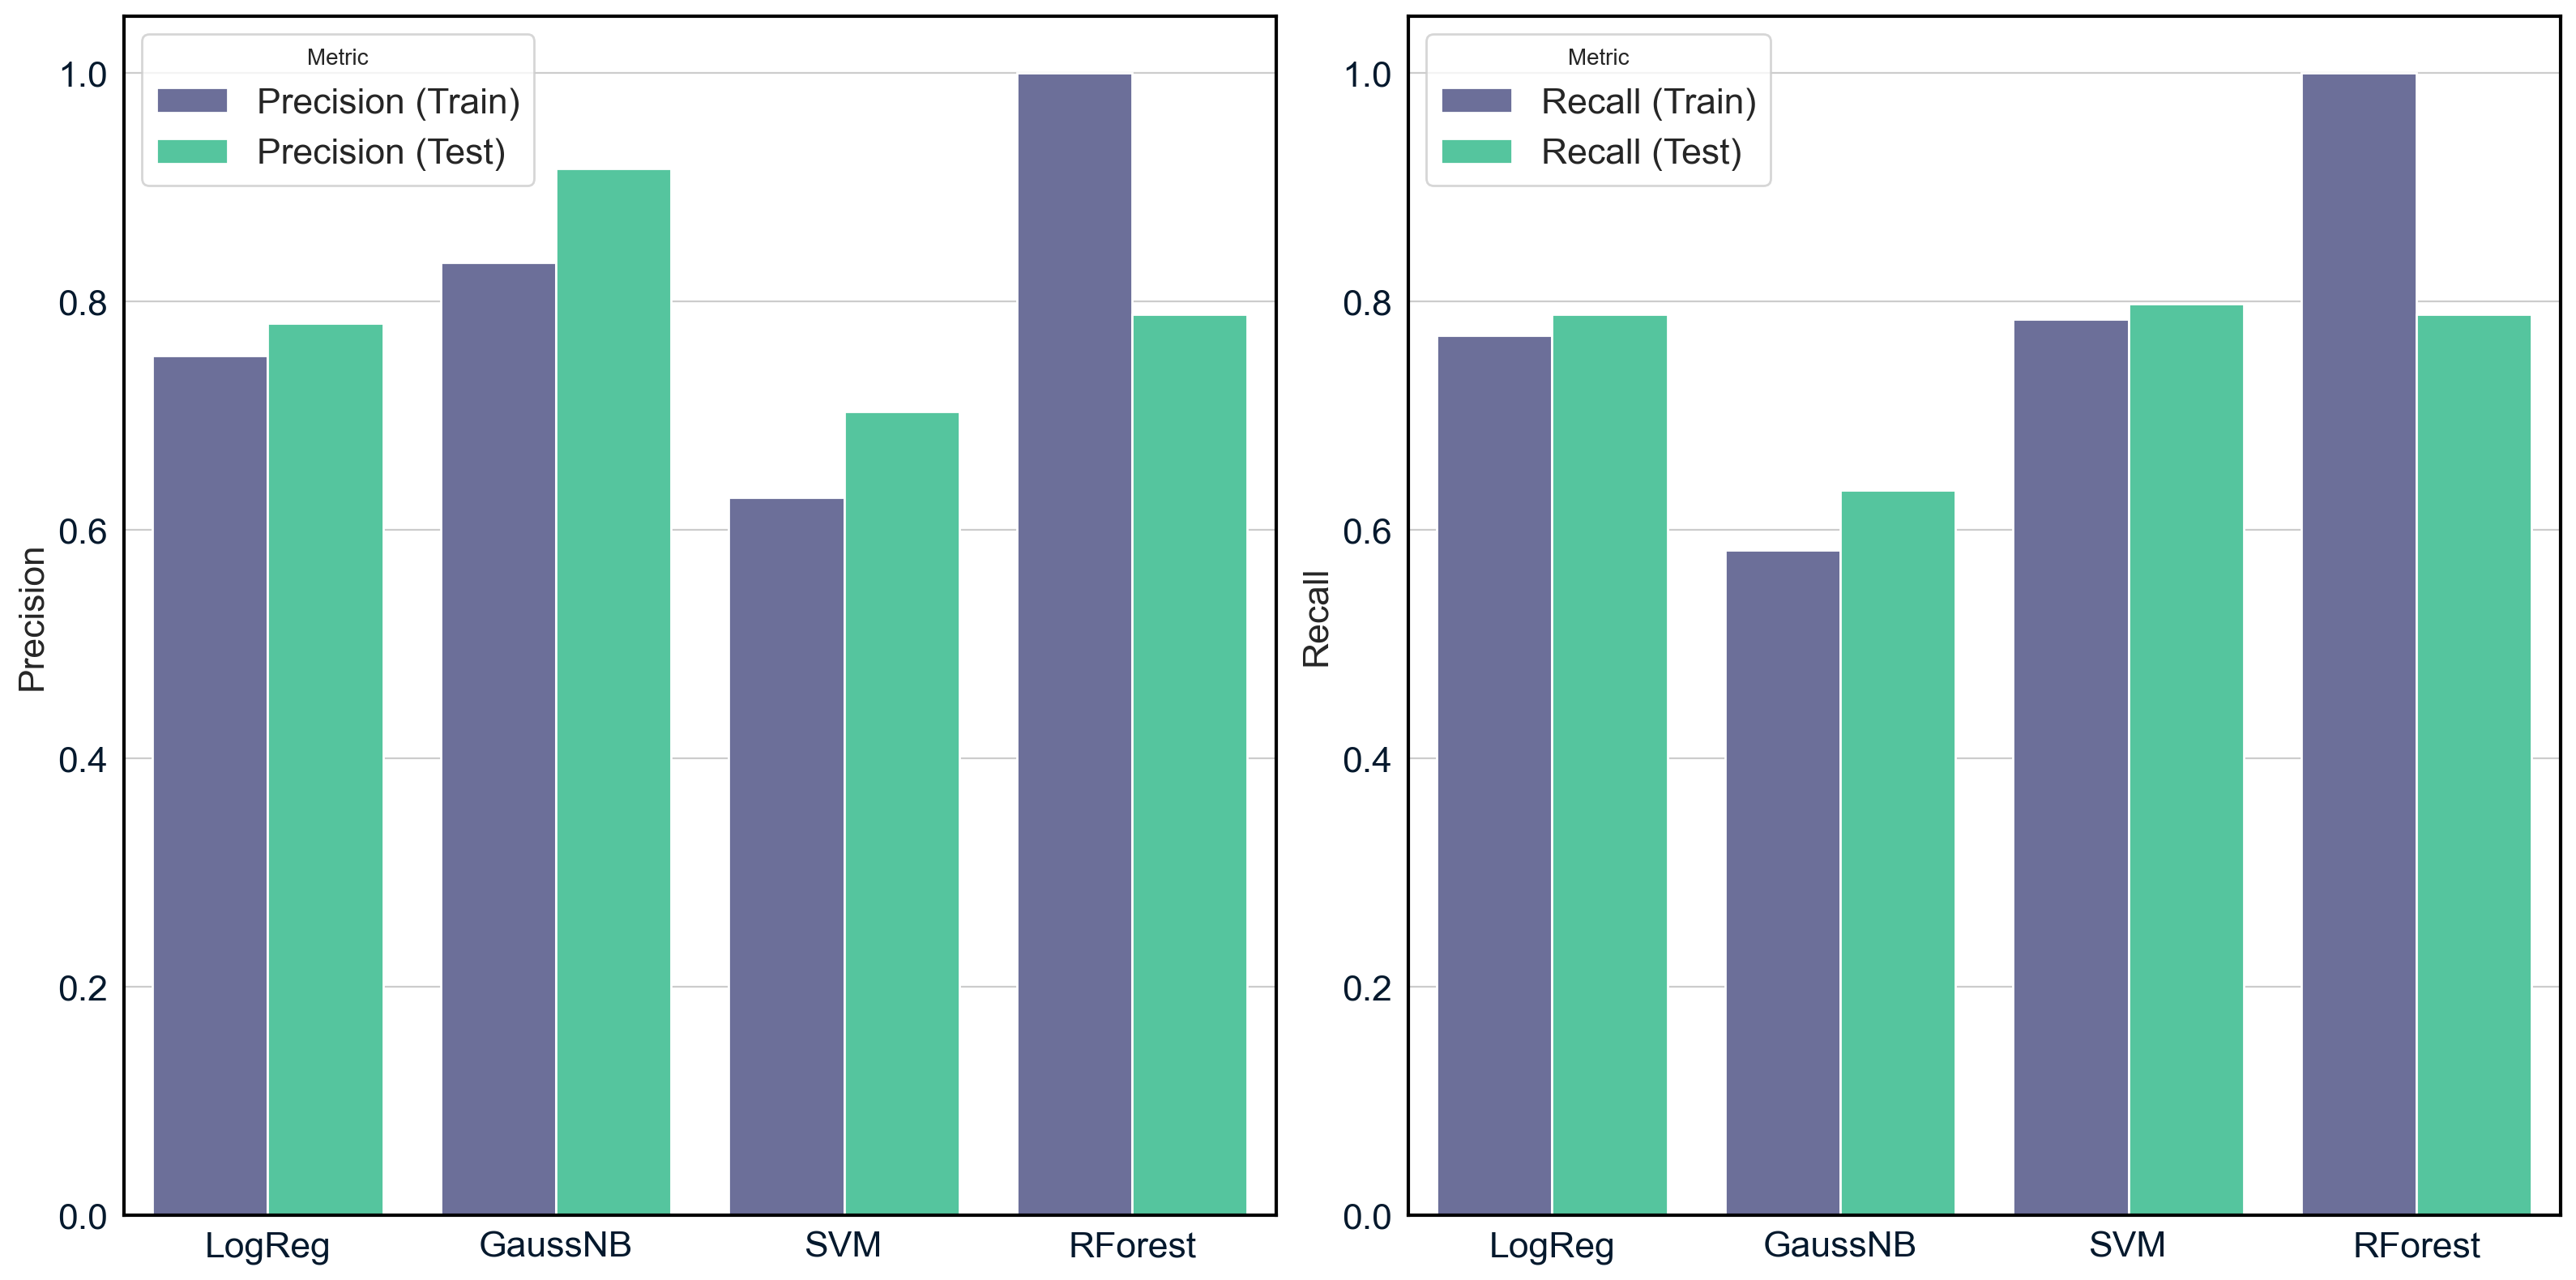

In [115]:
# Prepare DataFrame for plotting
metrics_df_3 = pd.DataFrame({
    'Model': ['LogReg', 'GaussNB', 'SVM', 'RForest'],
    'Precision (Train)': [logreg_evaluation_metrics_3['train'][1], gnb_evaluation_metrics_3['train'][1], svm_evaluation_metrics_3['train'][1], rf_evaluation_metrics_3['train'][1]],
    'Recall (Train)': [logreg_evaluation_metrics_3['train'][2], gnb_evaluation_metrics_3['train'][2], svm_evaluation_metrics_3['train'][2], rf_evaluation_metrics_3['train'][2]],
    'Precision (Test)': [logreg_evaluation_metrics_3['test'][1], gnb_evaluation_metrics_3['test'][1], svm_evaluation_metrics_3['test'][1], rf_evaluation_metrics_3['test'][1]],
    'Recall (Test)': [logreg_evaluation_metrics_3['test'][2], gnb_evaluation_metrics_3['test'][2], svm_evaluation_metrics_3['test'][2], rf_evaluation_metrics_3['test'][2]]
})

# Melt DataFrame to long format for easier plotting
metrics_melted_3 = metrics_df_3.melt(id_vars='Model', value_vars=['Precision (Train)', 'Precision (Test)', 'Recall (Train)', 'Recall (Test)'],
                                  var_name='Metric', value_name='Value')

# Create plots
plt.figure(figsize=(16, 8))

# Subplot 1: Precision for Training vs Testing Set
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=metrics_melted_3[metrics_melted_3['Metric'].str.contains('Precision')], x='Model', y='Value', hue='Metric')
ax1.set_xlabel('', fontsize=16)
ax1.set_ylabel('Precision', fontsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xticklabels(['LogReg', 'GaussNB', 'SVM', 'RForest'])
ax1.legend(title='Metric', fontsize='16')  # Enlargen legend size
for spine in ax1.spines.values():
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

# Subplot 2: Recall for Training vs Testing Set
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=metrics_melted_3[metrics_melted_3['Metric'].str.contains('Recall')], x='Model', y='Value', hue='Metric')
ax2.set_xlabel('', fontsize=16)
ax2.set_ylabel('Recall', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_xticklabels(['LogReg', 'GaussNB', 'SVM', 'RForest'])
ax2.legend(title='Metric', fontsize='16')  # Enlargen legend size
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

## **MACHINE LEARNING MODEL EVALUATION DISCUSSION**

**We performed three experiments for each of the machine learning model (Logistic Regression, Gaussian Naive-Bayes, Support Vector Machines, and Random Forest). The experiments are the following:**
1.  Baseline Model
2.  Model with Random Oversampling (to deal with class imbalance)
3.  Model with Random Oversampling and Square Features (to deal with class imbalance and underfitting)

**Our discussion revolves from both technical (data science) and business perspectives.**

## **Data Science Perspective:**
___________________________________________________________________________________________________________
### **Logistic Regression:**

Baseline: The model shows good balance with decent precision and recall on both training and test sets. The test set's higher recall (0.846) than the training set’s (0.789) indicates slight underfitting, but it’s performing well overall.

With Random Oversampling: 
Precision slightly decreases, but recall improves, especially on the test set. This suggests the model is now better at identifying true positives, which is beneficial given the data imbalance.

With Polynomial Features: Precision and recall remain consistent, indicating that adding polynomial features didn’t significantly change the model's performance. The model may not benefit much from higher-order feature interactions.
___________________________________________________________________________________________________________
### **Gaussian Naive-Bayes:**

Baseline: 
The model has high precision but lower recall, particularly on the training set, indicating it’s conservative in predicting positives. The drop in recall suggests it might be underfitting and struggling with the data distribution.

With Random Oversampling: 
Precision remains high, and recall slightly improves, but the model still shows underfitting characteristics, especially given the relatively lower recall.

With Polynomial Features: 
Precision improves further, but recall drops, especially on the test set, indicating the model might be overfitting and not generalizing well.
___________________________________________________________________________________________________________
### **Support Vector Machines (SVM):**

Baseline: 
The model has high recall but low precision, especially on the test set, suggesting it’s predicting positives too often (possibly overfitting).

With Random Oversampling: 
Recall remains high, and precision improves slightly, but it’s still not balanced, indicating the model continues to overfit.

With Polynomial Features: 
Precision improves, but recall drops slightly, indicating the model is starting to balance between precision and recall but still struggles with overfitting.
___________________________________________________________________________________________________________
### **Random Forest:**

Baseline: 
Perfect precision and recall on the training set indicate severe overfitting. The test set shows reduced performance, confirming the model’s inability to generalize.

With Random Oversampling: 
Slight improvement in test precision and recall, but overfitting remains a concern, as the training set still has perfect scores.

With Polynomial Features: 
The model continues to overfit, but test performance is more stable and balanced.

## **Business Perspective:**
___________________________________________________________________________________________________________
### **Logistic Regression:**

Baseline: 
The model’s ability to correctly predict high traffic recipes is reliable (precision and recall are above 0.79 on the test set). It’s a safe choice for the business to start predicting popular recipes, potentially driving more traffic.

With Random Oversampling: 
The improved recall means the model catches more popular recipes, reducing the risk of missing out on potential high-traffic content. This aligns well with the business objective of correctly predicting high-traffic recipes 80% of the time.

With Polynomial Features: 
The model remains reliable but doesn’t offer significant improvements. The business might stick with simpler features unless there's a need for slight gains in accuracy.
___________________________________________________________________________________________________________
### **Gaussian Naive-Bayes:**

Baseline: 
High precision but lower recall means the model is cautious and may miss some popular recipes, potentially leading to lost opportunities in traffic increase.

With Random Oversampling: 
Precision remains high, but the model still might miss some high-traffic recipes, limiting its usefulness for maximizing site traffic.

With Polynomial Features: 
Higher precision might reduce false positives, but lower recall could lead to missed opportunities, making it less desirable for the business.
___________________________________________________________________________________________________________
### **Support Vector Machines (SVM):**

Baseline: 
High recall but low precision suggests the model might overestimate popular recipes, leading to unnecessary content promotion. This could dilute the impact of correctly chosen recipes.

With Random Oversampling: 
The model becomes slightly more balanced, reducing the risk of promoting non-popular recipes, but still isn’t ideal for the business’s need to reliably predict high-traffic content.

With Polynomial Features: 
The improved precision makes it more viable for predicting high-traffic recipes, but the trade-off in recall means it’s not the best choice for maximizing traffic.
___________________________________________________________________________________________________________
### **Random Forest:**

Baseline:
Overfitting is a major issue; the model is too confident on training data but doesn’t generalize well. This could lead to inconsistent traffic predictions and missed opportunities.

With Random Oversampling: 
The slight improvement in test performance makes it a bit more reliable, but the overfitting problem persists, making it a risky choice for the business.

With Polynomial Features: 
The model becomes more stable, but overfitting is still a concern. The business might consider this model if stability improves in future iterations.

# Step 5: Business Metrics

To effectively communicate the result of our model, we will establish a Key Performance Indicator (KPI) by dividing False Positives (low traffic recipes mistakenly classified as high traffic) by True Positives (high traffic recipes correctly classified as high traffic). 

We can refer to this KPI as the "High Traffic Error Rate (HTER)," which needs to be maintained at a level equal to or below 0.20.

_**HTER <= 0.20**_

This KPI can serve as a valuable metric for the business, which provide insights into the accuracy of high traffic predictions made by our ML model.

In [116]:
# Create a function for KPI calculation
def kpi_HTER(model_metrics):
    kpi_train = model_metrics['train'][4]
    kpi_test = model_metrics['test'][4]
    return {
        'Train': kpi_train[0][1] / kpi_train[1][1],  # FP / TP
        'Test': kpi_test[0][1] / kpi_test[1][1],    # FP / TP
            }

In [117]:
# Calculate KPI for each model and each experiment
model_names = ["Logistic Regression", "Gaussian Naive-Bayes", "Support Vector Machines", "Random Forest"]

# Original Model
kpi_values = {model_name: kpi_HTER(metrics) for model_name, metrics in zip(model_names, [
    logreg_evaluation_metrics,
    gnb_evaluation_metrics,
    svm_evaluation_metrics,
    rf_evaluation_metrics
])}

# With Random Oversampling
kpi_values_2 = {model_name: kpi_HTER(metrics) for model_name, metrics in zip(model_names, [
    logreg_evaluation_metrics_2,
    gnb_evaluation_metrics_2,
    svm_evaluation_metrics_2,
    rf_evaluation_metrics_2
])}

# With Random Oversampling and Polynomial Features (Second Order)
kpi_values_3 = {model_name: kpi_HTER(metrics) for model_name, metrics in zip(model_names, [
    logreg_evaluation_metrics_3,
    gnb_evaluation_metrics_3,
    svm_evaluation_metrics_3,
    rf_evaluation_metrics_3
])}

# Create DataFrames for each condition
data = {
    'Model': model_names,
    'Train': [kpi_values[model]['Train'] for model in model_names],
    'Test': [kpi_values[model]['Test'] for model in model_names],
    'Train OV': [kpi_values_2[model]['Train'] for model in model_names],
    'Test OV': [kpi_values_2[model]['Test'] for model in model_names],
    'Train OV+PF': [kpi_values_3[model]['Train'] for model in model_names],
    'Test OV+PF': [kpi_values_3[model]['Test'] for model in model_names]
}

kpi_df = pd.DataFrame(data)
kpi_df.set_index('Model', inplace=True)
pd.set_option('display.max_columns', None)

print(kpi_df)

                            Train      Test  Train OV   Test OV  Train OV+PF  \
Model                                                                          
Logistic Regression      0.244118  0.261364  0.352239  0.258824     0.328313   
Gaussian Naive-Bayes     0.145038  0.159420  0.219231  0.142857     0.199203   
Support Vector Machines  0.503563  0.586538  0.658354  0.515464     0.591716   
Random Forest            0.000000  0.357143  0.000000  0.317073     0.000000   

                         Test OV+PF  
Model                                
Logistic Regression        0.280488  
Gaussian Naive-Bayes       0.090909  
Support Vector Machines    0.421687  
Random Forest              0.268293  


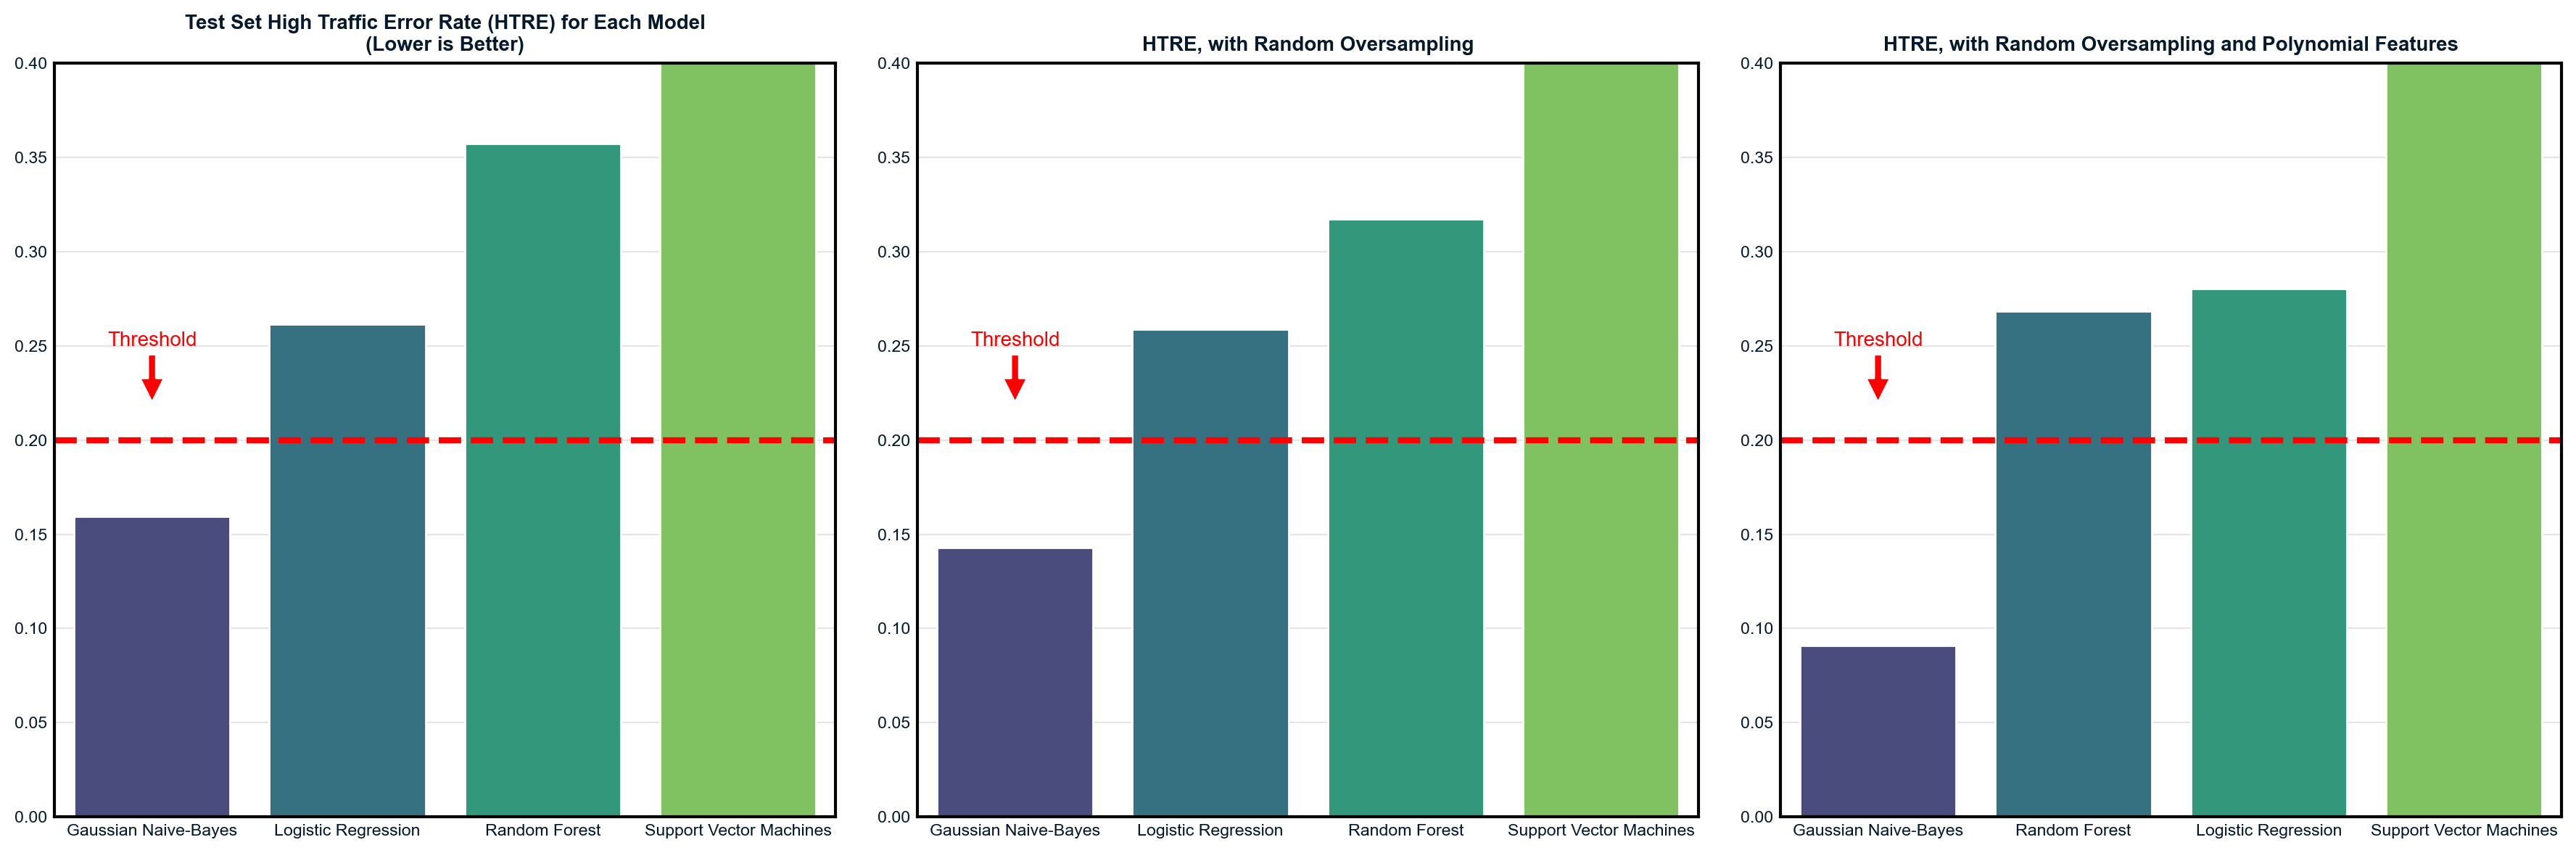

In [118]:
# We can visualize the test set performance

# Create a function for KPI calculation
def kpi_HTER(model_metrics, model_name):
    kpi_test = model_metrics['test'][4]
    return kpi_test[0][1] / kpi_test[1][1]  # FP / TP

# Calculate KPI for each model
model_names = ["Logistic Regression", "Gaussian Naive-Bayes", "Support Vector Machines", "Random Forest"]

## Original Model
kpi_values = [
    kpi_HTER(logreg_evaluation_metrics, "Logistic Regression"),
    kpi_HTER(gnb_evaluation_metrics, "Gaussian Naive-Bayes"),
    kpi_HTER(svm_evaluation_metrics, "Support Vector Machines"),
    kpi_HTER(rf_evaluation_metrics, "Random Forest")
]

## With Random Oversampling
kpi_values_2 = [
    kpi_HTER(logreg_evaluation_metrics_2, "Logistic Regression"),
    kpi_HTER(gnb_evaluation_metrics_2, "Gaussian Naive-Bayes"),
    kpi_HTER(svm_evaluation_metrics_2, "Support Vector Machines"),
    kpi_HTER(rf_evaluation_metrics_2, "Random Forest")
]

## With Random Oversampling and Polynomial Features (Second Order)
kpi_values_3 = [
    kpi_HTER(logreg_evaluation_metrics_3, "Logistic Regression"),
    kpi_HTER(gnb_evaluation_metrics_3, "Gaussian Naive-Bayes"),
    kpi_HTER(svm_evaluation_metrics_3, "Support Vector Machines"),
    kpi_HTER(rf_evaluation_metrics_3, "Random Forest")
]

# Create a DataFrame for easy plotting

## Original Model
kpi_df = pd.DataFrame({
    'Model': model_names,
    'High Traffic Error Rate': kpi_values
})

## With Random Oversampling
kpi_df_2 = pd.DataFrame({
    'Model': model_names,
    'High Traffic Error Rate': kpi_values_2
})

## With Random Oversampling and Polynomial Features (Second Order)
kpi_df_3 = pd.DataFrame({
    'Model': model_names,
    'High Traffic Error Rate': kpi_values_3
})

# Sort the DataFrame by High Traffic Error Rate in ascending order
kpi_df = kpi_df.sort_values(by='High Traffic Error Rate', ascending=True)
kpi_df_2 = kpi_df_2.sort_values(by='High Traffic Error Rate', ascending=True)
kpi_df_3 = kpi_df_3.sort_values(by='High Traffic Error Rate', ascending=True)

# Plotting with 3 columns and 1 row
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 3 columns and 1 row, adjusted figure size

# Draw the barplots on each axis
sns.barplot(x='Model', y='High Traffic Error Rate', data=kpi_df, palette='viridis', ax=ax[0])
sns.barplot(x='Model', y='High Traffic Error Rate', data=kpi_df_2, palette='viridis', ax=ax[1])
sns.barplot(x='Model', y='High Traffic Error Rate', data=kpi_df_3, palette='viridis', ax=ax[2])

# Add dashed red line and annotation
threshold = 0.20
for i in range(3):
    ax[i].axhline(y=threshold, color='red', linestyle='--', linewidth=3)
    ax[i].annotate('Threshold', xy=(0, threshold + 0.02), xytext=(0, threshold + 0.05),
                   arrowprops=dict(facecolor='red'),
                   fontsize=10, color='red', ha='center')

# Customize the plot
for i in range(0, 3):
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_ylim(0, 0.40)
    ax[i].tick_params(axis='x', labelsize='small', width=2, length=5, direction='in', grid_alpha=0.5)
    ax[i].tick_params(axis='y', labelsize='small', width=2, length=5, direction='in', grid_alpha=0.5)

# Title 
ax[0].set_title('Test Set High Traffic Error Rate (HTRE) for Each Model\n(Lower is Better)', fontsize='medium', fontweight='bold')
ax[1].set_title('HTRE, with Random Oversampling', fontsize='medium', fontweight='bold')
ax[2].set_title('HTRE, with Random Oversampling and Polynomial Features', fontsize='medium', fontweight='bold')

# Set spines to 1.5 and black
for axis in ax:  # Iterate through each axis in the array
    for spine in axis.spines.values():
        spine.set_linewidth(1.5)
        spine.set_edgecolor('black')

plt.tight_layout()
plt.show()


# **Data Science Perspective:**

The High Traffic Error Rate (HTER) plot shows how the mahcine learning models perform in terms of correctly classifying high traffic recipes while minimizing false positives. The threshold is set at 0.20, which is the maximum acceptable HTER, as per business objectives.
______________________________________________________________________________________________________________
## **Baseline Models:**

_Gaussian Naive-Bayes:_ 

This model consistently performs well across all scenarios, with HTER values below the 0.20 threshold, indicating it effectively balances precision and recall. This model appears to be less prone to overfitting, maintaining good performance even when features and data sampling are adjusted.

_Logistic Regression:_ 

In the baseline scenario, Logistic Regression slightly exceeds the threshold. However, the oversampling and polynomial features do not significantly improve the HTER, suggesting that the model might struggle with the feature interactions or the data distribution.

_Random Forest and Support Vector Machines (SVM):_ 

Both models have high HTER values in the baseline scenario, indicating a tendency to misclassify low-traffic recipes as high traffic. This suggests potential overfitting, especially with the Random Forest model, which is known for its ability to capture complex interactions but also prone to overfitting in imbalanced datasets.
______________________________________________________________________________________________________________
## **With Random Oversampling:**

- The Gaussian Naive-Bayes model maintains a low HTER, reaffirming its robustness against the imbalanced dataset. - The Logistic Regression model shows no significant improvement, still hovering near or slightly above the threshold. 
- The Random Forest and SVM models improve slightly but remain above the threshold, indicating that oversampling alone is insufficient to address their propensity to overfit.
______________________________________________________________________________________________________________
## **With Random Oversampling and Polynomial Features:**

- The Gaussian Naive-Bayes model continues to show excellent performance, with the lowest HTER across all models and scenarios. 
- Logistic Regression improves slightly but still struggles to consistently stay below the threshold. 
- Random Forest and SVM models continue to exceed the threshold, suggesting that adding polynomial features does not effectively address their overfitting tendencies.

# **Business Perspective:**

From a business perspective, the primary objective is to maintain the HTER at or below 0.20 to ensure that the model reliably predicts high-traffic recipes while minimizing false positives (i.e., misclassifying low-traffic recipes as high-traffic ones).
_______________________________________________________________________________________________________________

## **Gaussian Naive-Bayes:**

### **Strong Recommendation: **

This model consistently performs well across different scenarios, maintaining an HTER well below the threshold. For the business, this means that the model can reliably predict high-traffic recipes without mistakenly promoting low-traffic ones. This reliability could translate into better resource allocation, ensuring that promotional efforts are focused on truly popular recipes.
_______________________________________________________________________________________________________________
## **Logistic Regression:**

### **Moderate Recommendation: **

This model is borderline in terms of meeting the HTER threshold. While it has the potential to be a good predictor, it may require further fine-tuning or additional feature engineering to consistently meet the business’s needs. If used, the business should be cautious and possibly combine it with other methods to ensure performance remains within acceptable limits.
_______________________________________________________________________________________________________________
## **Random Forest and SVM:**

### **Not Recommended: **

These models consistently exceed the HTER threshold, indicating a higher likelihood of misclassifying low-traffic recipes as high-traffic ones. For the business, this means potential misallocation of resources, promoting recipes that may not drive the expected traffic. This could lead to inefficiencies in marketing efforts and dilute the impact of the correctly identified high-traffic recipes.

# **FINAL SUMMARY**

## Step 1: Data Validation
We validated our data by checking each column for the correct data type and null values.

## Step 2: Exploratory Data Analysis
We explored the data by visualizing the descriptive statistics such as the mean, median, and standard deviation using scatter plots, bar graphs, and boxplots. We found that:
- there was no significant correlation between the nutrient columns
- the nutrient columns are skewed to the right (lower values are more frequent)
- outliers are present
- showcasing recipes in certain categories can lead to increased traffic 

## Step 3: Model Development

This particular problem is best suited to be solved using a binary classification algorithm.
Our aim is to predict which recipes are "high traffic" status.

We transformed our data by removing outliers, capping outliers, winsorization, log transform, sqrt transform, Box-Cox transform, and Yeo-Johnson Transform. The Box-Cox transform performed the best, as the features were close to having a normal distribution. Hence, the data with the box-cox transformation was used in the machine learning models. The data was split into training and testing sets (80 / 20)

The following machine learning models were used:
1. Logistic Regression
2. Gaussian Naive-Bayes
3. Support Vector Machines
4. Random Forest 

## Step 4: Model Evaluation
**We performed three experiments for each of the machine learning model (Logistic Regression, Gaussian Naive-Bayes, Support Vector Machines, and Random Forest). The experiments are the following:**
1.  Baseline Model
2.  Model with Random Oversampling (to deal with class imbalance)
3.  Model with Random Oversampling and Square Features (to deal with class imbalance and underfitting)

The metrics we used are accuracy, precision, recall, F1-score, and confusion matrix. We centered the discussion around precision and recall because it is more aligned with the business objective.

## Step 5: Business Metrics & Final Recommendation

To effectively communicate the result of our model, we established a Key Performance Indicator (KPI) by dividing False Positives (low traffic recipes mistakenly classified as high traffic) by True Positives (high traffic recipes correctly classified as high traffic). 

We can refer to this KPI as the "High Traffic Error Rate (HTER)," which needs to be maintained at a level equal to or below 0.20.

_**HTER <= 0.20**_

This KPI can serve as a valuable metric for the business, which provide insights into the accuracy of high traffic predictions made by our ML model.

Given the business objective of maintaining an HTER at or below 0.20, Gaussian Naive-Bayes is the most reliable model across all scenarios. It provides consistent performance with a low error rate, making it the best choice for the business to predict and promote high-traffic recipes. Logistic Regression could be considered with some caution, while Random Forest and SVM are less suitable due to their higher error rates.

From a data science and modeling perspective, we can still fine tune the model by tuning its hyperparameters and employing feature selections and feature importances. We can also consider other models such as boosted trees, artificial neural networks, and even ensembling.

Lastly, more data should be collected so that more complex models could learn better.

# **_-END OF WRITTEN REPORT-_**

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation